<a href="https://colab.research.google.com/github/ImamSyabana/TugasAkhir_Nikkei225/blob/main/8020_window21_multivariate_Nikkei225_daily_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Roadmap penelitian

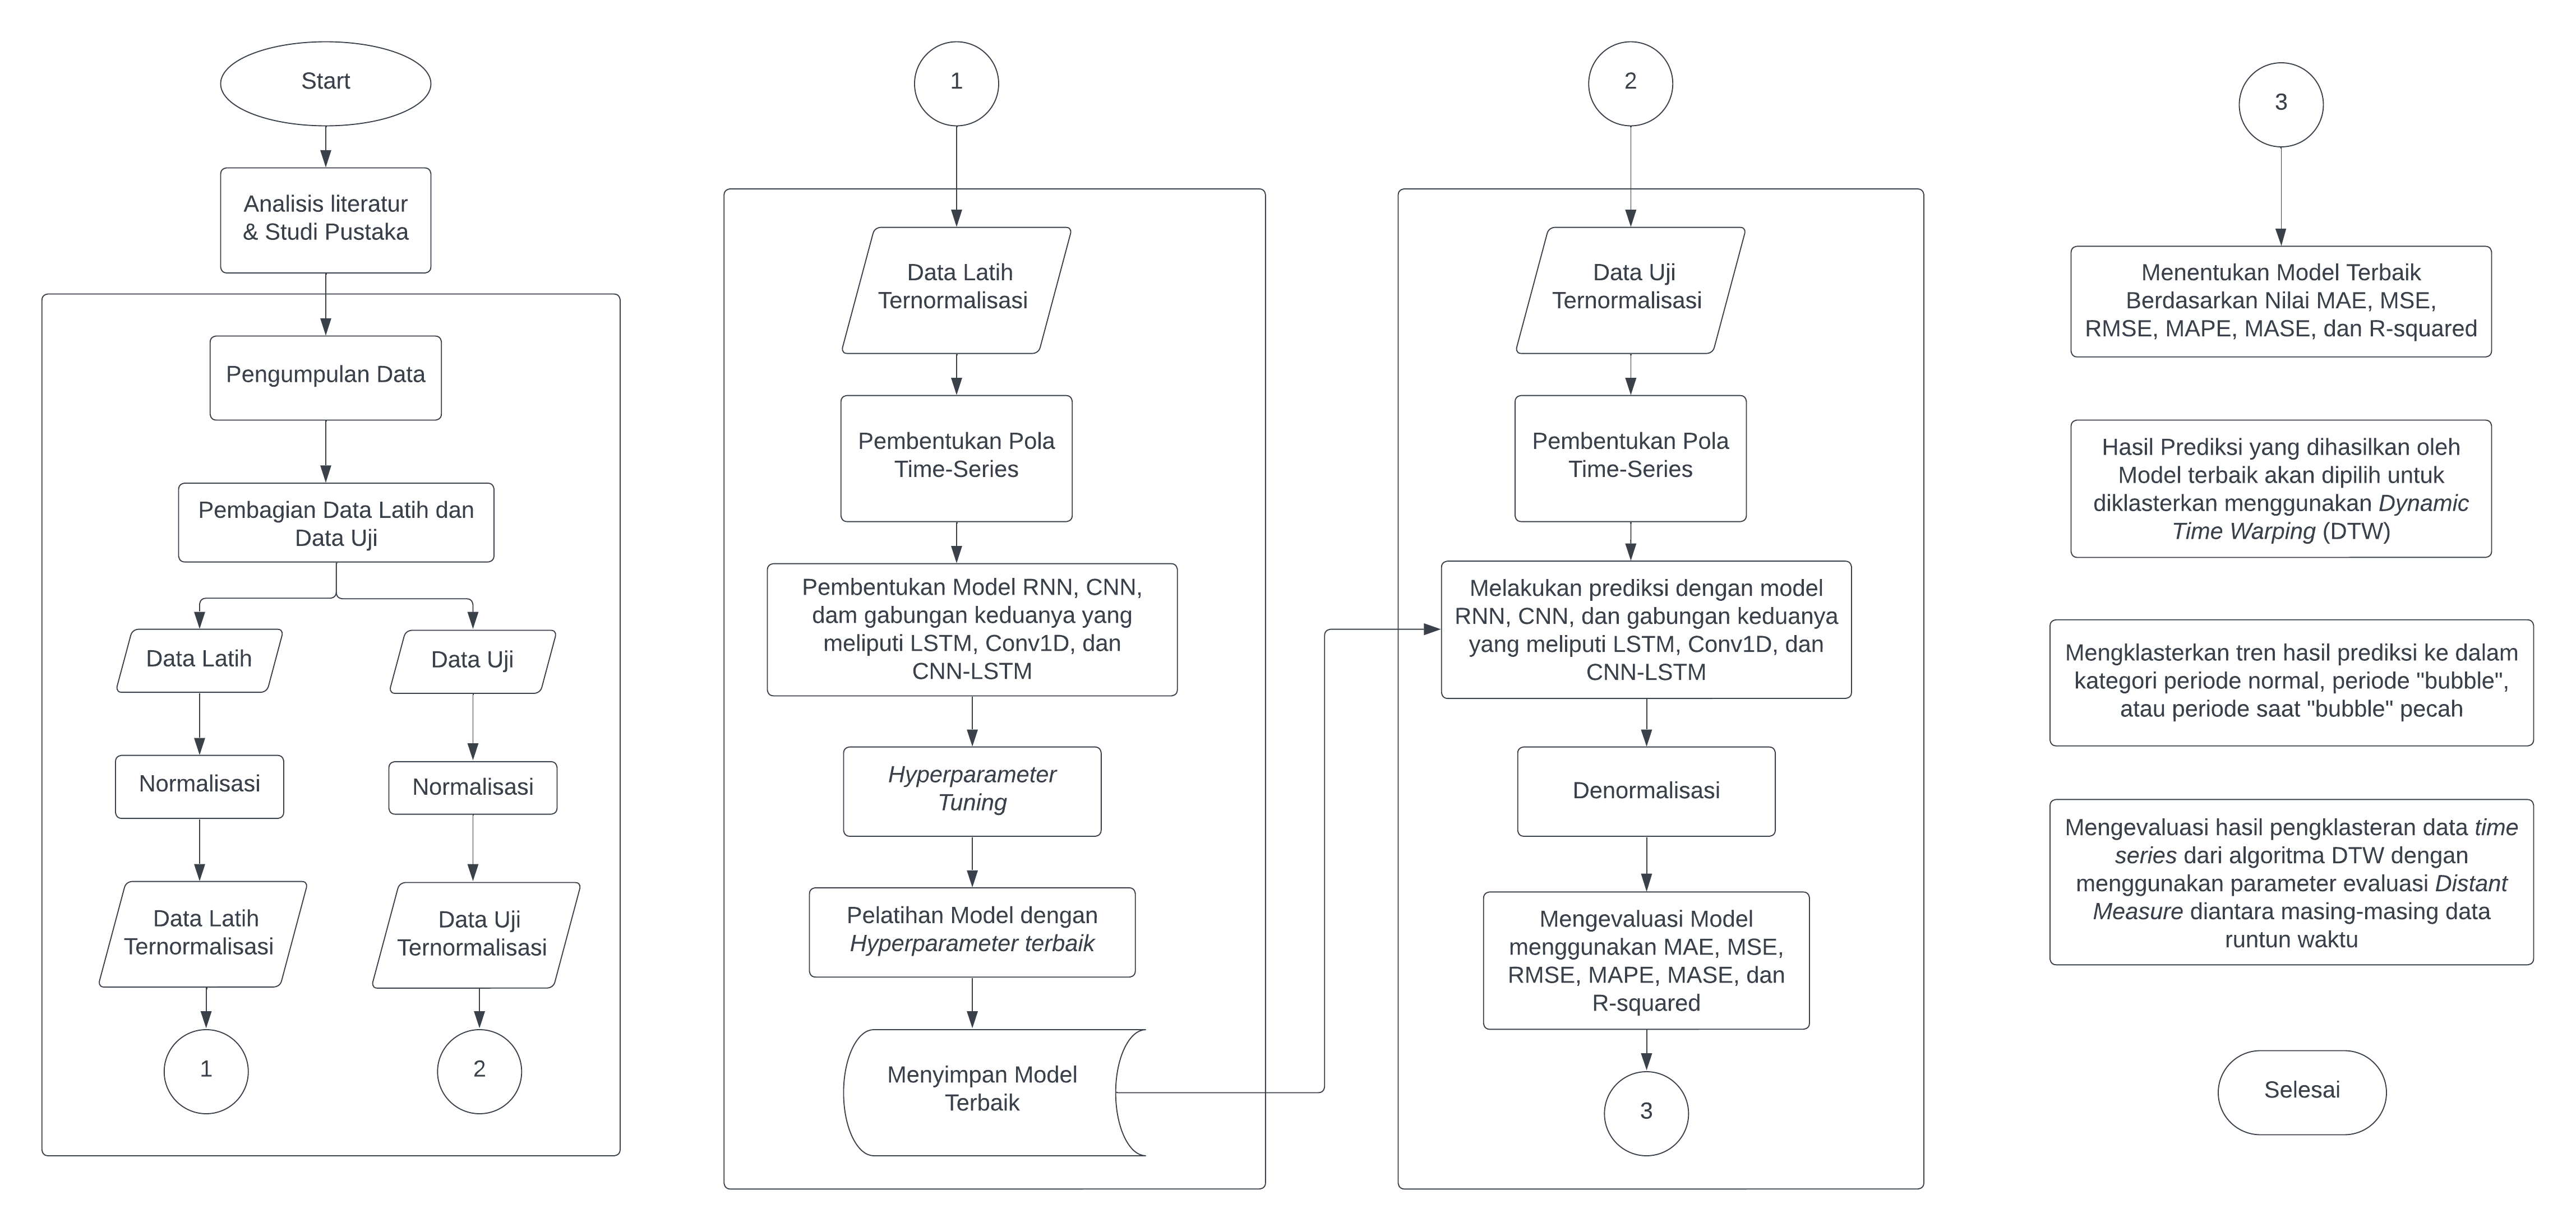

# Menghubungkan ke Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Get Data

Sumber data: https://indexes.nikkei.co.jp/en/nkave/archives/data?list=daily


mendownload data harga saham Nikkei225 dengan interval harian dari tahun 1968 sampai 2023

In [ ]:
!wget https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/nikkei225/Nikkei225_daily.csv


--2024-03-21 08:08:27--  https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/nikkei225/Nikkei225_daily.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 886390 (866K) [text/plain]
Saving to: ‘Nikkei225_daily.csv’

Nikkei225_daily.csv 100%[===================>] 865.62K  5.11MB/s    in 0.2s    

2024-03-21 08:08:28 (5.11 MB/s) - ‘Nikkei225_daily.csv’ saved [886390/886390]



## Import data time series dengan pandas

In [ ]:
# import dengan pandas
import pandas as pd

# konversi format nilai
def convert_value(value):
    # jika value bukan '-' merubah format desimal (contoh : 30,056 -> 30056)
    if value != '-':
        return float(value.replace(',', ''))
    else:
        return None

# membaca data saham Nikkei225
nikkei225_df = pd.read_csv("/content/Nikkei225_daily.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"],
                           converters = {'Open': convert_value,
                                         'High': convert_value,
                                         'Low': convert_value,
                                         'Close': convert_value})
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

nikkei225_df.tail()

Open      High       Low     Close
Date                                              
2024-02-22  38508.07  39156.97  38508.07  39098.68
2024-02-26  39320.64  39388.08  39181.03  39233.71
2024-02-27  39260.78  39426.29  39113.03  39239.52
2024-02-28  39189.22  39283.95  39075.47  39208.03
2024-02-29  38935.53  39250.12  38876.81  39166.19

In [ ]:
nikkei225_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20078 entries, 1950-01-04 to 2024-02-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    9685 non-null   float64
 1   High    9685 non-null   float64
 2   Low     9685 non-null   float64
 3   Close   20078 non-null  float64
dtypes: float64(4)
memory usage: 784.3 KB


data saham hanya digunakan saat harga close

In [ ]:
nikkei225_close_df = pd.DataFrame(nikkei225_df["Close"]).rename(columns={"Close": "Closing Price (Yen)"})
nikkei225_close_df.tail()


Closing Price (Yen)
Date                           
2024-02-22             39098.68
2024-02-26             39233.71
2024-02-27             39239.52
2024-02-28             39208.03
2024-02-29             39166.19

Informasi jumlah data

In [ ]:
len(nikkei225_df)

20078

menampilkan missing data

In [ ]:
# List the rows where the 'Close' column is nullC
rows_with_null_close = nikkei225_close_df[nikkei225_close_df['Closing Price (Yen)'].isnull()]
print(rows_with_null_close)

Empty DataFrame
Columns: [Closing Price (Yen)]
Index: []


In [ ]:

nikkei225_close_df.isnull().sum()

Closing Price (Yen)    0
dtype: int64

# Bagian membuat multivariate time series dataset.

selain menggunakan data nikkei225, perdiksi harga saham akan dibantu dengan data discount rate

multivariate time series akan menambahkan fitur lebih banyak dari univariate time series yang hanya satu fitur

import file csv





In [ ]:
!wget https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/discountRate/discountRate.csv

--2024-03-21 08:08:32--  https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/discountRate/discountRate.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11737 (11K) [text/plain]
Saving to: ‘discountRate.csv’

discountRate.csv    100%[===================>]  11.46K  --.-KB/s    in 0.001s  

2024-03-21 08:08:33 (15.5 MB/s) - ‘discountRate.csv’ saved [11737/11737]



# Import data time seres tambahan: discount rate

import data discount rate

In [ ]:
# import dengan pandas
import pandas as pd
# membaca data discount rate
discRate_df = pd.read_csv("/content/discountRate.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

discRate_df[-3:]

discountRate
Date                    
2023-12-01           0.3
2024-01-01           0.3
2024-02-01           0.3

In [ ]:
len(discRate_df)

890

menampilkan missing data

In [ ]:
print(discRate_df.isnull().sum())

discountRate    0
dtype: int64


import data discount rate dengan modul csv.reader

In [ ]:
# import dan format historikal data dengan python

import csv
from datetime import datetime

timesteps_discountRate = []
discountRate_value = []

with open("/content/discountRate.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #untuk tidak membaca baris pertama berisi judul kolom
  for line in csv_reader:
    if line[1] == "null":
      continue
    timesteps_discountRate.append(datetime.strptime(line[0], "%Y/%m")) #membaca tanggal sbg DATE
    discountRate_value.append(float(line[1])) #membaca nilai discount rate


In [ ]:
timesteps_discountRate[:3], discountRate_value[:3]

([datetime.datetime(1950, 1, 1, 0, 0),
  datetime.datetime(1950, 2, 1, 0, 0),
  datetime.datetime(1950, 3, 1, 0, 0)],
 [5.11, 5.11, 5.11])

In [ ]:
len(discountRate_value)

890

In [ ]:
type(timesteps_discountRate), type(discountRate_value)

(list, list)

In [ ]:
len(discountRate_value)

890

# Mengumpulkan data menjadi satu dataframe

In [ ]:
# membuat dataframe untuk mengumpulkan semua data multivariate

# copy dataframe nikkei yang masih hanya berisi harga saham
nikkei225_close_multivariate_df = nikkei225_close_df.copy()

# menambahkan kolom money stock dan dsicount rate

nikkei225_close_multivariate_df["discount_rate"] = None
nikkei225_close_multivariate_df

Closing Price (Yen) discount_rate
Date                                         
1950-01-04               108.56          None
1950-01-05               105.54          None
1950-01-06               102.64          None
1950-01-07               102.95          None
1950-01-09               102.78          None
...                         ...           ...
2024-02-22             39098.68          None
2024-02-26             39233.71          None
2024-02-27             39239.52          None
2024-02-28             39208.03          None
2024-02-29             39166.19          None

[20078 rows x 2 columns]

menggabungkan data discount rate dan money supply ke dataframe Nikkei225 closing price

In [ ]:
for x in range(len(timesteps_discountRate)):
  for y in range(len(nikkei225_close_multivariate_df.index)):
    IntervalBulan_timesteps_atrYEAR = timesteps_discountRate[x].year
    IntervalBulan_timesteps_atrMONTH = timesteps_discountRate[x].month
    IntervalBulan_timesteps_atrDAY = timesteps_discountRate[x].day

    IntervalHarian_timesteps_atrYEAR = nikkei225_close_multivariate_df.index[y].year
    IntervalHarian_timesteps_atrMONTH = nikkei225_close_multivariate_df.index[y].month
    IntervalHarian_timesteps_atrDAY = nikkei225_close_multivariate_df.index[y].day

    if IntervalBulan_timesteps_atrYEAR == IntervalHarian_timesteps_atrYEAR and IntervalBulan_timesteps_atrMONTH == IntervalHarian_timesteps_atrMONTH:
      string_tanggal = "{tahun}-{bulan}-{tanggal}".format(tahun = IntervalHarian_timesteps_atrYEAR, bulan = IntervalHarian_timesteps_atrMONTH, tanggal = IntervalHarian_timesteps_atrDAY)
      date_to_index = pd.to_datetime(string_tanggal)
      nikkei225_close_multivariate_df.loc[date_to_index, "discount_rate"] = discountRate_value[x]

In [ ]:
discRate_df[80:90]

discountRate
Date                    
1956-09-01          7.30
1956-10-01          7.30
1956-11-01          7.30
1956-12-01          7.30
1957-01-01          7.30
1957-02-01          7.30
1957-03-01          7.67
1957-04-01          7.67
1957-05-01          8.40
1957-06-01          8.40

In [ ]:
nikkei225_close_multivariate_df[11520:11600]

Closing Price (Yen) discount_rate
Date                                         
1989-04-26             33434.93           2.5
1989-04-27             33500.83           2.5
1989-04-28             33713.35           2.5
1989-05-01             33793.17          3.25
1989-05-02             33954.99          3.25
...                         ...           ...
1989-08-14             34671.62          3.25
1989-08-15             34810.69          3.25
1989-08-16             35084.15          3.25
1989-08-17             35090.11          3.25
1989-08-18             35063.14          3.25

[80 rows x 2 columns]

In [ ]:
type(nikkei225_close_multivariate_df.index.tolist())

list

# Visualisasi data : Membuat fungsi untuk visualisasi (plotting)


In [ ]:
# membuat fungsi untuk menggambar data time series

import matplotlib.pyplot as plt

def plot_time_series(timesteps, values, format= ".", start = 0, end =None, label = None, color = None):
  """
  Memvisualisasikan timesteps (serangkaian keterangan waktu dengan interval tertentu) terhadap nilainya pada timesteps yang bersesuaian
  Parameters
  -------------
  timesteps : kumpulan timestep
  values : kumpulan nilai (saham dan discount Rate)
  format : style grafik, default "."
  start : timesteps rentang awal yang divisualisasi
  end : timesteps rentang akhir yang divisualisasi
  label : untuk memberi keterangan grafik
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label, color = color)
  plt.xlabel("Tanggal")
  plt.ylabel("Saham Nikkei225 Penutupan (harian)")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)


Visualisasi data saham nikkei225

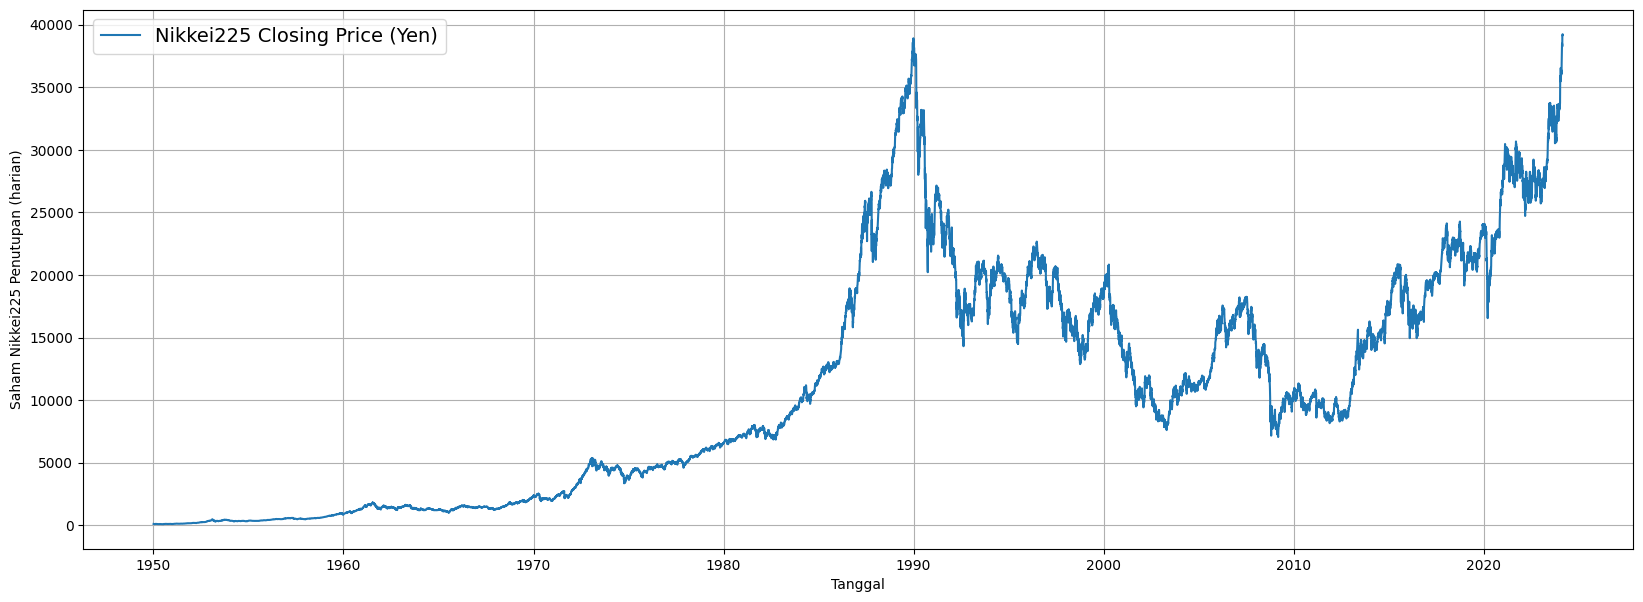

In [ ]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)")


Visualisasi data discount rate

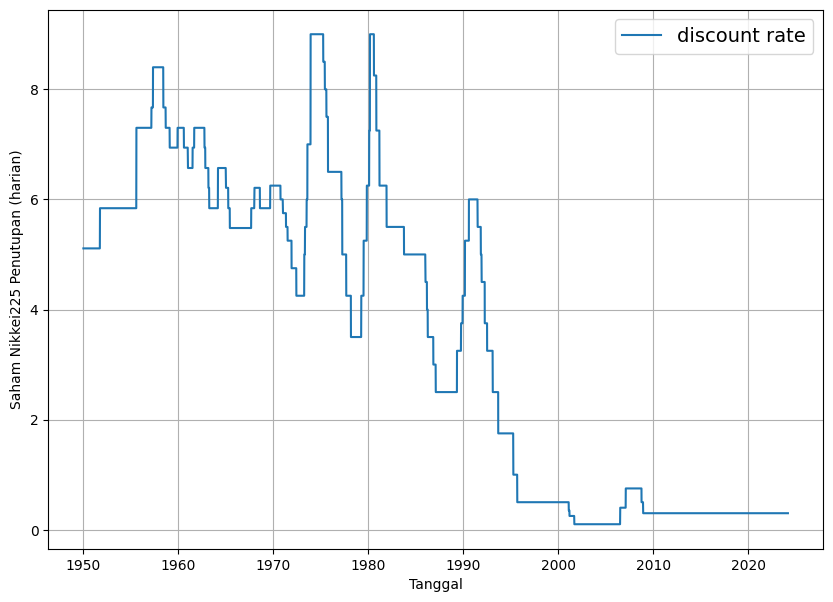

In [ ]:

plt.figure(figsize = (10,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate")


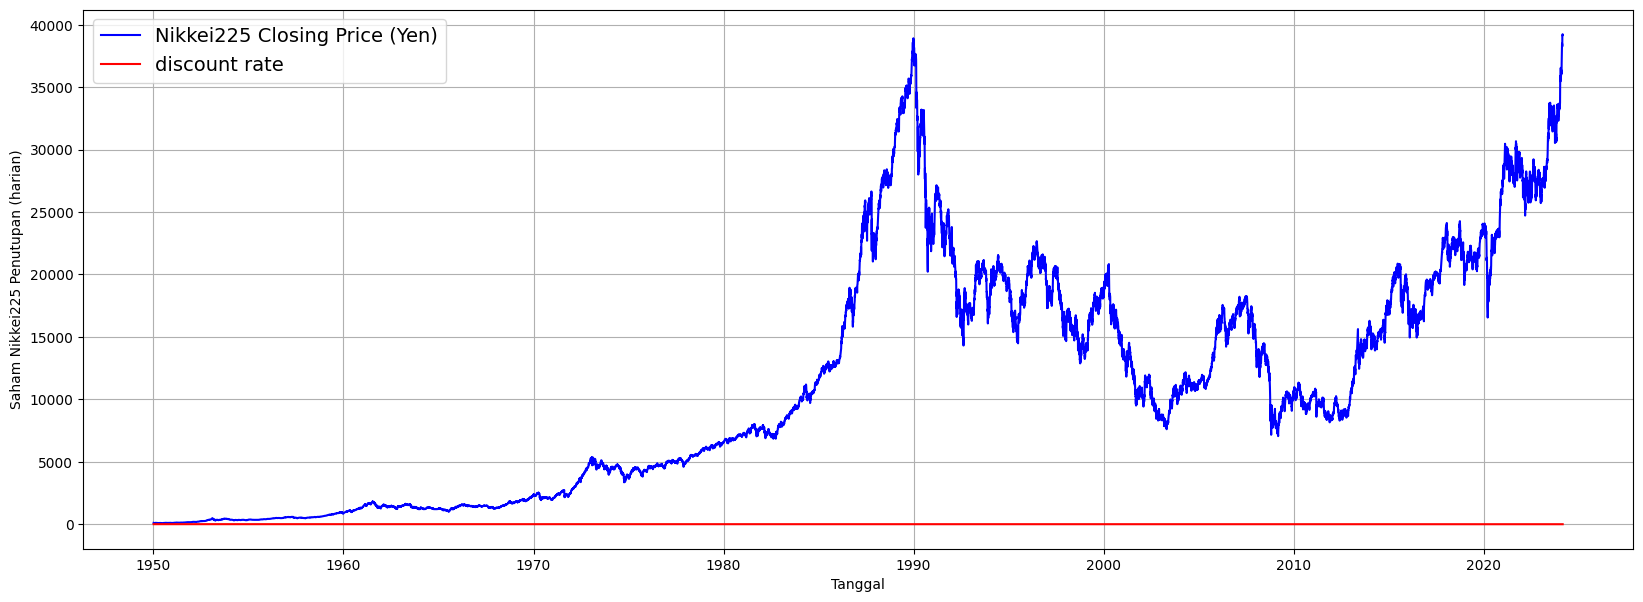

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate", color = 'r')


# Melakukan normalisasi dataset

In [ ]:

from sklearn.preprocessing import MinMaxScaler

# meinputkan data ke MinMaxScaler
scaler_multivariate = MinMaxScaler(feature_range=(0, 1))
scaler_multivariate.fit(nikkei225_close_multivariate_df)

MinMaxScaler()

In [ ]:
scaler_univariate = MinMaxScaler(feature_range = (0,1))

# mengimplementasikan scaler khusus univariate ke data saham nikkei225 saja
scaler_univariate.fit(nikkei225_close_df["Closing Price (Yen)"].values.reshape(-1, 1))

MinMaxScaler()

In [ ]:
# Melakukan normalization
scaler_multivariate.transform(nikkei225_close_multivariate_df)

array([[5.95337367e-04, 5.62921348e-01],
       [5.18206571e-04, 5.62921348e-01],
       [4.44140575e-04, 5.62921348e-01],
       ...,
       [1.00000000e+00, 2.24719101e-02],
       [9.99195745e-01, 2.24719101e-02],
       [9.98127152e-01, 2.24719101e-02]])

membuat dataframe dengan nilai normalized

In [ ]:
normalized_data  = scaler_multivariate.transform(nikkei225_close_multivariate_df)
normalized_data


array([[5.95337367e-04, 5.62921348e-01],
       [5.18206571e-04, 5.62921348e-01],
       [4.44140575e-04, 5.62921348e-01],
       ...,
       [1.00000000e+00, 2.24719101e-02],
       [9.99195745e-01, 2.24719101e-02],
       [9.98127152e-01, 2.24719101e-02]])

In [ ]:
print ("dataset_normalized.shape" , normalized_data.shape)

dataset_normalized.shape (20078, 2)


In [ ]:
normalized_data[:,0].reshape(-1, 1)

array([[5.95337367e-04],
       [5.18206571e-04],
       [4.44140575e-04],
       ...,
       [1.00000000e+00],
       [9.99195745e-01],
       [9.98127152e-01]])

In [ ]:
type(normalized_data[:,0].reshape(-1, 1))

numpy.ndarray

In [ ]:
# konversi array menjadi bentuk dataframe
scaled_nikkei225_close_multivariate_df  = pd.DataFrame(normalized_data, columns=nikkei225_close_multivariate_df.columns)


In [ ]:
scaled_nikkei225_close_multivariate_df

Closing Price (Yen)  discount_rate
0                 0.000595       0.562921
1                 0.000518       0.562921
2                 0.000444       0.562921
3                 0.000452       0.562921
4                 0.000448       0.562921
...                    ...            ...
20073             0.996403       0.022472
20074             0.999852       0.022472
20075             1.000000       0.022472
20076             0.999196       0.022472
20077             0.998127       0.022472

[20078 rows x 2 columns]

LAtihan denormalisasi

In [ ]:

# # Fit the scaler to your data
# scaler = MinMaxScaler()
# scaler.fit(nikkei225_close_multivariate_df[['discount_rate']])

# # Perform inverse normalization
# inverse_normalized_data = scaler.inverse_transform(scaled_nikkei225_close_multivariate_df[:, 2].reshape(-1, 1))

# print(inverse_normalized_data)

In [ ]:
len(scaler_multivariate.transform(nikkei225_close_multivariate_df ))

20078

In [ ]:
scaler_multivariate.transform(nikkei225_close_multivariate_df )[:,0].reshape(-1, 1)

array([[5.95337367e-04],
       [5.18206571e-04],
       [4.44140575e-04],
       ...,
       [1.00000000e+00],
       [9.99195745e-01],
       [9.98127152e-01]])

Visualisasi data yang di normalisasi

In [ ]:
scaled_nikkei225_close_multivariate_df["discount_rate"]

0        0.562921
1        0.562921
2        0.562921
3        0.562921
4        0.562921
           ...   
20073    0.022472
20074    0.022472
20075    0.022472
20076    0.022472
20077    0.022472
Name: discount_rate, Length: 20078, dtype: float64

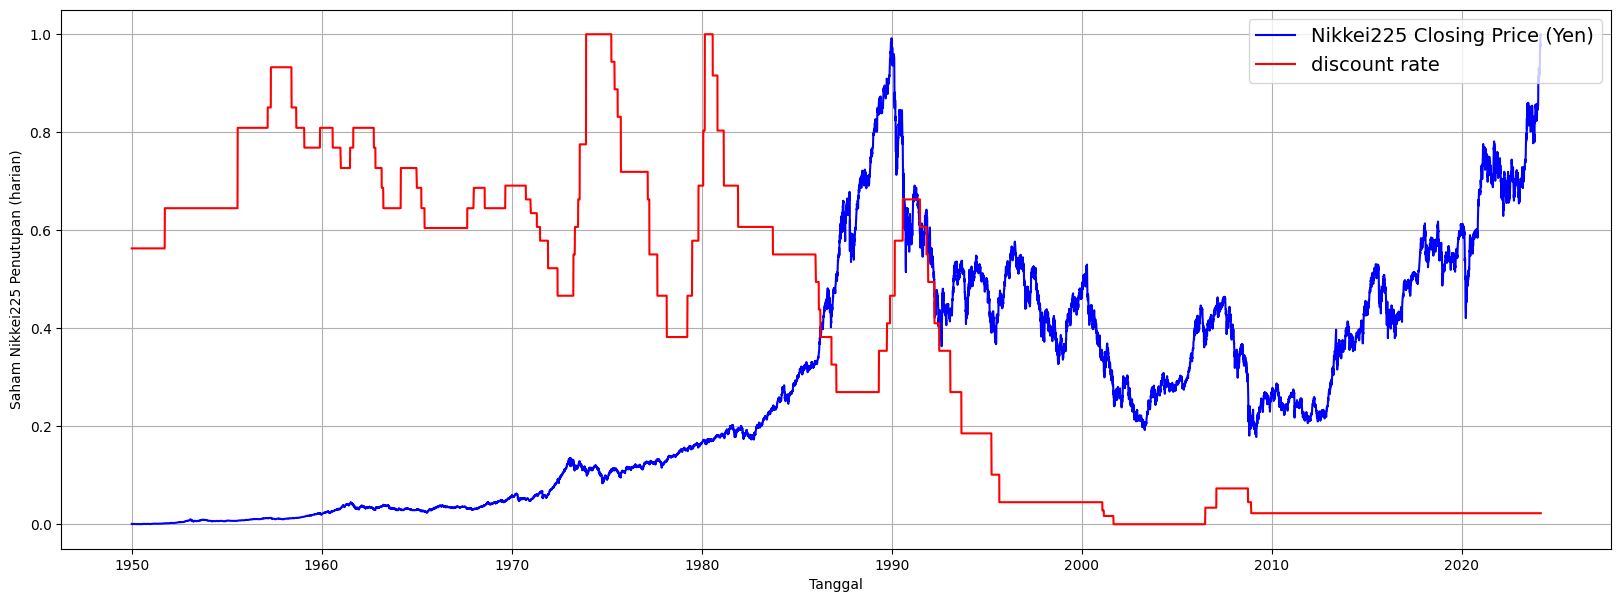

In [ ]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["Closing Price (Yen)"], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["discount_rate"], format = "-", label = "discount rate", color = 'r')


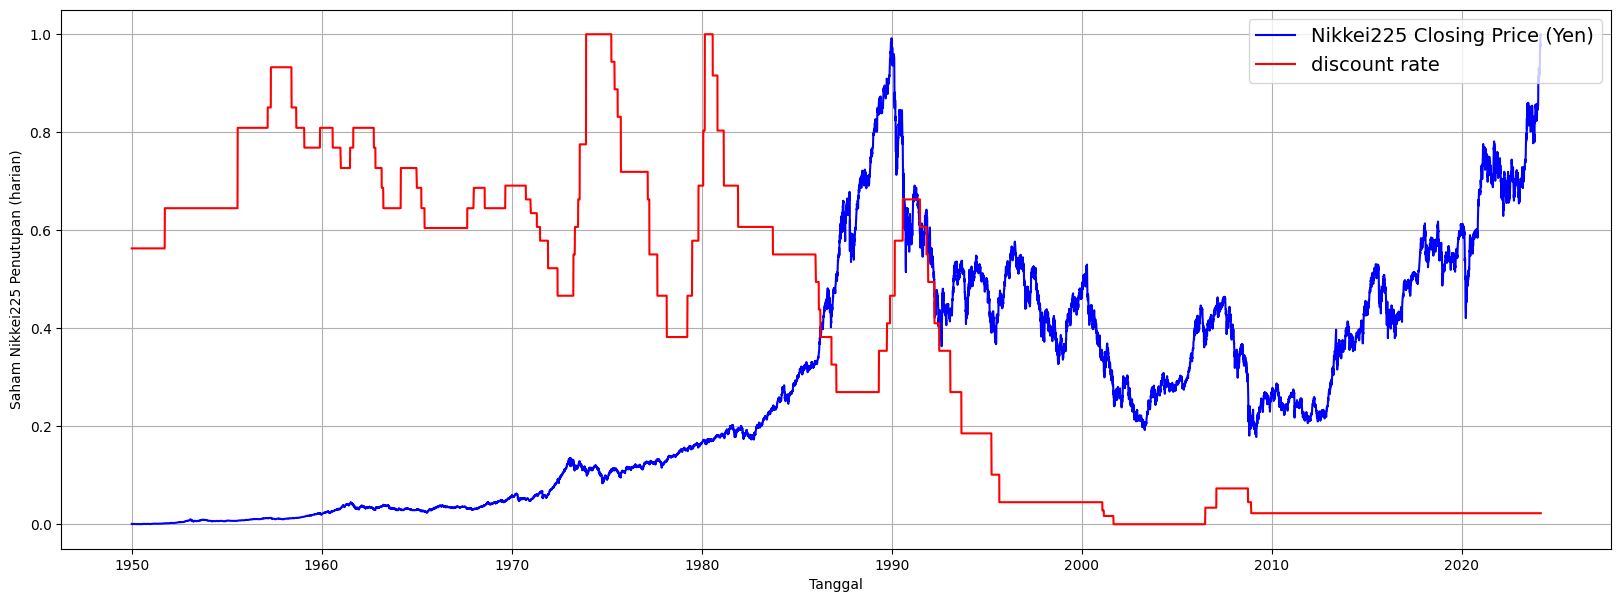

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,0], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,1], format = "-", label = "discount rate", color = 'r')



# Membuat dataset multivariate menjadi format sliding window dengan pendekatan multistep multivariate time series forecasting

In [ ]:
# PENGATURAN UNTUK UKURAN INPUT SEQUENCE ATAU LAG ATAU WINDOW

# HORIZON DI ATUR UNTUK MEMILIKI UKUTAN 1 UNTUK MODEL MENGELUARKAN OUTPUT SATU TIMESTEPS SETIAP PREDIKSI
HORIZON = 1
WINDOW_SIZE = 21

# PENGATURAN PRESENTASE DISTRIBUSI DALAM MEMBAGI DATASET KE DALAM TRAIN DAN TEST SET
SPLIT_SIZE = 0.8 # 80% data untuk train test 20% untuk test size

In [ ]:
nikkei225_close_multivariate_df[:2]

Closing Price (Yen) discount_rate
Date                                         
1950-01-04               108.56          5.11
1950-01-05               105.54          5.11

In [ ]:
scaled_nikkei225_close_multivariate_df[:2]

Closing Price (Yen)  discount_rate
0             0.000595       0.562921
1             0.000518       0.562921

membuat window dan horizon multivariate

In [ ]:
# jumlah keseluruhan data sebelum dibentuk menjadi sliding window
len(scaled_nikkei225_close_multivariate_df)

20078

In [ ]:
# fungsi untuk membuat sliding window

import numpy as np

def make_dataset(raw_data, WINDOW_SIZE=21, HORIZON = 1):
    _X = []
    _y = []

    for i in range(len(raw_data) - WINDOW_SIZE - HORIZON + 1):
        _X.append(raw_data[i : i + WINDOW_SIZE])
        _y.append(raw_data[i + WINDOW_SIZE : i + WINDOW_SIZE + HORIZON])
    _X = np.array(_X).reshape(len(_X), WINDOW_SIZE, 1)
    _y = np.array(_y).reshape(len(_y), HORIZON, 1)

    return _X, _y

In [ ]:
from sklearn import preprocessing

columns = list(scaled_nikkei225_close_multivariate_df.columns)

# memanggil fungsi untuk membuat sliding window
Xs = []
for i in range(len(columns)):
    Xs.append((scaled_nikkei225_close_multivariate_df[columns[i]]))
Xs = np.array(Xs)

X_nikkei, y_nikkei = make_dataset(Xs[0], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)
X_discRate, y_discRate = make_dataset(Xs[1], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)


# menggabungkan data multivariate untuk windows dan label
X_concat = np.concatenate([X_nikkei, X_discRate], axis=2)
y_concat = np.concatenate([y_nikkei, y_discRate], axis=2)

In [ ]:

full_windows = X_concat
full_labels = y_concat

In [ ]:
len(full_windows), len(full_labels)

(20057, 20057)

In [ ]:
print(full_windows[0]),
print(full_windows.shape)
print("\n")
print(full_labels[0])
print(full_labels.shape)

[[5.95337367e-04 5.62921348e-01]
 [5.18206571e-04 5.62921348e-01]
 [4.44140575e-04 5.62921348e-01]
 [4.52057975e-04 5.62921348e-01]
 [4.47716175e-04 5.62921348e-01]
 [4.11449377e-04 5.62921348e-01]
 [3.60369380e-04 5.62921348e-01]
 [3.12354183e-04 5.62921348e-01]
 [2.50036586e-04 5.62921348e-01]
 [2.97285583e-04 5.62921348e-01]
 [2.79662984e-04 5.62921348e-01]
 [2.55910786e-04 5.62921348e-01]
 [3.03925983e-04 5.62921348e-01]
 [3.48620981e-04 5.62921348e-01]
 [3.26911982e-04 5.62921348e-01]
 [3.32019981e-04 5.62921348e-01]
 [3.02648983e-04 5.62921348e-01]
 [3.03159783e-04 5.62921348e-01]
 [2.87580384e-04 5.62921348e-01]
 [2.60507985e-04 5.62921348e-01]
 [2.45183986e-04 5.62921348e-01]]
(20057, 21, 2)


[[2.44417786e-04 5.62921348e-01]]
(20057, 1, 2)


In [ ]:
print(full_windows[1]),
print(full_windows.shape)
print("\n")
print(full_labels[1])
print(full_labels.shape)

[[5.18206571e-04 5.62921348e-01]
 [4.44140575e-04 5.62921348e-01]
 [4.52057975e-04 5.62921348e-01]
 [4.47716175e-04 5.62921348e-01]
 [4.11449377e-04 5.62921348e-01]
 [3.60369380e-04 5.62921348e-01]
 [3.12354183e-04 5.62921348e-01]
 [2.50036586e-04 5.62921348e-01]
 [2.97285583e-04 5.62921348e-01]
 [2.79662984e-04 5.62921348e-01]
 [2.55910786e-04 5.62921348e-01]
 [3.03925983e-04 5.62921348e-01]
 [3.48620981e-04 5.62921348e-01]
 [3.26911982e-04 5.62921348e-01]
 [3.32019981e-04 5.62921348e-01]
 [3.02648983e-04 5.62921348e-01]
 [3.03159783e-04 5.62921348e-01]
 [2.87580384e-04 5.62921348e-01]
 [2.60507985e-04 5.62921348e-01]
 [2.45183986e-04 5.62921348e-01]
 [2.44417786e-04 5.62921348e-01]]
(20057, 21, 2)


[[2.01510589e-04 5.62921348e-01]]
(20057, 1, 2)


In [ ]:
print(full_labels[:3])
(full_labels.shape)

[[[2.44417786e-04 5.62921348e-01]]

 [[2.01510589e-04 5.62921348e-01]]

 [[1.86186590e-04 5.62921348e-01]]]


(20057, 1, 2)

format training atau test data pada **window/fitur** adalah **(jumlah sample, ukuran window, jumlah variable)**

In [ ]:
full_windows.shape

(20057, 21, 2)

format training atau test data pada **label** adalah **(jumlah sample, jumlah variabel)** [Hanya memiliki dua dimensi shape jika ingin dengan benar menghasilkan output yang sesuai]

In [ ]:
full_labels.shape

(20057, 1, 2)

In [ ]:
full_labels = np.squeeze(full_labels)
full_labels.shape

(20057, 2)

In [ ]:
full_labels[:3]

array([[2.44417786e-04, 5.62921348e-01],
       [2.01510589e-04, 5.62921348e-01],
       [1.86186590e-04, 5.62921348e-01]])

Membagi data menjadi training dataset dan test data set. Pembagian data menjadi train dan test dengan train series split dimana Test dataset akan menggunakan data yang pseusdo future (data yang seakan2 berperan dari masa depan).

In [ ]:
len(full_windows[: int(SPLIT_SIZE * len(full_windows))])

16045

In [ ]:
# Membagi full sliding windows menjadi windows untuk train dan test begitu pula untuk label
train_windows = full_windows[:len(full_windows[: int(SPLIT_SIZE * len(full_windows))])]
test_windows = full_windows[len(full_windows[: int(SPLIT_SIZE * len(full_windows))]):]

train_labels = full_labels[:len(full_windows[: int(SPLIT_SIZE * len(full_labels))])]
test_labels = full_labels[len(full_windows[: int(SPLIT_SIZE * len(full_labels))]):]

In [ ]:
print("jumlah sliding windows keseluruhan adalah :{n_full_windows}".format(n_full_windows = len(full_windows)))

print("Sliding windows untuk train berjumlah : {n_train_windows}".format(n_train_windows = len(train_windows)))
print("Sliding windows untuk test berjumlah : {n_test_windows}".format(n_test_windows = len(test_windows)))


jumlah sliding windows keseluruhan adalah :20057
Sliding windows untuk train berjumlah : 16045
Sliding windows untuk test berjumlah : 4012


In [ ]:
print("jumlah label keseluruhan adalah :{n_full_labels}".format(n_full_labels = len(full_labels)))

print("label untuk train berjumlah : {n_train_labels}".format(n_train_labels = len(train_labels)))
print("label untuk test berjumlah : {n_test_labels}".format(n_test_labels = len(test_labels)))


jumlah label keseluruhan adalah :20057
label untuk train berjumlah : 16045
label untuk test berjumlah : 4012


In [ ]:
"windows", test_windows[:2], "Labels",test_labels[:2]

('windows',
 array([[[0.4198694 , 0.07303371],
         [0.4172015 , 0.07303371],
         [0.41050951, 0.07303371],
         [0.41302647, 0.07303371],
         [0.40958266, 0.07303371],
         [0.40046003, 0.07303371],
         [0.40333838, 0.07303371],
         [0.4012934 , 0.07303371],
         [0.40189589, 0.07303371],
         [0.409717  , 0.07303371],
         [0.40140066, 0.07303371],
         [0.41620722, 0.07303371],
         [0.41703089, 0.07303371],
         [0.41444675, 0.07303371],
         [0.41672288, 0.07303371],
         [0.41759149, 0.07303371],
         [0.42771759, 0.07303371],
         [0.42652921, 0.07303371],
         [0.42806851, 0.07303371],
         [0.43319745, 0.07303371],
         [0.43710788, 0.07303371]],
 
        [[0.4172015 , 0.07303371],
         [0.41050951, 0.07303371],
         [0.41302647, 0.07303371],
         [0.40958266, 0.07303371],
         [0.40046003, 0.07303371],
         [0.40333838, 0.07303371],
         [0.4012934 , 0.07303371],
     

# LANJUT MEMBUAT FUNGSI EVALUASI DAN BIKIN MODEL

# Membuat fungsi untuk melakukan evaluasi regression problem

fungsi digunakan untuk menguji prediksi model dengan nilai sebenarnya dan menghasilkan nilai evaluasi masing-masing metrik

In [ ]:
import tensorflow as tf


sehingga yang dilakukan dengan tf.reduce_mean adalah melakukan agregasi ke banyak nilai mae akibat dari horizon yang ukurannya lebih dari satu menjadi satu single value seperti yang dilakukan tensorflow

tf.reduce_mean mampu menghasilkan satu nilai mae yang sudah direratakan dan hasilnya sama dengan yang dihitung dari model saat evaluasi metrik MAE-nya dengan .evaluate, menghasilkan nilai MAE yang sama-sama 892.1709

In [ ]:
def evaluate_preds(y_true, y_pred):
  #Pastikan data yang diproses dengan library tensorflow bertipe float32
  y_true = tf.cast(y_true, dtype = tf.float32) #karena metrik evaluasi dari library tensorflow bisa
  y_pred = tf.cast(y_pred, dtype = tf.float32) #memunculkan error jika tipe bukan float32

  y_true = tf.squeeze(y_true)
  y_pred = tf.squeeze(y_pred)

  # menghitung metrik evaluasi regression problem
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)

  # kalkulasi nilai R-square
  from sklearn.metrics import r2_score
  Rsquare = r2_score(y_true, y_pred)



  ## memperhitungkan berbagai ukuran metrics
  # (artinya untuk horizon atau label yang dimensinya (fiturnya) lebih dari satu akan menghasilkan metrics (ex: MAE) yang berukuran dimensi lbh dari satu,
  # sehingga perlu di lakukan tf.reduce_mean lebih lanjut supaya menghasilkan single value metrics)
  # Artinya nilai MAE yang di reduce_mean adalah gabungan dari MAE dari beberapa fitur tersebut

  # Calculate various metrics
  # (meaning for larger horizon will produce metrics (ex: MAE) with larger dimension,
  # so tf.reduce_mean is needed to produce single value metrics)
  if mae.ndim>0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    #Rsquare = tf.reduce_mean(Rsquare)

    # Calculate R-square value
    from sklearn.metrics import r2_score
    Rsquare = np.mean([r2_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])

  return {"mae" : mae.numpy(), #ditampilkan dalam bentuk numpy bukan tensor
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "R-square" : Rsquare}


# membuat modelling checkpoint

karena model akan belajar terus menerus pada masing-masing epoch, diantara epoch-epoch tersebut dapat menghasilkan pembelajaran terbaik tidak hanya di eopch terakhir saja. Maka dari itu, epoch yang memiliki hasil terbaik akan di simpan selama training.  

Dengan menyimpan epoch yang terbaik, model yang akan dibuat adalah model yang terbaik dan dapat dibandingkan dengan model terbaik lainnya secara adil.

Untuk membuat modelling checkpoint callback digunakan: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [ ]:
# membuat modelling checkpoint

import os # membuat folder untuk menyimpan best model

# mmebuat function untuk implementasi ModelCheckpoint callback
def create_model_checkpoint(model_name, save_path = "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                                                    monitor = "val_loss",
                                                                    verbose = 1,
                                                                    save_best_only = True)

In [ ]:
train_windows.shape

(16045, 21, 2)

In [ ]:
train_windows[0:2]

array([[[5.95337367e-04, 5.62921348e-01],
        [5.18206571e-04, 5.62921348e-01],
        [4.44140575e-04, 5.62921348e-01],
        [4.52057975e-04, 5.62921348e-01],
        [4.47716175e-04, 5.62921348e-01],
        [4.11449377e-04, 5.62921348e-01],
        [3.60369380e-04, 5.62921348e-01],
        [3.12354183e-04, 5.62921348e-01],
        [2.50036586e-04, 5.62921348e-01],
        [2.97285583e-04, 5.62921348e-01],
        [2.79662984e-04, 5.62921348e-01],
        [2.55910786e-04, 5.62921348e-01],
        [3.03925983e-04, 5.62921348e-01],
        [3.48620981e-04, 5.62921348e-01],
        [3.26911982e-04, 5.62921348e-01],
        [3.32019981e-04, 5.62921348e-01],
        [3.02648983e-04, 5.62921348e-01],
        [3.03159783e-04, 5.62921348e-01],
        [2.87580384e-04, 5.62921348e-01],
        [2.60507985e-04, 5.62921348e-01],
        [2.45183986e-04, 5.62921348e-01]],

       [[5.18206571e-04, 5.62921348e-01],
        [4.44140575e-04, 5.62921348e-01],
        [4.52057975e-04, 5.62921

In [ ]:
train_labels[0:2]

array([[2.44417786e-04, 5.62921348e-01],
       [2.01510589e-04, 5.62921348e-01]])

In [ ]:
train_labels.shape

(16045, 2)

In [ ]:
test_windows.shape

(4012, 21, 2)

In [ ]:
test_labels.shape

(4012, 2)

In [ ]:
# keterangan jumlah feature
test_labels.shape[1]

2

Mulai membuat model Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
from keras import Model
from keras.layers import Input, Dense, Bidirectional, LSTM, RepeatVector, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from numpy import array, hstack
import numpy as np

# Model 1: Conv1D

In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch


<ipython-input-75-b420bea64af7>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
# import library untuk mmebuat model

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
train_windows.shape

(16045, 21, 2)

In [ ]:
train_labels.shape

(16045, 2)

In [ ]:
test_windows.shape

(4012, 21, 2)

In [ ]:
test_labels.shape

(4012, 2)

In [ ]:
test_labels.shape[1]

2

## Tuner Builder

In [ ]:
#membuat model Conv1D
def model_Conv1D_multi_builder(hp):
  tf.random.set_seed(42)

  model_1 = tf.keras.models.Sequential([


      #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
      tf.keras.layers.Conv1D(filters = hp.Int('conv1D_n_filters', min_value=32, max_value=256, step=32),
                             kernel_size = hp.Int('conv1D_kernel_size', min_value=5, max_value=10, step=1),
                             strides = 1,
                             padding ="causal",
                             activation = "relu",
                             input_shape=[train_windows.shape[1], train_windows.shape[2]]),

      tf.keras.layers.GlobalMaxPooling1D(),  # Add GlobalMaxPooling1D layer
      tf.keras.layers.Dense(test_labels.shape[1])
      #filters adalah jumlah hidden unit dalam layers tersebut
      # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
      # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
  ], name = "model_1_conv1D_multivariate")

  #compile model 1
  model_1.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_1


In [ ]:
import keras_tuner as kt

tuner_Conv1D_multi = kt.Hyperband(model_Conv1D_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs',
                     project_name='Conv1D_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs/Conv1D_multivariate/tuner0.json


## Proses tuning


In [ ]:
tuner_Conv1D_multi.search(train_windows,
                          train_labels,
                          epochs=10,
                          validation_data=(test_windows, test_labels),
                          batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
tuner_Conv1D_multi.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_Conv1D_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
print('Best tune model Conv1D multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model Conv1D multivariate:
conv1D_n_filters: 128
conv1D_kernel_size: 5
learning_rate: 0.001


## Hasil semua parameter tuning

In [ ]:
tuning =['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all =tuner_Conv1D_multi.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam = pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_best_hyperparameter_models/hp_Conv1D_multi.csv')
df_hyparam


conv1D_n_filters  conv1D_kernel_size  learning_rate
0                128                   5         0.0010
1                256                  10         0.0010
2                 32                   9         0.0010
3                 32                   7         0.0100
4                 64                   7         0.0100
5                256                  10         0.0010
6                224                   5         0.0100
7                 32                   7         0.0100
8                 64                   8         0.0100
9                192                   8         0.0010
10                64                   8         0.0100
11               128                   5         0.0010
12                64                   9         0.0100
13                32                   7         0.0100
14               128                  10         0.0010
15               256                   7         0.0100
16               192                   8         0.0010
17               256                  10         0.0010
18                96                   8         0.0010
19               192                   5         0.0001
20                64                   7         0.0100
21               128                   7         0.0010
22               192                   7         0.0001
23                32                  10         0.0100
24               224                   9         0.0001
25               192                  10         0.0100
26               128                   5         0.0001
27               160                   9         0.0001
28               256                   5         0.0001
29                32                   8         0.0001

In [ ]:
tuner_Conv1D_multi.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs/Conv1D_multivariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0025 summary
Hyperparameters:
conv1D_n_filters: 128
conv1D_kernel_size: 5
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0019
Score: 0.007372256834059954

Trial 0016 summary
Hyperparameters:
conv1D_n_filters: 256
conv1D_kernel_size: 10
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0015
Score: 0.0076209804974496365

Trial 0027 summary
Hyperparameters:
conv1D_n_filters: 32
conv1D_kernel_size: 9
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.007820977829396725

Trial 0017 summary
Hyperparameters:
conv1D_n_filters: 32
conv1D_kernel_size: 7
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/brack

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_1 = tuner_Conv1D_multi.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_1 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_1_Conv1D_multivariate.h5")

In [ ]:
# fit
history = model_1.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/50
120/126 [===========================>..] - ETA: 0s - loss: 0.0367
Epoch 1: val_loss improved from inf to 0.00886, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window14/8020_model_best_epoch/model_1_conv1D_multivariate
126/126 [==============================] - 2s 10ms/step - loss: 0.0358 - val_loss: 0.0089
Epoch 2/50
121/126 [===========================>..] - ETA: 0s - loss: 0.0169
Epoch 2: val_loss did not improve from 0.00886
126/126 [==============================] - 0s 4ms/step - loss: 0.0168 - val_loss: 0.0125
Epoch 3/50
126/126 [==============================] - ETA: 0s - loss: 0.0157
Epoch 3: val_loss did not improve from 0.00886
126/126 [==============================] - 0s 4ms/step - loss: 0.0157 - val_loss: 0.0124
Epoch 4/50
119/126 [===========================>..] - ETA: 0s - loss: 0.0149
Epoch 4: val_loss did not improve from 0.00886
126/126 [==============================] - 0s 4ms/step - loss: 0.0148 - val_loss: 0.0136
Epoch 5/50


visualisasi model shape

In [ ]:
model_1.summary()

Model: "model_1_conv1D_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 21, 128)           1408      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 1666 (6.51 KB)
Trainable params: 1666 (6.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


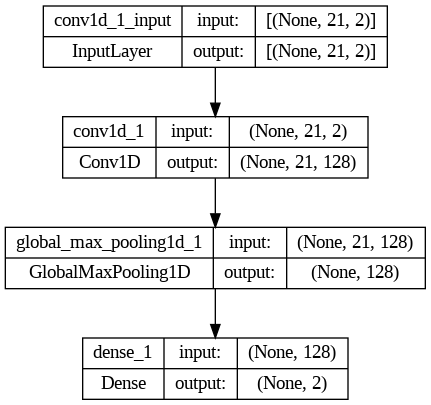

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_plot/model_Conv1D_multi_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

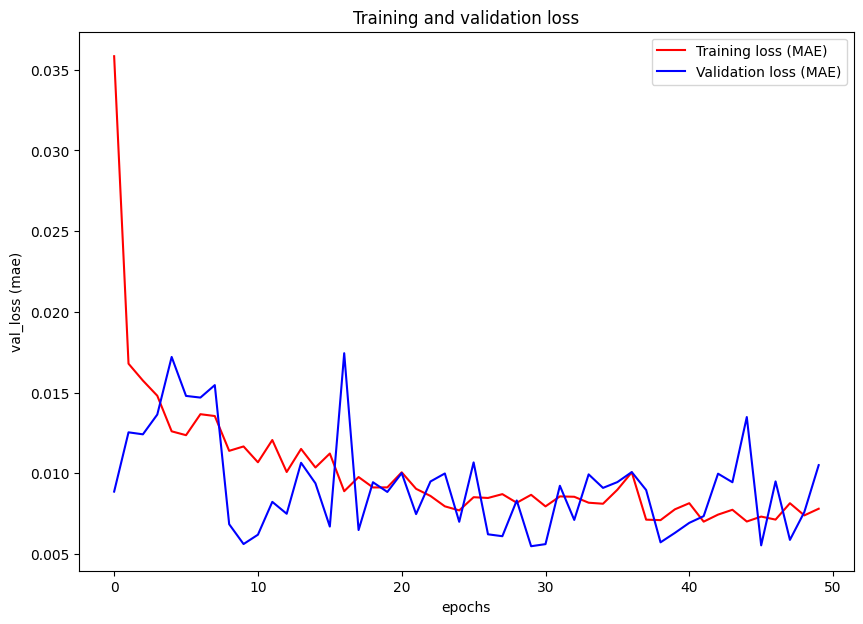

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.title ('Training and validation loss')
plt.legend(loc=0)



# simpan visualisasi loss per epoch menjadi image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_visualization/loss_Conv1D_multi.png')


# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_value_per_epoch/loss_Conv1D_multi.csv', index=False)


In [ ]:
# mengevaluasi model 1 dari epochs terakhir
model_1.evaluate(test_windows, test_labels)

126/126 [==============================] - 0s 2ms/step - loss: 0.0076


0.0075800237245857716

In [ ]:
# mengevaluasi dan load model 1 pada best epoch yang loss mae paling kecil sepanjang training

model_1 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_1_conv1D_multivariate")
model_1.evaluate(test_windows, test_labels)


126/126 [==============================] - 0s 2ms/step - loss: 0.0076


0.0075800237245857716

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_1_preds = tf.squeeze(model_1.predict(test_windows))
model_1_preds


126/126 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(4012, 2), dtype=float32, numpy=
array([[0.42548153, 0.0711497 ],
       [0.42702767, 0.07117541],
       [0.42868966, 0.07104442],
       ...,
       [0.967433  , 0.0414712 ],
       [0.9733449 , 0.04176646],
       [0.9758197 , 0.04165607]], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_1_preds = scaler_multivariate.inverse_transform(model_1_preds)
denormalized_test_labels = scaler_multivariate.inverse_transform(test_labels)

In [ ]:
# mengukur predicted value kedua time series dengan metrik evaluasi regresion problem

model_1_results = evaluate_preds(y_true = denormalized_test_labels,
                                 y_pred = denormalized_model_1_preds)

model_1_results

{'mae': 235.71507,
 'mse': 241174.05,
 'rmse': 333.33185,
 'R-square': 0.930521526492158}

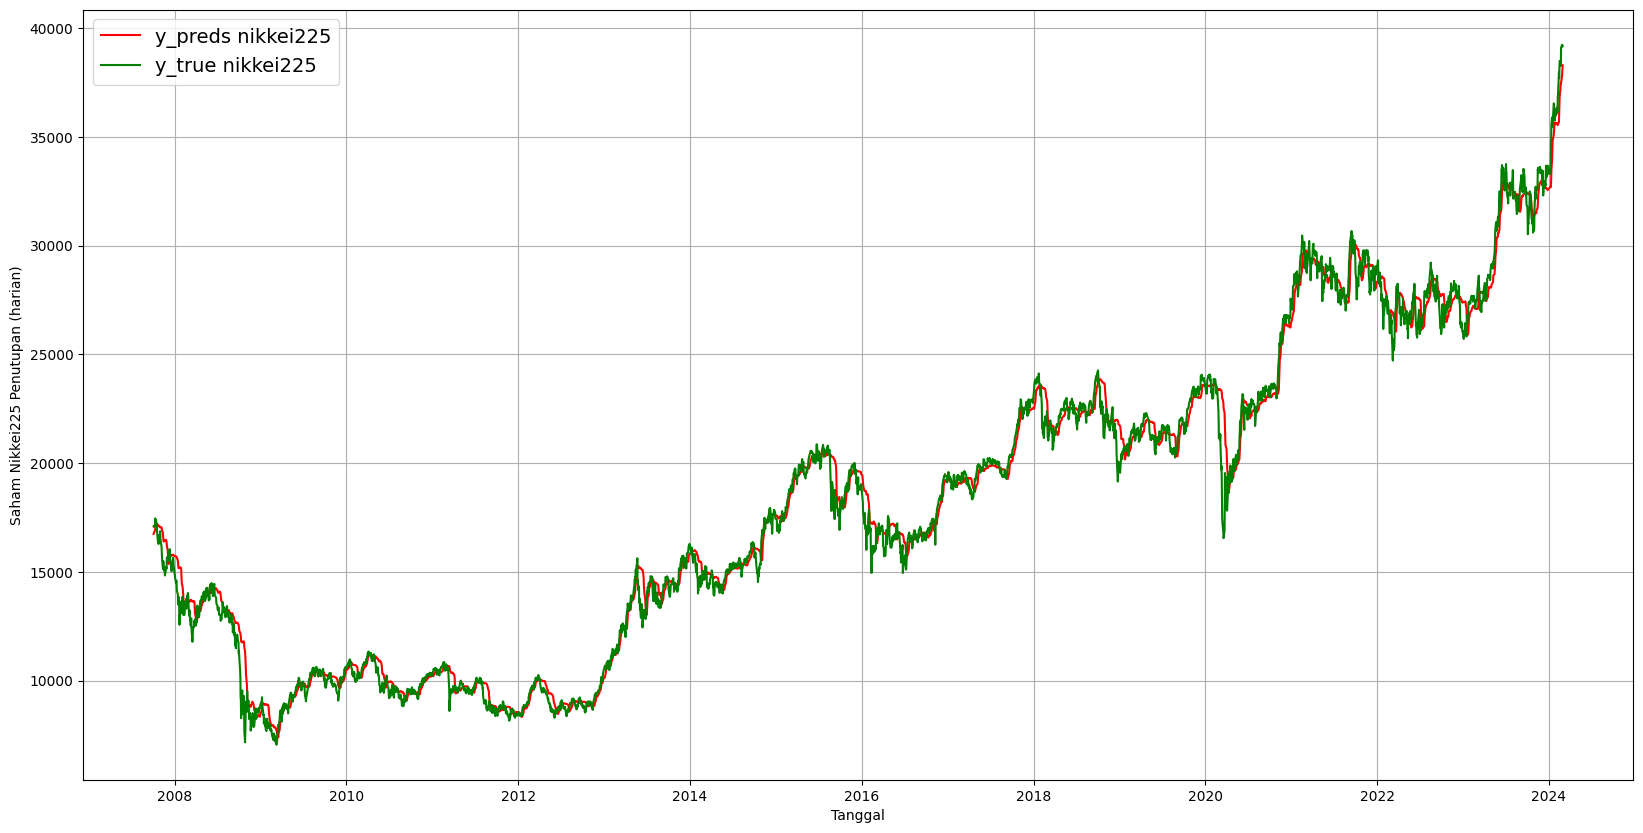

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_1_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_1_plot_prediksi_Conv1D_multi.png')

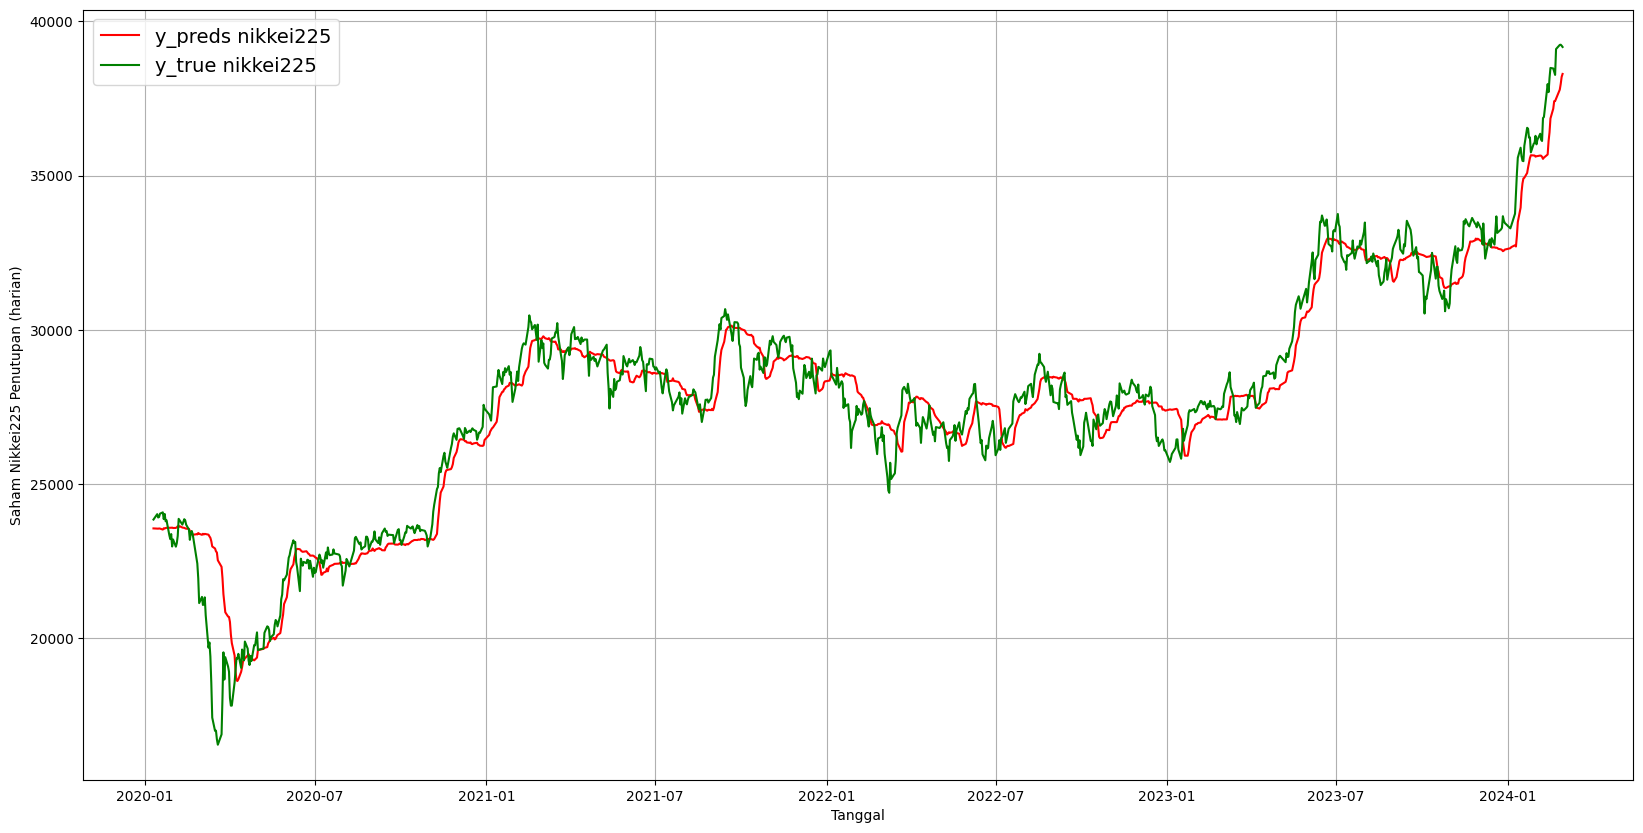

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_1_preds[:,0], format = "-",start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", start = 3000, label = "y_true nikkei225", color = 'g')


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_1_plot_prediksi_Conv1D_multi_zoomin.png')

simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_1, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_1_Conv1D_multivariate.h5")

<ipython-input-100-48fbd5bdcda1>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_1, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_1_Conv1D_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_1 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_1_Conv1D_multivariate.h5")

# Model 2 : LSTM

In [ ]:
train_windows.shape[2]

2

## Tuner Builder

In [ ]:
# membuat model LSTM dengan hyperparameter tuning

def model_LSTM_multi_builder(hp):
  tf.random.set_seed(42)

  model_2 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units', min_value=32, max_value=256, step=32),
                               input_shape=(train_windows.shape[1], train_windows.shape[2]),
                               return_sequences = False,
                               activation = "relu"),

          #tf.keras.layers.Dropout(0.2),
          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(test_labels.shape[1])
          ], name = "model_2_LSTM_multivariate")



  #compile model 2
  model_2.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_2

In [ ]:
import keras_tuner as kt

tuner_LSTM_multi = kt.Hyperband(model_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs',
                     project_name='LSTM_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs/LSTM_multivariate/tuner0.json


## Proses tuning


In [ ]:
tuner_LSTM_multi.search(train_windows,
                        train_labels,
                        epochs=10,
                        validation_data=(test_windows, test_labels),
                        batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
tuner_Conv1D_multi.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units', 'learning_rate']
print('Best tune model LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model LSTM multivariate:
lstm_n_units: 32
learning_rate: 0.01


## Hasil semua parameter tuning

In [ ]:
tuning =['lstm_n_units', 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all =tuner_LSTM_multi.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam = pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_best_hyperparameter_models/hp_LSTM_multi.csv')
df_hyparam


lstm_n_units  learning_rate
0             32         0.0100
1            224         0.0100
2             32         0.0100
3            256         0.0001
4             64         0.0100
5            224         0.0010
6            160         0.0100
7            224         0.0100
8            192         0.0001
9             96         0.0001
10           224         0.0010
11            32         0.0100
12            96         0.0010
13           160         0.0100
14           192         0.0010
15           224         0.0010
16            96         0.0010
17           224         0.0001
18           192         0.0100
19           128         0.0010
20            96         0.0100
21           192         0.0010
22            64         0.0010
23           160         0.0010
24           256         0.0010
25           128         0.0100
26           256         0.0100
27            32         0.0010
28           128         0.0001
29            32         0.0001

In [ ]:
tuner_LSTM_multi.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs/LSTM_multivariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0016 summary
Hyperparameters:
lstm_n_units: 32
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.004468539264053106

Trial 0024 summary
Hyperparameters:
lstm_n_units: 224
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0022
Score: 0.004865685477852821

Trial 0013 summary
Hyperparameters:
lstm_n_units: 32
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0008
Score: 0.005797754041850567

Trial 0029 summary
Hyperparameters:
lstm_n_units: 256
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.006639108993113041

Trial 0026 summary
Hyperparameters:
lst

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_2 = tuner_LSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_2 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_2_LSTM_multivariate.h5")

In [ ]:

# fit
history = model_2.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/50
123/126 [============================>.] - ETA: 0s - loss: 0.0355
Epoch 1: val_loss improved from inf to 0.01297, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window14/8020_model_best_epoch/model_2_LSTM_multivariate
126/126 [==============================] - 6s 35ms/step - loss: 0.0350 - val_loss: 0.0130
Epoch 2/50
126/126 [==============================] - ETA: 0s - loss: 0.0147
Epoch 2: val_loss did not improve from 0.01297
126/126 [==============================] - 3s 24ms/step - loss: 0.0147 - val_loss: 0.0142
Epoch 3/50
125/126 [============================>.] - ETA: 0s - loss: 0.0137
Epoch 3: val_loss improved from 0.01297 to 0.01122, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window14/8020_model_best_epoch/model_2_LSTM_multivariate
126/126 [==============================] - 4s 30ms/step - loss: 0.0137 - val_loss: 0.0112
Epoch 4/50
125/126 [============================>.] - ETA: 0s - loss: 0.0084
Epoch 4: 

visualisasi model shape

In [ ]:
model_2.summary()

Model: "model_2_LSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4480      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4546 (17.76 KB)
Trainable params: 4546 (17.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


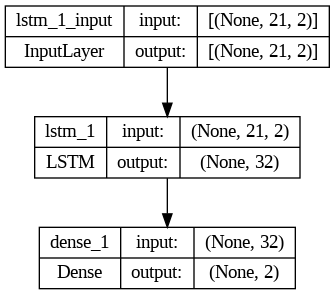

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model_2, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_plot/model_LSTM_multi_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

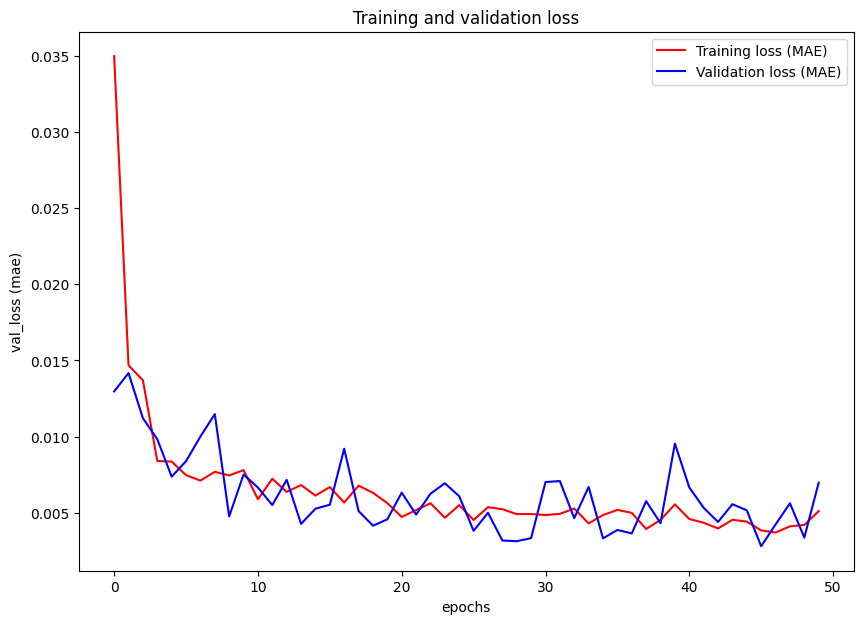

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.title ('Training and validation loss')
plt.legend(loc=0)


# simpan visualisasi loss per epoch menjadi image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_visualization/loss_LSTM_multi.png')


# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_value_per_epoch/loss_LSTM_multi.csv', index=False)


In [ ]:
# mengevaluasi model 2 dari epochs terakhir
model_2.evaluate(test_windows, test_labels)

126/126 [==============================] - 1s 5ms/step - loss: 0.0034


0.0034300663974136114

In [ ]:
# mengevaluasi dan load model 2 pada best epoch yang loss mae paling kecil sepanjang training

model_2 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_2_LSTM_multivariate")
model_2.evaluate(test_windows, test_labels)


126/126 [==============================] - 1s 3ms/step - loss: 0.0034


0.0034300663974136114

In [ ]:
# membuat predicted value berdasarkan model multivariate model_2 yang sudah di train

model_2_preds = tf.squeeze(model_2.predict(test_windows))
model_2_preds



126/126 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(4012, 2), dtype=float32, numpy=
array([[0.435795  , 0.07050002],
       [0.43307933, 0.07032895],
       [0.4323079 , 0.07019557],
       ...,
       [0.9981877 , 0.02340432],
       [0.99936074, 0.02338445],
       [0.99817294, 0.02330568]], dtype=float32)>

In [ ]:
model_2_preds[:,1]

<tf.Tensor: shape=(4012,), dtype=float32, numpy=
array([0.07050002, 0.07032895, 0.07019557, ..., 0.02340432, 0.02338445,
       0.02330568], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_2_preds = scaler_multivariate.inverse_transform(model_2_preds)
denormalized_test_labels = scaler_multivariate.inverse_transform(test_labels)

In [ ]:
# mengukur predicted value kedua time series dengan metrik evaluasi regresion problem

model_2_results = evaluate_preds(y_true = denormalized_test_labels,
                                 y_pred = denormalized_model_2_preds)

model_2_results

{'mae': 99.20235,
 'mse': 34963.08,
 'rmse': 140.28203,
 'R-square': 0.9818895546102404}

In [ ]:
tf.squeeze(test_labels[:,0])

<tf.Tensor: shape=(4012,), dtype=float64, numpy=
array([0.43436489, 0.43366381, 0.43608654, ..., 1.        , 0.99919575,
       0.99812715])>

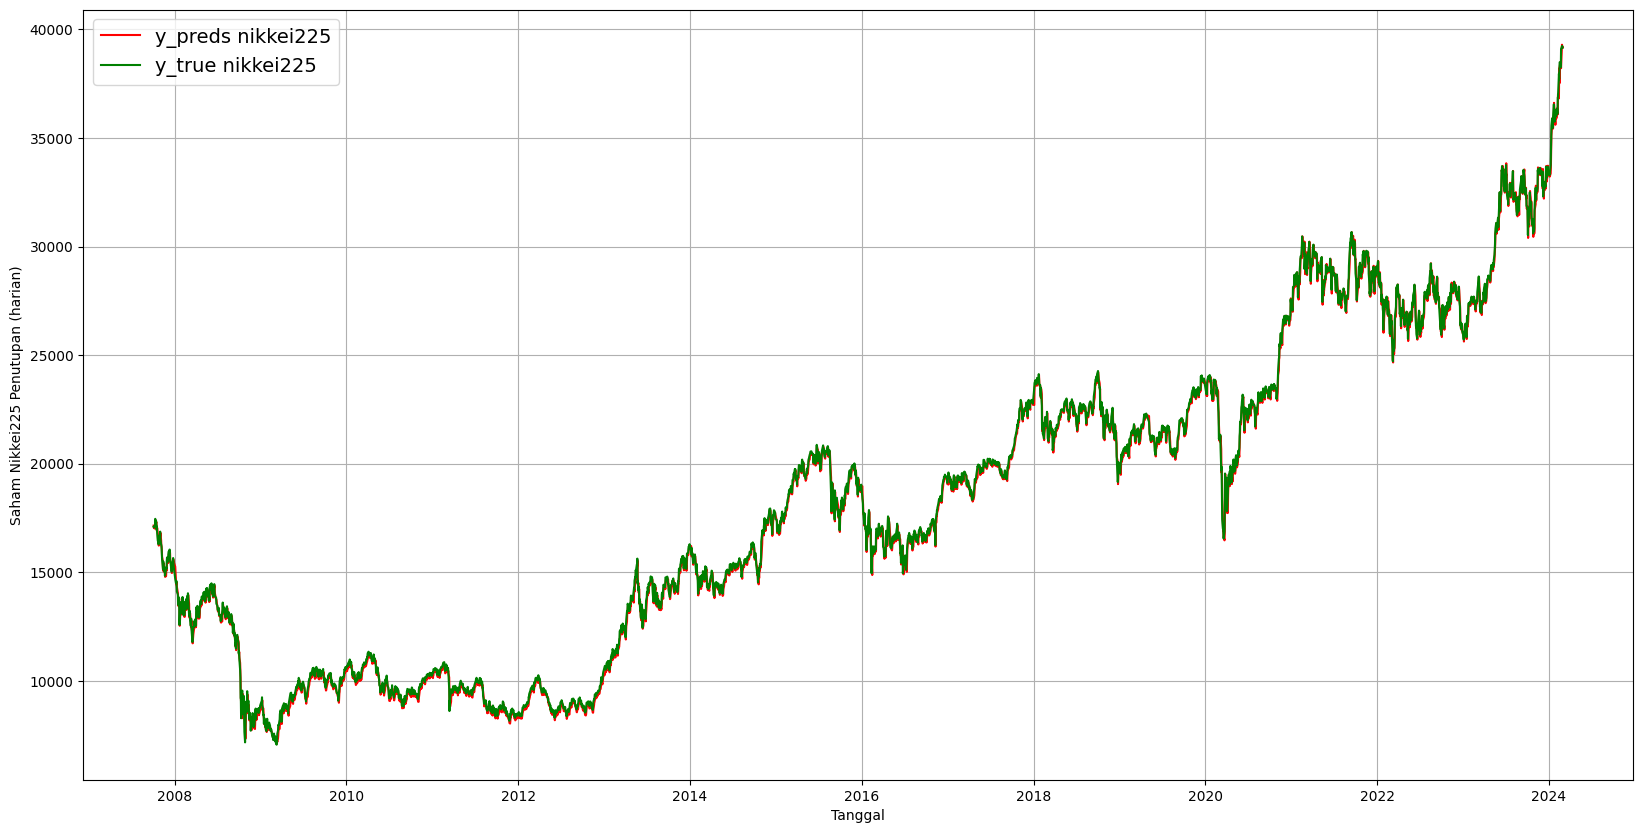

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_2_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_2_plot_prediksi_LSTM_multi.png')

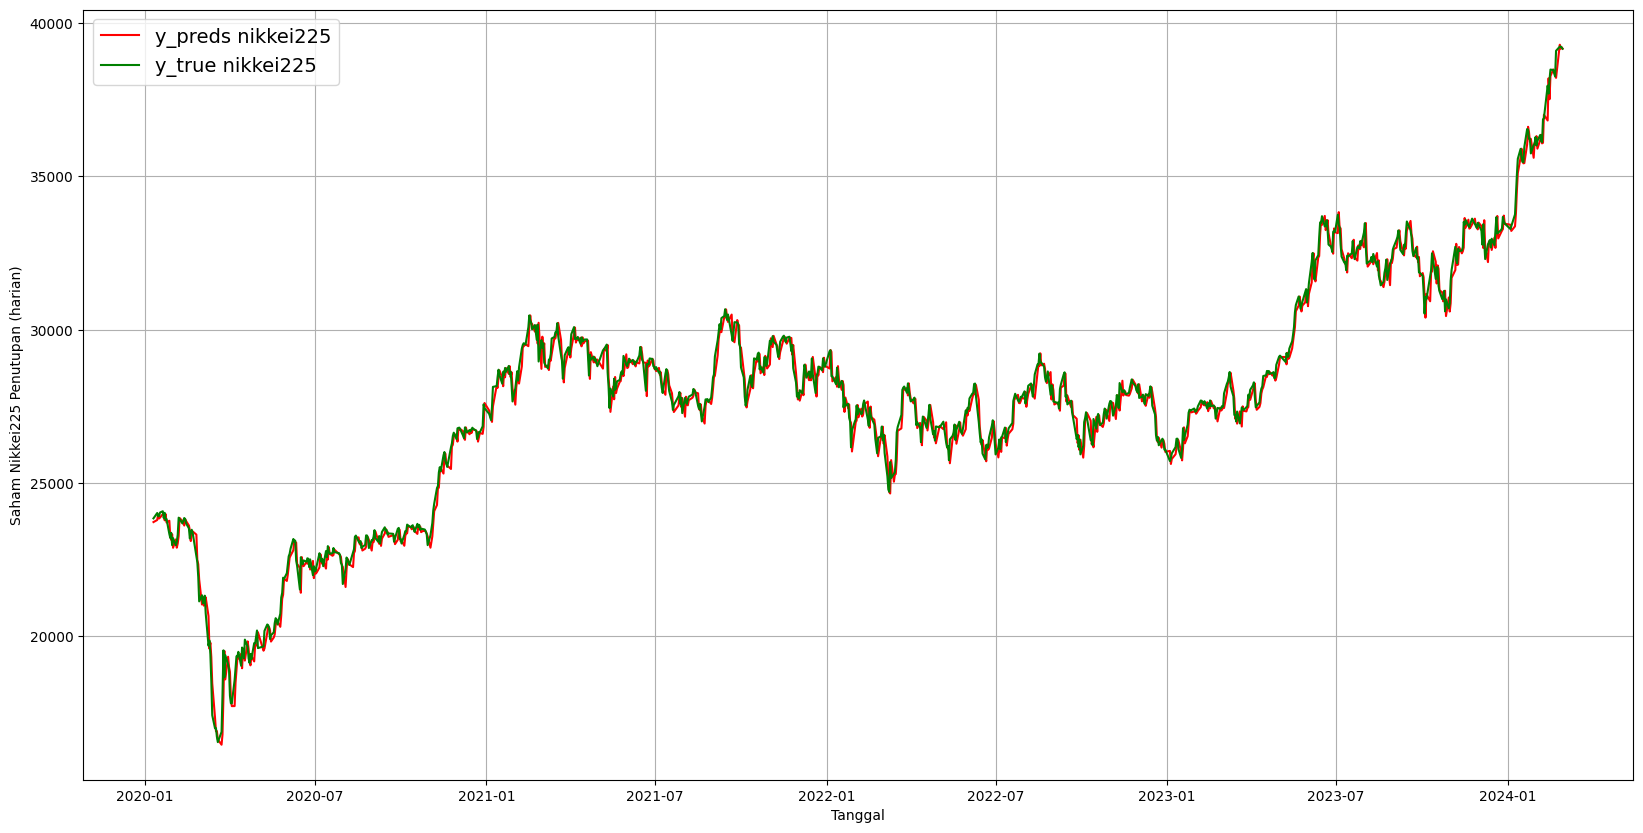

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_2_preds[:,0], format = "-", start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", start = 3000, label = "y_true nikkei225", color = 'g')


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_2_plot_prediksi_LSTM_multi_zoomin.png')

simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_2, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_2_LSTM_multivariate.h5")

<ipython-input-126-26e2a0ee8378>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_2, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window14/8020_saved_models/model_2_LSTM_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_2 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_2_LSTM_multivariate.h5")

# Model 3 : Stacked LSTM

In [ ]:
train_windows.shape[2]

2

## Tuner Builder

In [ ]:
# model stacked LSTM dengan hyperparameter tuning

def model_stacked_LSTM_multi_builder(hp):
  tf.random.set_seed(42)

  model_3 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units =  hp.Int('lstm_n_units_1', min_value=32, max_value=256, step=32),
                               input_shape=(train_windows.shape[1], train_windows.shape[2]),
                               return_sequences = True,
                               activation = "relu"),

          #tf.keras.layers.Dropout(0.2, seed=42),
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units_2', min_value=32, max_value=256, step=32),
                               return_sequences = False,
                               activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(test_labels.shape[1])
          ], name = "model_3_stackedLSTM_multivariate")



  #compile model 3
  model_3.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_3

In [ ]:
import keras_tuner as kt

tuner_stackedLSTM_multi = kt.Hyperband(model_stacked_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs',
                     project_name='stackedLSTM_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs/stackedLSTM_multivariate/tuner0.json


## Proses tuning


In [ ]:
tuner_stackedLSTM_multi.search(train_windows,
                               train_labels,
                               epochs=10,
                               validation_data=(test_windows, test_labels),
                               batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_stackedLSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units_1', "lstm_n_units_2", 'learning_rate']
print('Best tune model stacked LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model stacked LSTM multivariate:
lstm_n_units_1: 160
lstm_n_units_2: 32
learning_rate: 0.0001


## Hasil semua parameter tuning

In [ ]:
tuning = ['lstm_n_units_1', "lstm_n_units_2", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all=tuner_stackedLSTM_multi.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam = pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_best_hyperparameter_models/hp_Stacked_LSTM_multi.csv')
df_hyparam




lstm_n_units_1  lstm_n_units_2  learning_rate
0              160              32         0.0001
1              128              32         0.0001
2              128             256         0.0100
3              256             256         0.0001
4              160              32         0.0001
5              128              32         0.0010
6              128             128         0.0010
7              224              32         0.0100
8              128             256         0.0100
9              256             256         0.0001
10             128             128         0.0010
11             128             128         0.0010
12              64             192         0.0001
13              64             160         0.0010
14             256              96         0.0010
15              64             160         0.0010
16              96             256         0.0010
17             256             256         0.0001
18              96             256         0.0010
19             160             224         0.0010
20              64             160         0.0100
21             224              96         0.0001
22             224             192         0.0100
23              64             256         0.0010
24              32             160         0.0010
25             192             192         0.0100
26             256             192         0.0100
27             192             160         0.0100
28              64              32         0.0100
29             128              32         0.0100

In [ ]:
tuner_stackedLSTM_multi.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs/stackedLSTM_multivariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0024 summary
Hyperparameters:
lstm_n_units_1: 160
lstm_n_units_2: 32
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0020
Score: 0.007550128735601902

Trial 0029 summary
Hyperparameters:
lstm_n_units_1: 128
lstm_n_units_2: 32
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.007738672196865082

Trial 0025 summary
Hyperparameters:
lstm_n_units_1: 128
lstm_n_units_2: 256
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0018
Score: 0.007764304522424936

Trial 0016 summary
Hyperparameters:
lstm_n_units_1: 256
lstm_n_units_2: 256
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tune

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_3 = tuner_stackedLSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_3 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_3_stackedLSTM_multivariate.h5")



In [ ]:

# fit
history = model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

Epoch 1/50
126/126 [==============================] - ETA: 0s - loss: 0.0634
Epoch 1: val_loss improved from inf to 0.03790, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window14/8020_model_best_epoch/model_3_stackedLSTM_multivariate
126/126 [==============================] - 11s 68ms/step - loss: 0.0634 - val_loss: 0.0379
Epoch 2/50
125/126 [============================>.] - ETA: 0s - loss: 0.0186
Epoch 2: val_loss improved from 0.03790 to 0.01859, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window14/8020_model_best_epoch/model_3_stackedLSTM_multivariate
126/126 [==============================] - 7s 59ms/step - loss: 0.0186 - val_loss: 0.0186
Epoch 3/50
126/126 [==============================] - ETA: 0s - loss: 0.0173
Epoch 3: val_loss improved from 0.01859 to 0.01110, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window14/8020_model_best_epoch/model_3_stackedLSTM_multivariate
126/126 [=======

visualisasi model shape

In [ ]:
model_3.summary()

Model: "model_3_stackedLSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 21, 160)           104320    
                                                                 
 lstm_3 (LSTM)               (None, 32)                24704     
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 129090 (504.26 KB)
Trainable params: 129090 (504.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


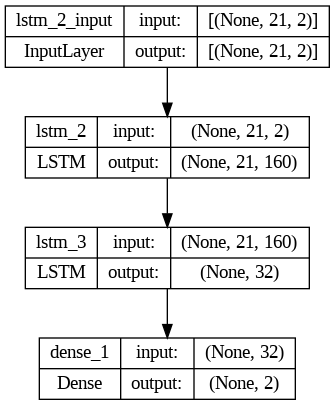

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model_3, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_plot/model_stackedLSTM_multi_shape.png', show_shapes=True, show_layer_names=True)



visualisasi loss setiap epoch

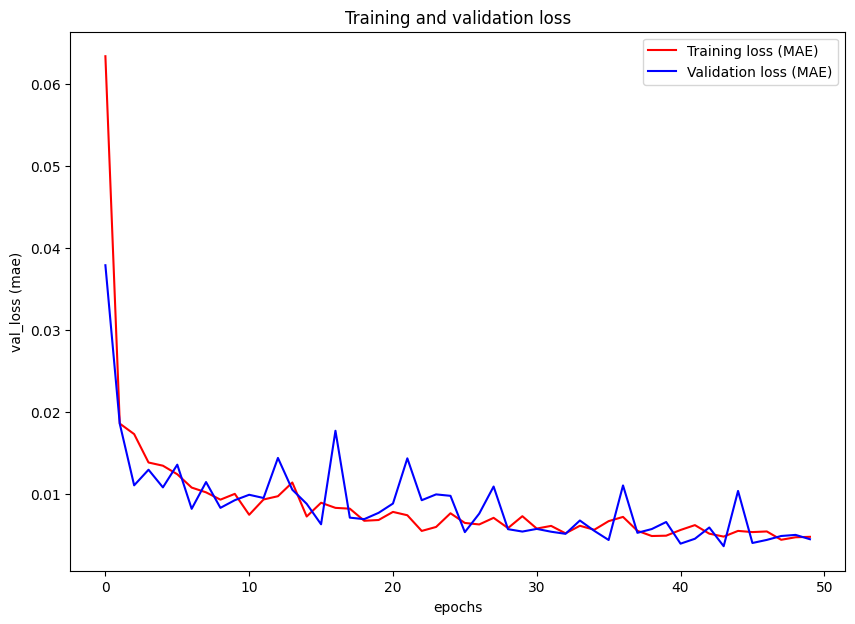

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.title ('Training and validation loss')
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_visualization/loss_stackedLSTM_multi.png')



# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_value_per_epoch/loss_stackedLSTM_multi.csv', index=False)


In [ ]:
# mengevaluasi model 3 dari epochs terakhir
model_3.evaluate(test_windows, test_labels)

126/126 [==============================] - 2s 15ms/step - loss: 0.0065


0.006496648769825697

In [ ]:
# mengevaluasi dan load model 3 pada best epoch yang loss mae paling kecil sepanjang training

model_3 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_3_stackedLSTM_multivariate")
model_3.evaluate(test_windows, test_labels)


126/126 [==============================] - 2s 15ms/step - loss: 0.0065


0.006496648769825697

In [ ]:
# membuat predicted value berdasarkan model multivariate model_3 yang sudah di train

model_3_preds = tf.squeeze(model_3.predict(test_windows))
model_3_preds



126/126 [==============================] - 2s 16ms/step


<tf.Tensor: shape=(4012, 2), dtype=float32, numpy=
array([[0.41894594, 0.07206949],
       [0.42096472, 0.07210074],
       [0.42289394, 0.07215384],
       ...,
       [0.965294  , 0.04476558],
       [0.9701139 , 0.04525618],
       [0.9750507 , 0.04564811]], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_3_preds = scaler_multivariate.inverse_transform(model_3_preds)
denormalized_test_labels = scaler_multivariate.inverse_transform(test_labels)

In [ ]:
# mengukur predicted value kedua time series dengan metrik evaluasi regresion problem

model_3_results = evaluate_preds(y_true = denormalized_test_labels,
                                 y_pred = denormalized_model_3_preds)

model_3_results

{'mae': 202.58911,
 'mse': 161828.67,
 'rmse': 286.48767,
 'R-square': 0.936220741316053}

In [ ]:
tf.squeeze(test_labels[:,0])

<tf.Tensor: shape=(4012,), dtype=float64, numpy=
array([0.43436489, 0.43366381, 0.43608654, ..., 1.        , 0.99919575,
       0.99812715])>

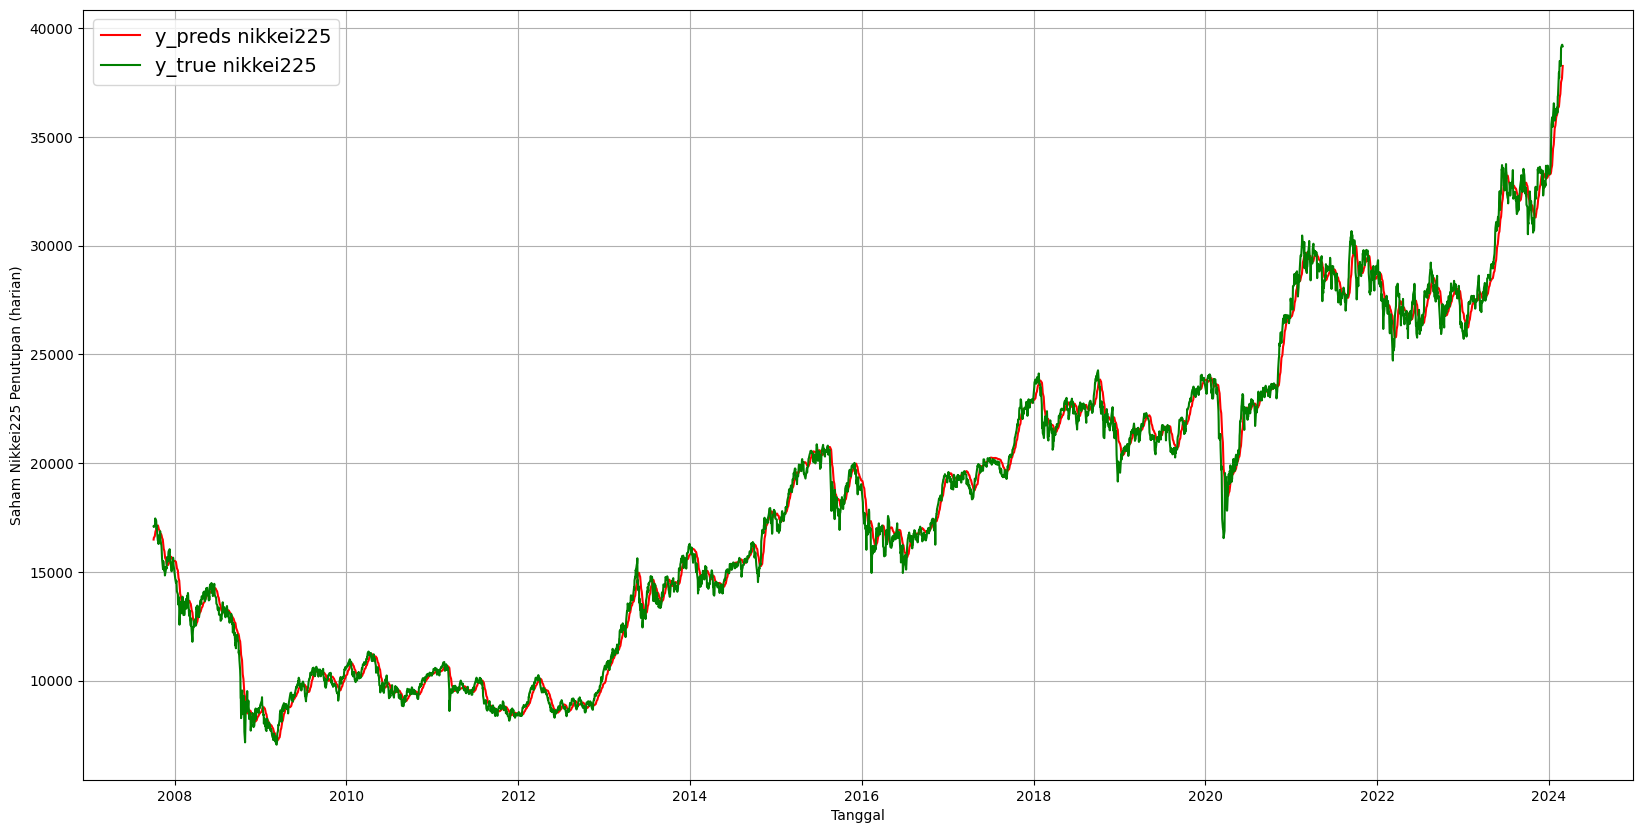

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_3_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_3_plot_prediksi_stackedLSTM_multi.png')



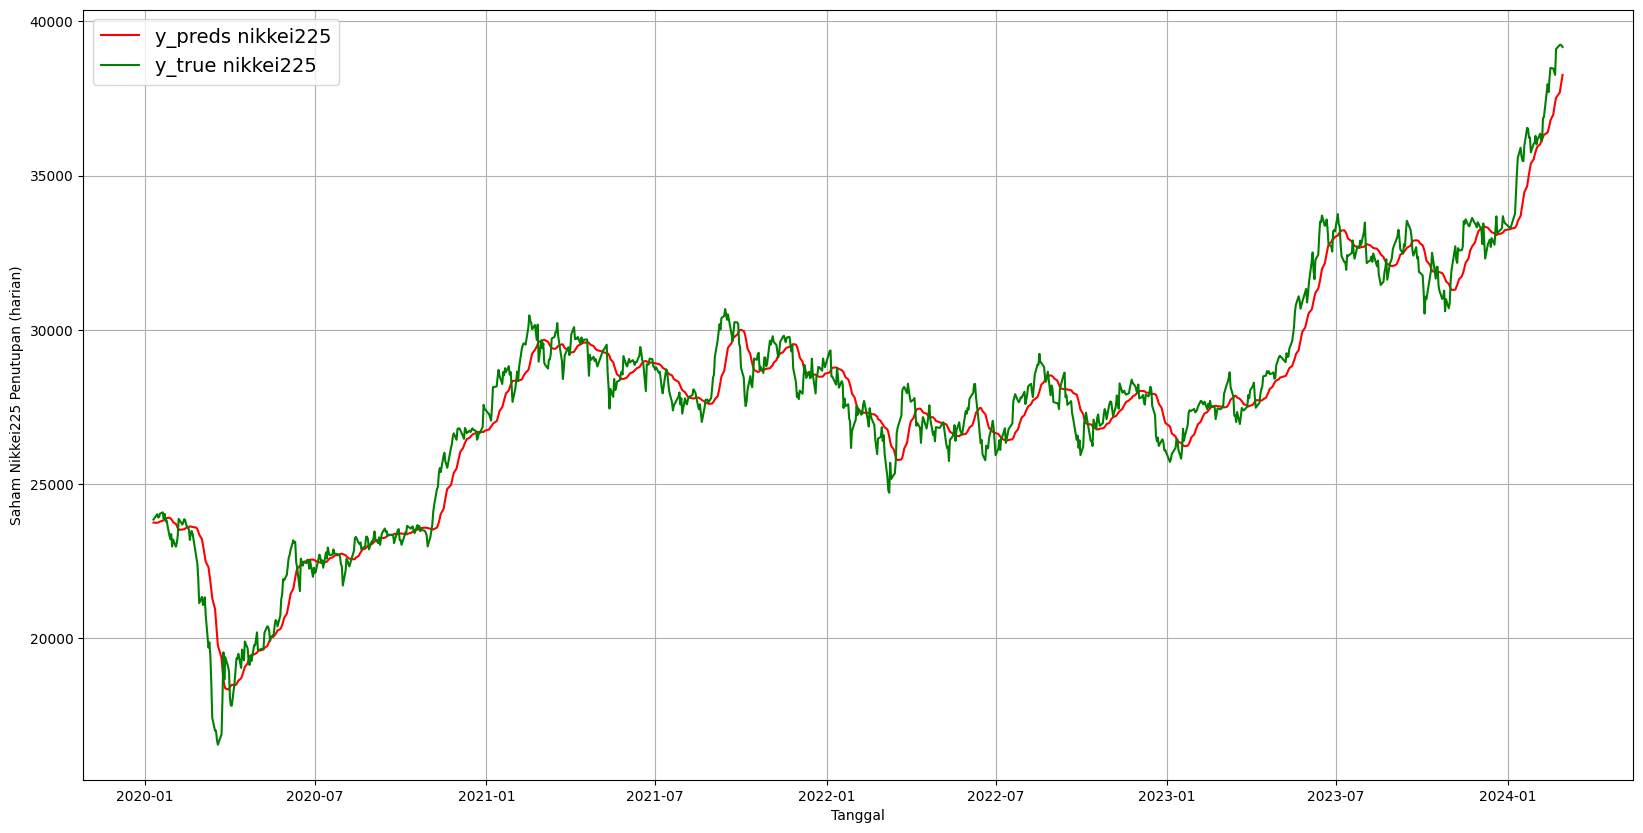

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_3_preds[:,0], format = "-", start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", start = 3000, label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_3_plot_prediksi_stackedLSTM_multi_zoomin.png')



simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model


# Save the model to disk as a .h5 file
save_model(model_3, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_3_stackedLSTM_multivariate.h5")

<ipython-input-141-6a132312bcc3>:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_3, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_3_stackedLSTM_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_3 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_3_stackedLSTM_multivariate.h5")



# Model 4 : Bidirectional LSTM

In [ ]:
train_windows.shape[2]

2

## Tuner Builder

In [ ]:
def model_bidirectional_LSTM_multi_builder(hp):
  tf.random.set_seed(42)

  model_4 = tf.keras.models.Sequential([
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = hp.Int('bi_lstm_n_units', min_value=32, max_value=256, step=32),
                                                            input_shape=(train_windows.shape[1], train_windows.shape[2]),
                                                            return_sequences = False,
                                                            activation = "relu")),
          #tf.keras.layers.Dropout(0.2, seed=42),
          #tf.keras.layers.LSTM(128, return_sequences = False, activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(test_labels.shape[1])
          ], name = "model_4_bidirectionalLSTM_multivariate")



  #compile model 4
  model_4.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_4

In [ ]:
import keras_tuner as kt

tuner_bi_LSTM_multi = kt.Hyperband(model_bidirectional_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs',
                     project_name='bi_LSTM_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs/bi_LSTM_multivariate/tuner0.json


## Proses tuning


In [ ]:
tuner_bi_LSTM_multi.search(train_windows,
                           train_labels,
                           epochs=10,
                           validation_data=(test_windows, test_labels),
                           batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
tuner_bi_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_bi_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ["bi_lstm_n_units", 'learning_rate']
print('Best tune model bidirectional LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model bidirectional LSTM multivariate:
bi_lstm_n_units: 128
learning_rate: 0.01


## Hasil semua parameter tuning

In [ ]:
tuning = ["bi_lstm_n_units", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all=tuner_bi_LSTM_multi.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam = pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_best_hyperparameter_models/hp_bi_LSTM_multi.csv')

df_hyparam


bi_lstm_n_units  learning_rate
0               128         0.0100
1                32         0.0010
2               224         0.0001
3                96         0.0010
4               192         0.0100
5               256         0.0001
6               192         0.0001
7               192         0.0010
8               192         0.0010
9               224         0.0010
10              128         0.0100
11               96         0.0010
12              224         0.0001
13              128         0.0010
14              256         0.0010
15              224         0.0010
16               96         0.0010
17              224         0.0001
18              128         0.0010
19              160         0.0100
20               96         0.0100
21              256         0.0100
22              224         0.0100
23              160         0.0010
24               32         0.0100
25               64         0.0100
26               64         0.0010
27              160         0.0001
28              128         0.0001
29               32         0.0001

In [ ]:
tuner_bi_LSTM_multi.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs/bi_LSTM_multivariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0025 summary
Hyperparameters:
bi_lstm_n_units: 128
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0020
Score: 0.0061125680804252625

Trial 0026 summary
Hyperparameters:
bi_lstm_n_units: 32
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.006321375258266926

Trial 0017 summary
Hyperparameters:
bi_lstm_n_units: 224
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.006527879275381565

Trial 0016 summary
Hyperparameters:
bi_lstm_n_units: 96
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.006744840648025274

Trial 0028 summary
H

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_4 = tuner_bi_LSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_4 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_4_bidirectionalLSTM_multivariate.h5")

In [ ]:

# fit
history = model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

Epoch 1/50
125/126 [============================>.] - ETA: 0s - loss: 0.0348
Epoch 1: val_loss improved from inf to 0.01491, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window14/8020_model_best_epoch/model_4_bidirectionalLSTM_multivariate
126/126 [==============================] - 22s 140ms/step - loss: 0.0348 - val_loss: 0.0149
Epoch 2/50
125/126 [============================>.] - ETA: 0s - loss: 0.0127
Epoch 2: val_loss improved from 0.01491 to 0.01045, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window14/8020_model_best_epoch/model_4_bidirectionalLSTM_multivariate
126/126 [==============================] - 17s 134ms/step - loss: 0.0127 - val_loss: 0.0105
Epoch 3/50
125/126 [============================>.] - ETA: 0s - loss: 0.0129
Epoch 3: val_loss did not improve from 0.01045
126/126 [==============================] - 12s 93ms/step - loss: 0.0129 - val_loss: 0.0106
Epoch 4/50
125/126 [============================>.] - E

visualisasi model shape

In [ ]:
model_4.summary()

Model: "model_4_bidirectionalLSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 256)               134144    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 134658 (526.01 KB)
Trainable params: 134658 (526.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


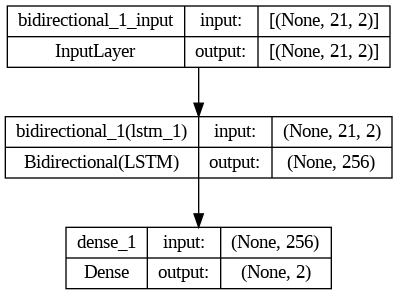

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model_4, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_plot/model_biLSTM_multi_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

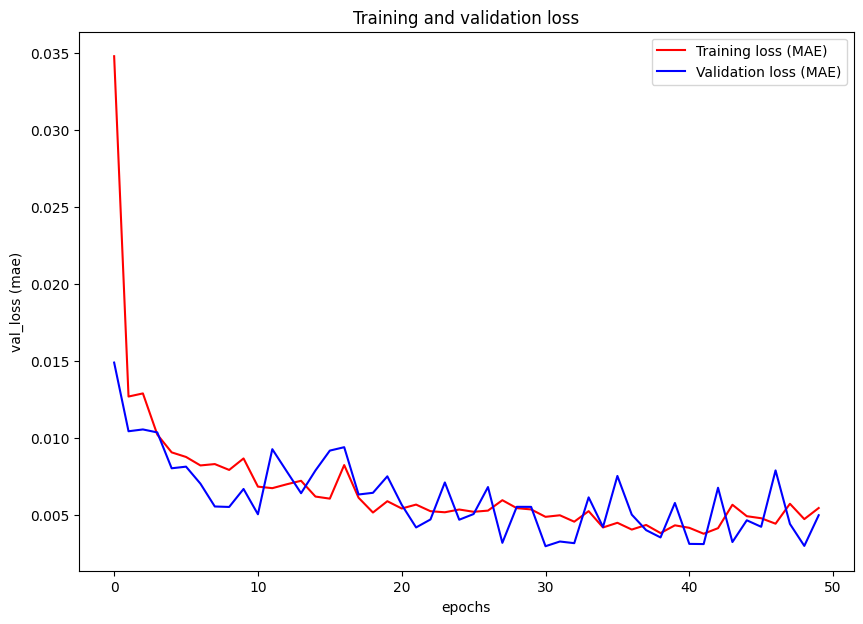

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.title ('Training and validation loss')
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_visualization/loss_bidirectional_LSTM_multi.png')


# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_value_per_epoch/loss_bidirectional_LSTM_multi.csv', index=False)


In [ ]:
# mengevaluasi model 4 dari epochs terakhir
model_4.evaluate(test_windows, test_labels)

126/126 [==============================] - 2s 15ms/step - loss: 0.0026


0.002619421575218439

In [ ]:
# mengevaluasi dan load model 4 pada best epoch yang loss mae paling kecil sepanjang training

model_4 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_4_bidirectionalLSTM_multivariate")
model_4.evaluate(test_windows, test_labels)


126/126 [==============================] - 2s 15ms/step - loss: 0.0026


0.002619421575218439

In [ ]:
# membuat predicted value berdasarkan model multivariate model_4 yang sudah di train

model_4_preds = tf.squeeze(model_4.predict(test_windows))
model_4_preds



126/126 [==============================] - 3s 16ms/step


<tf.Tensor: shape=(4012, 2), dtype=float32, numpy=
array([[0.4352631 , 0.07167308],
       [0.4327895 , 0.07164548],
       [0.43222266, 0.07161604],
       ...,
       [0.99894893, 0.02613989],
       [1.0018644 , 0.02607463],
       [1.000025  , 0.02588423]], dtype=float32)>

In [ ]:
model_4_preds[:,0]

<tf.Tensor: shape=(4012,), dtype=float32, numpy=
array([0.4352631 , 0.4327895 , 0.43222266, ..., 0.99894893, 1.0018644 ,
       1.000025  ], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_4_preds = scaler_multivariate.inverse_transform(model_4_preds)
denormalized_test_labels = scaler_multivariate.inverse_transform(test_labels)

In [ ]:
# mengukur predicted value kedua time series dengan metrik evaluasi regresion problem

model_4_results = evaluate_preds(y_true = denormalized_test_labels,
                                 y_pred = denormalized_model_4_preds)

model_4_results

{'mae': 90.82004,
 'mse': 32041.137,
 'rmse': 128.43515,
 'R-square': 0.9958740480760842}

In [ ]:
tf.squeeze(test_labels[:,0])

<tf.Tensor: shape=(4012,), dtype=float64, numpy=
array([0.43436489, 0.43366381, 0.43608654, ..., 1.        , 0.99919575,
       0.99812715])>

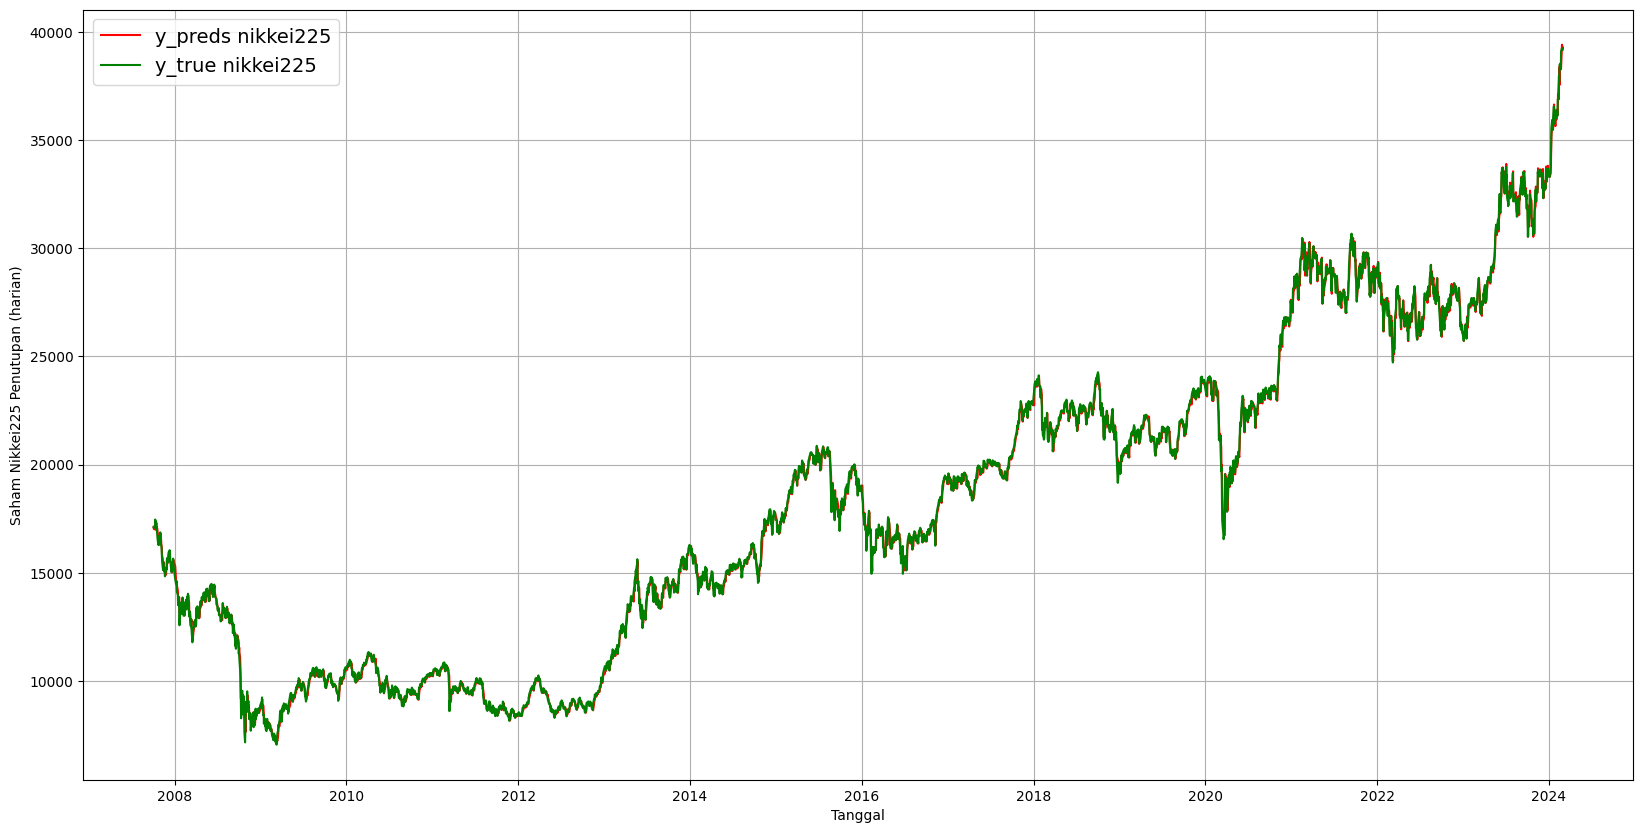

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_4_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_4_plot_prediksi_biLSTM_multi.png')


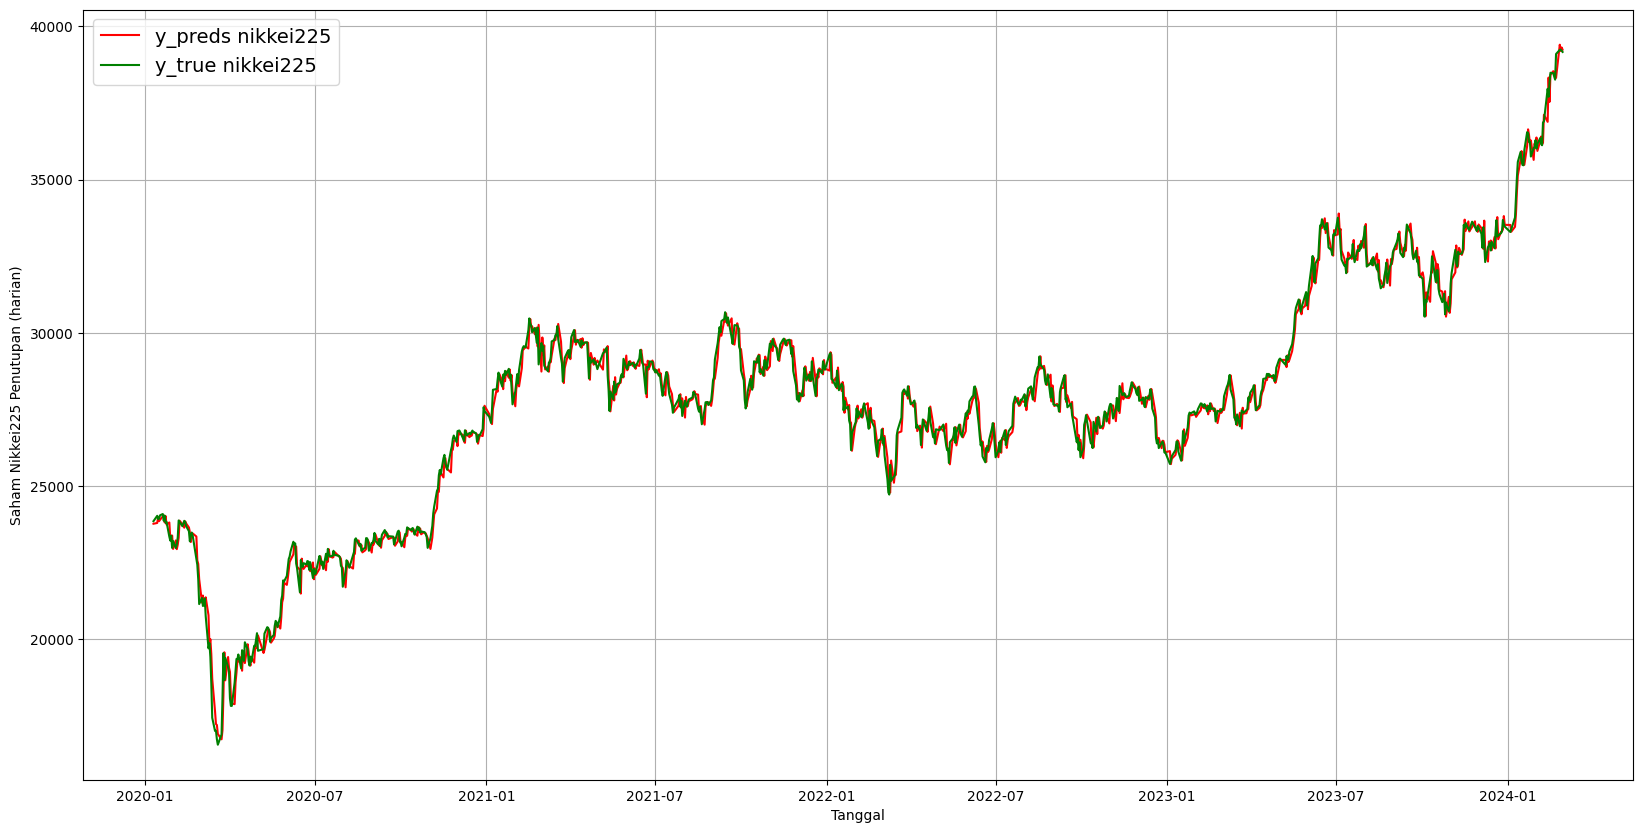

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_4_preds[:,0], format = "-", start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", start = 3000, label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_4_plot_prediksi_biLSTM_multi_zoomin.png')


simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model


# Save the model to disk as a .h5 file
save_model(model_4, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_4_bidirectionalLSTM_multivariate.h5")

<ipython-input-127-656e3d851aa0>:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_4, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window14/8020_saved_models/model_4_bidirectionalLSTM_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_4 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_4_bidirectionalLSTM_multivariate.h5")

# Model 5 : CNN-LSTM

## Tuner Builder

In [ ]:
def model_CNN_LSTM_multi_builder(hp):
  tf.random.set_seed(42)

  model_5 = tf.keras.models.Sequential([
    # YOUR CODE HERE.
    tf.keras.layers.Conv1D(filters=hp.Int('Conv1D_n_filters', min_value=32, max_value=256, step=32),
                          kernel_size=hp.Int('Conv1D_kernel_size', min_value=5, max_value=10, step=1),
                          strides=1,
                          padding="causal",
                          activation="relu",
                          input_shape=[train_windows.shape[1], train_windows.shape[2]]),

    tf.keras.layers.LSTM(units = hp.Int('LSTM_n_units', min_value=32, max_value=256, step=32),
                        return_sequences=False),

    tf.keras.layers.Dense(test_labels.shape[1]),
    ], name = "model_5_CNN-LSTM_multivariate")


  #compile model 5
  model_5.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_5

In [ ]:
import keras_tuner as kt

tuner_CNN_LSTM_multi = kt.Hyperband(model_CNN_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs',
                     project_name='CNN_LSTM_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs/CNN_LSTM_multivariate/tuner0.json


## Proses tuning


In [ ]:
tuner_CNN_LSTM_multi.search(train_windows,
                            train_labels,
                            epochs=10,
                            validation_data=(test_windows, test_labels),
                            batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_CNN_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['Conv1D_n_filters', 'Conv1D_kernel_size', "LSTM_n_units", 'learning_rate']
print('Best tune model CNN LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model CNN LSTM multivariate:
Conv1D_n_filters: 32
Conv1D_kernel_size: 7
LSTM_n_units: 192
learning_rate: 0.001


## Hasil semua parameter tuning

In [ ]:
tuning = ['Conv1D_n_filters', 'Conv1D_kernel_size', "LSTM_n_units", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all=tuner_CNN_LSTM_multi.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam= pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_best_hyperparameter_models/hp_CNN_LSTM_multi.csv')
df_hyparam


Conv1D_n_filters  Conv1D_kernel_size  LSTM_n_units  learning_rate
0                 32                   7           192         0.0010
1                128                   9           192         0.0001
2                 32                   7           192         0.0010
3                 96                   6           160         0.0010
4                192                   9           160         0.0001
5                160                  10            32         0.0001
6                128                   6           128         0.0010
7                 64                   9            64         0.0010
8                 64                   6           224         0.0100
9                128                   9           192         0.0001
10               128                   9           192         0.0001
11                96                   8            64         0.0100
12               128                   6           128         0.0010
13               224                   9           192         0.0010
14                64                   9            64         0.0010
15               160                   8           128         0.0001
16                32                   8            64         0.0100
17                32                   7           192         0.0010
18               224                  10           192         0.0001
19               224                   9           192         0.0010
20                32                   9           128         0.0100
21               256                  10           192         0.0100
22               160                   6            32         0.0001
23                64                   6           224         0.0100
24                32                   9           160         0.0100
25                96                   8           128         0.0010
26               192                  10            64         0.0100
27               224                   5           256         0.0010
28                64                  10           256         0.0100
29                96                   6           256         0.0100

In [ ]:
tuner_CNN_LSTM_multi.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs/CNN_LSTM_multivariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0003 summary
Hyperparameters:
Conv1D_n_filters: 32
Conv1D_kernel_size: 7
LSTM_n_units: 192
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.0055906749330461025

Trial 0016 summary
Hyperparameters:
Conv1D_n_filters: 128
Conv1D_kernel_size: 9
LSTM_n_units: 192
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.005667112302035093

Trial 0017 summary
Hyperparameters:
Conv1D_n_filters: 32
Conv1D_kernel_size: 7
LSTM_n_units: 192
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.0057703168131411076

Trial 0026 summary
Hyperparameters:
Conv1D_n_filters: 96
Conv1D_kernel_size: 6
LSTM_n_units: 16

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_5 = tuner_CNN_LSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_5 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_5_CNN-LSTM_multivariate.h5")


In [ ]:

# fit
history = model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/50
126/126 [==============================] - ETA: 0s - loss: 0.0258
Epoch 1: val_loss improved from inf to 0.00751, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window14/8020_model_best_epoch/model_5_CNN-LSTM_multivariate
126/126 [==============================] - 26s 189ms/step - loss: 0.0258 - val_loss: 0.0075
Epoch 2/50
126/126 [==============================] - ETA: 0s - loss: 0.0125
Epoch 2: val_loss did not improve from 0.00751
126/126 [==============================] - 17s 137ms/step - loss: 0.0125 - val_loss: 0.0096
Epoch 3/50
126/126 [==============================] - ETA: 0s - loss: 0.0106
Epoch 3: val_loss did not improve from 0.00751
126/126 [==============================] - 17s 134ms/step - loss: 0.0106 - val_loss: 0.0098
Epoch 4/50
126/126 [==============================] - ETA: 0s - loss: 0.0091
Epoch 4: val_loss improved from 0.00751 to 0.00661, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window14/

visualisasi model shape

In [ ]:
model_5.summary()

Model: "model_5_CNN-LSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 21, 32)            480       
                                                                 
 lstm_1 (LSTM)               (None, 192)               172800    
                                                                 
 dense_1 (Dense)             (None, 2)                 386       
                                                                 
Total params: 173666 (678.38 KB)
Trainable params: 173666 (678.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


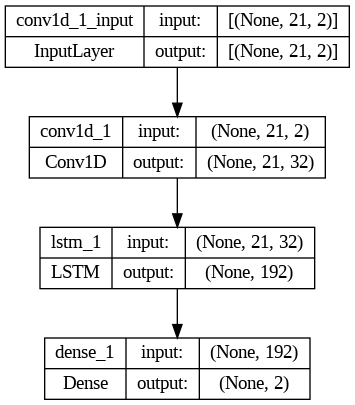

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_5, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_plot/model_CNN-LSTM_multi_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

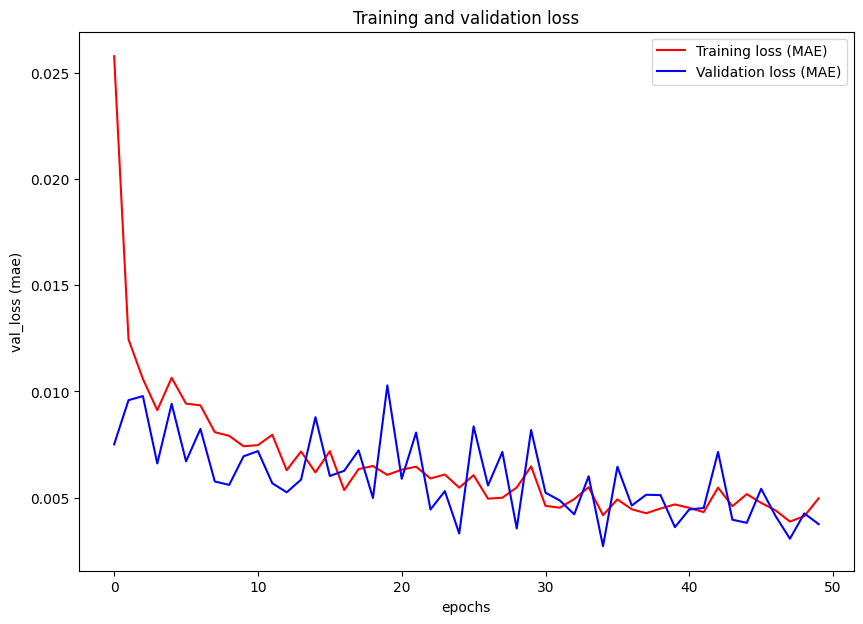

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)



# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_visualization/loss_CNN-LSTM_multi.png')



# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_value_per_epoch/loss_CNN-LSTM_multi.csv', index=False)


In [ ]:
# mengevaluasi model 5 dari epochs terakhir
model_5.evaluate(test_windows, test_labels)

126/126 [==============================] - 2s 14ms/step - loss: 0.0031


0.003093212377279997

In [ ]:
# mengevaluasi dan load model 5 pada best epoch yang loss mae paling kecil sepanjang training

model_5 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_5_CNN-LSTM_multivariate")
model_5.evaluate(test_windows, test_labels)


126/126 [==============================] - 2s 14ms/step - loss: 0.0031


0.003093212377279997

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_5_preds = tf.squeeze(model_5.predict(test_windows))
model_5_preds



126/126 [==============================] - 2s 16ms/step


<tf.Tensor: shape=(4012, 2), dtype=float32, numpy=
array([[0.43601573, 0.07465518],
       [0.43332922, 0.07467707],
       [0.43185782, 0.07495014],
       ...,
       [0.9955062 , 0.02249313],
       [0.99892   , 0.02243227],
       [0.9939652 , 0.02288605]], dtype=float32)>

In [ ]:
model_5_preds[:,0]

<tf.Tensor: shape=(4012,), dtype=float32, numpy=
array([0.43601573, 0.43332922, 0.43185782, ..., 0.9955062 , 0.99892   ,
       0.9939652 ], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_5_preds = scaler_multivariate.inverse_transform(model_5_preds)
denormalized_test_labels = scaler_multivariate.inverse_transform(test_labels)

In [ ]:
# mengukur predicted value kedua time series dengan metrik evaluasi regresion problem

model_5_results = evaluate_preds(y_true = denormalized_test_labels,
                                 y_pred = denormalized_model_5_preds)

model_5_results

{'mae': 90.225334,
 'mse': 32028.38,
 'rmse': 127.58796,
 'R-square': 0.9866669254941917}

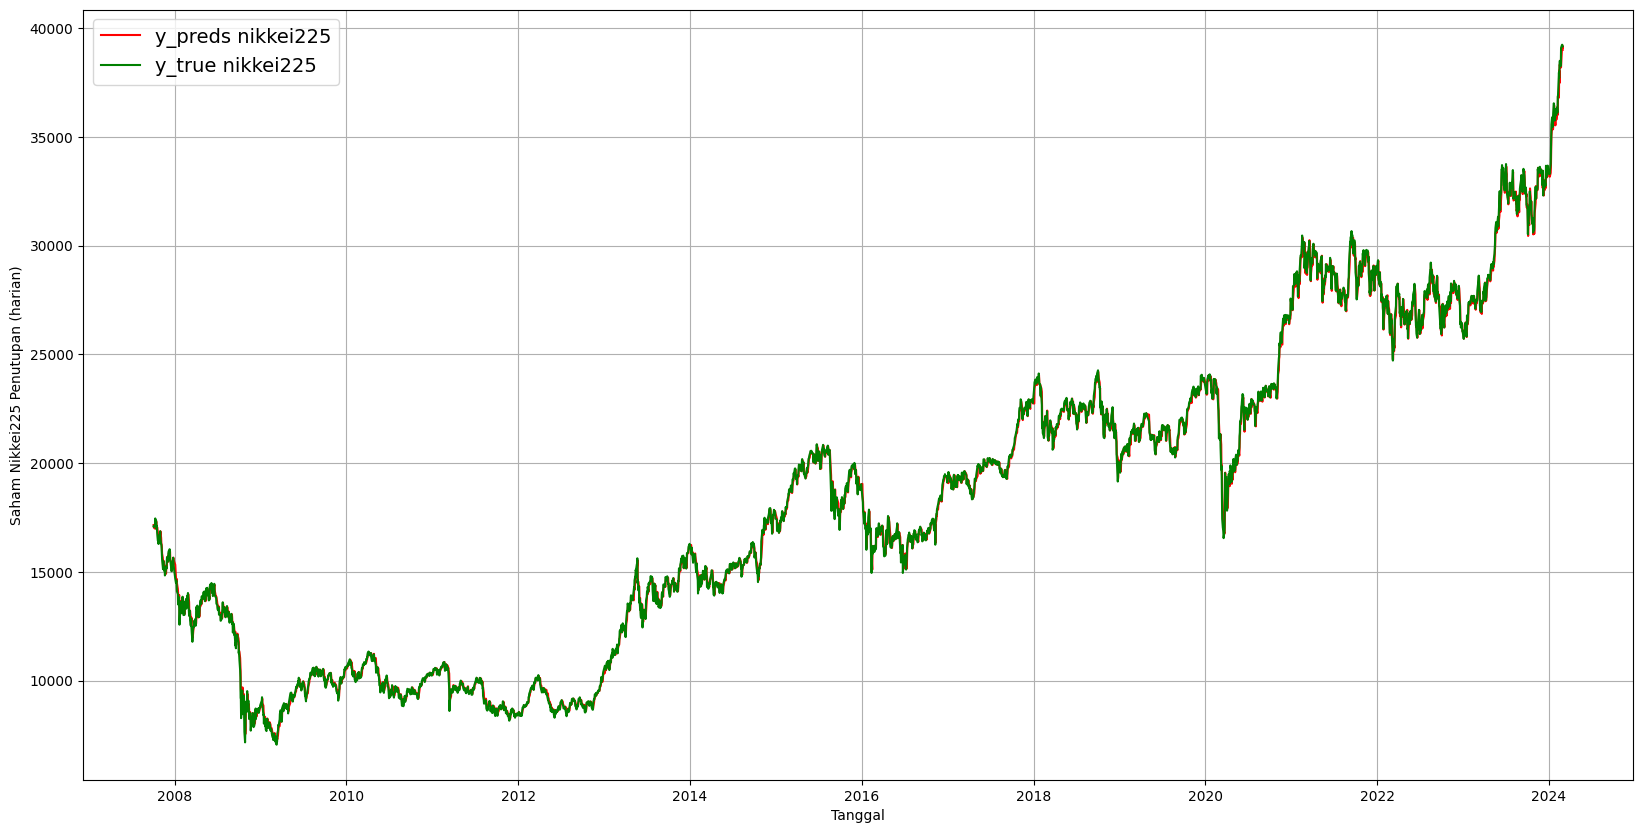

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_5_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_5_plot_prediksi_CNN-LSTM_multi.png')


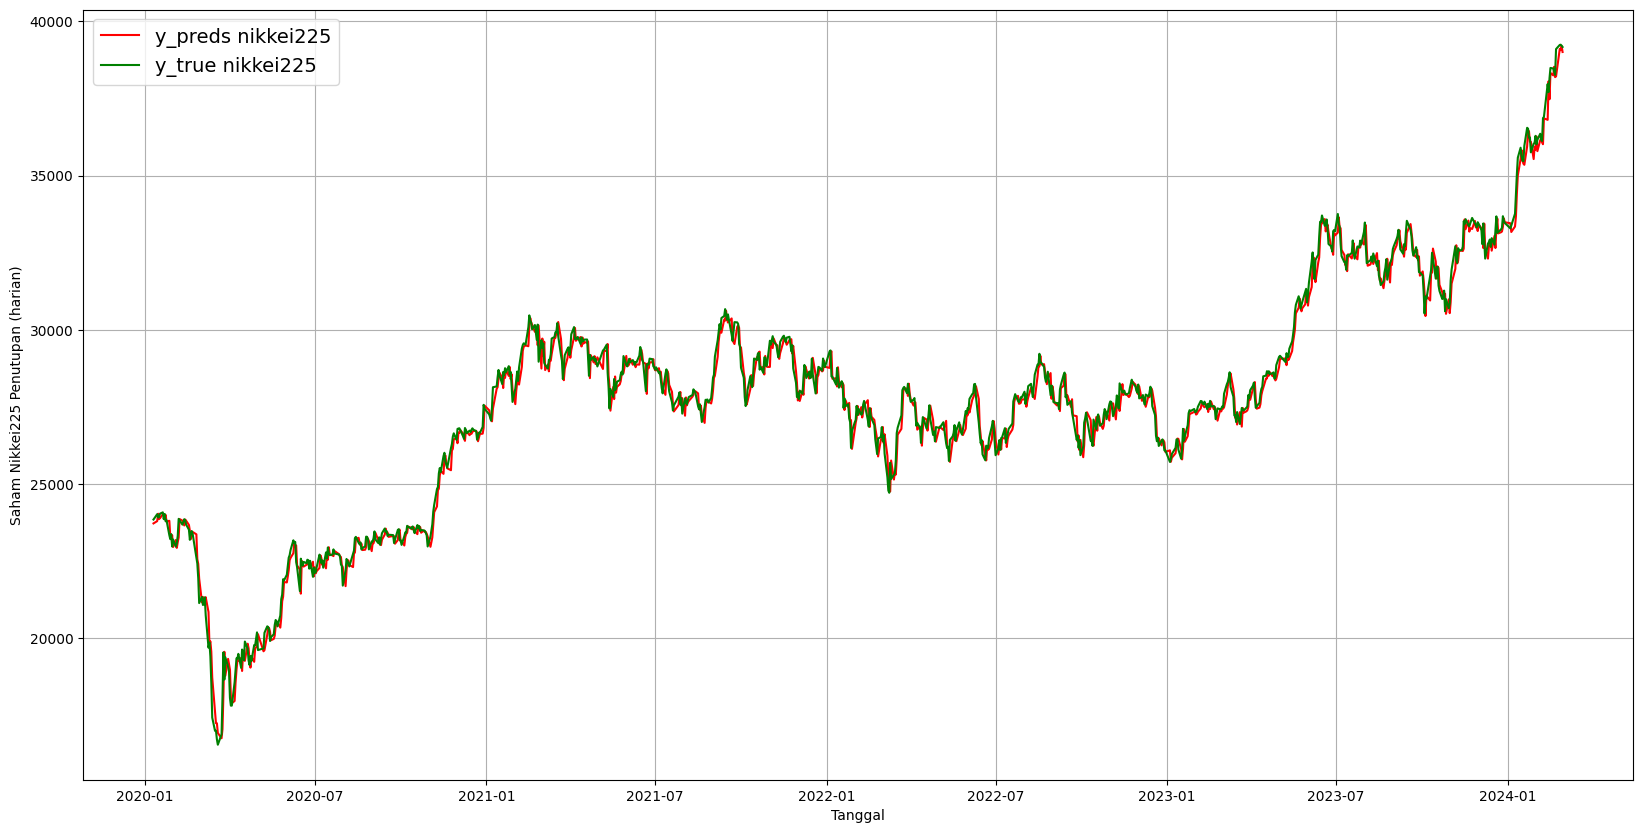

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_5_preds[:,0], format = "-", start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", start = 3000, label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_5_plot_prediksi_CNN-LSTM_multi_zoomin.png')


simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_5, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_5_CNN-LSTM_multivariate.h5")


<ipython-input-147-d8daec1558df>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_5, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window14/8020_saved_models/model_5_CNN-LSTM_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_5 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_5_CNN-LSTM_multivariate.h5")


# Membuat univariate time series forecasting stock price

In [ ]:
print(full_windows[:, 0]),
print(full_windows[:, 0].shape)
print("\n")
print(full_labels[:, 0])
print(full_labels[:, 0].shape)

[[5.95337367e-04 5.62921348e-01]
 [5.18206571e-04 5.62921348e-01]
 [4.44140575e-04 5.62921348e-01]
 ...
 [9.23302107e-01 2.24719101e-02]
 [9.10904992e-01 2.24719101e-02]
 [9.17950711e-01 2.24719101e-02]]
(20057, 2)


[2.44417786e-04 2.01510589e-04 1.86186590e-04 ... 1.00000000e+00
 9.99195745e-01 9.98127152e-01]
(20057,)


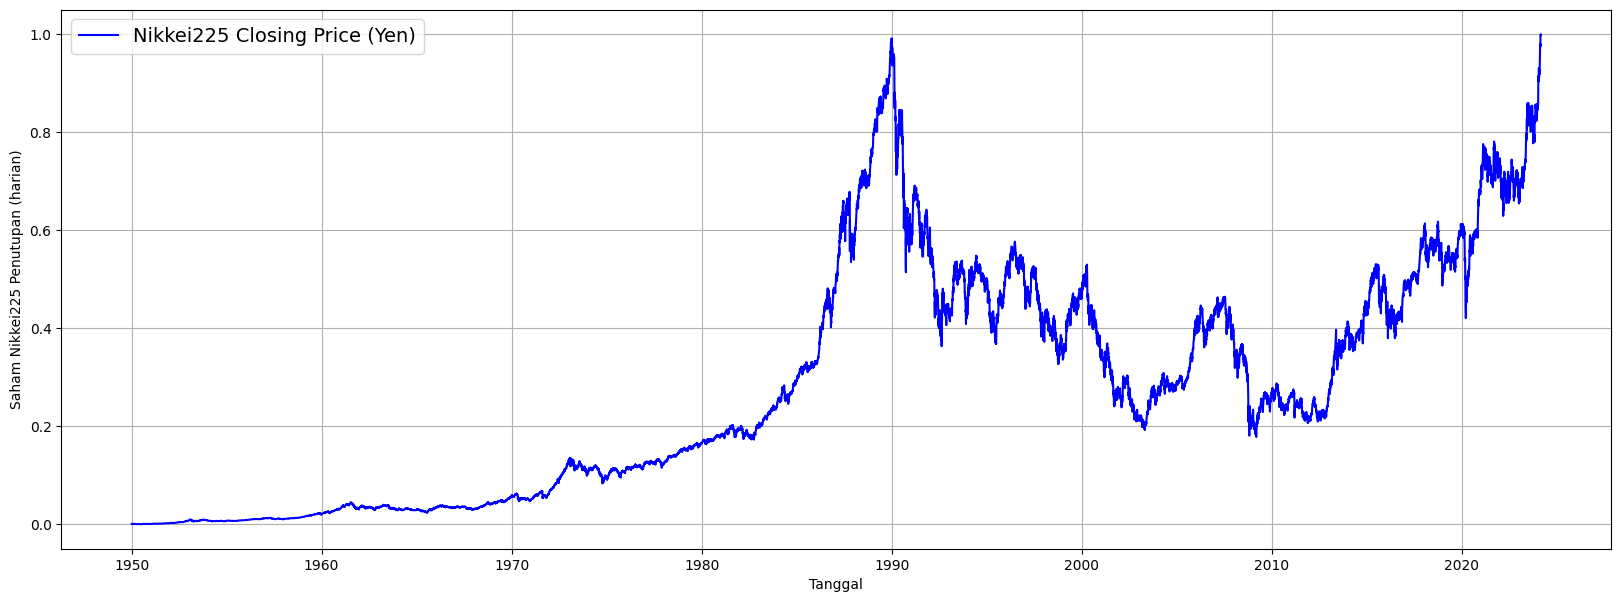

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,0], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')

memanggil variabel window dan label untuk univariate nikkei stock price

In [ ]:
X_nikkei.shape, y_nikkei.shape

((20057, 21, 1), (20057, 1, 1))

reshape dimensi X_nikkei dan y_nikkei dan masukkan ke variabel baru

In [ ]:
train_nikkeiWindows = np.squeeze(X_nikkei[:len(X_nikkei[: int(SPLIT_SIZE * len(X_nikkei))])])
test_nikkeiWindows = np.squeeze(X_nikkei[len(X_nikkei[: int(SPLIT_SIZE * len(X_nikkei))]):])

train_nikkeiLabels = np.squeeze(y_nikkei[:len(y_nikkei[: int(SPLIT_SIZE * len(y_nikkei))])])
test_nikkeiLabels = np.squeeze(y_nikkei[len(y_nikkei[: int(SPLIT_SIZE * len(y_nikkei))]):])

In [ ]:
train_nikkeiWindows.shape, test_nikkeiWindows.shape

((16045, 21), (4012, 21))

In [ ]:
train_nikkeiWindows.shape[1]

21

In [ ]:
train_nikkeiLabels.shape, test_nikkeiLabels.shape

((16045,), (4012,))

# Model 6: Conv1D Univariate

In [ ]:
train_nikkeiWindows.shape

(16045, 21)

## Tuner Builder

In [ ]:
#create Conv1D model
def model_Conv1D_uni_builder(hp):
  tf.random.set_seed(42)

  model_6 = tf.keras.models.Sequential([
      #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
      tf.keras.layers.Conv1D(filters = hp.Int('conv1D_n_filters', min_value=32, max_value=256, step=32),
                             kernel_size = hp.Int('conv1D_kernel_size', min_value=5, max_value=10, step=1),
                             strides = 1,
                             padding ="causal",
                             input_shape = (WINDOW_SIZE, 1)),
      tf.keras.layers.GlobalMaxPooling1D(),  # Add GlobalMaxPooling1D layer
      tf.keras.layers.Dense(1)

      #filters adalah jumlah hidden unit dalam layers tersebut
      # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
      # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
  ], name = "model_6_conv1D_univariate")

  #compile model 1
  model_6.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_6

In [ ]:
import keras_tuner as kt

tuner_Conv1D_uni = kt.Hyperband(model_Conv1D_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs',
                     project_name='Conv1D_univariate')



Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs/Conv1D_univariate/tuner0.json


## Proses tuning


In [ ]:
tuner_Conv1D_uni.search(train_nikkeiWindows,
                        train_nikkeiLabels,
                        epochs=10,
                        validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                        batch_size=128)

## Hasil parameter tuning terbaik

In [ ]:
tuner_Conv1D_uni.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_Conv1D_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
print('Best tune model Conv1D univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model Conv1D univariate:
conv1D_n_filters: 256
conv1D_kernel_size: 10
learning_rate: 0.01


## Hasil semua parameter tuning

In [ ]:
tuning =['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all = tuner_Conv1D_uni.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam= pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_best_hyperparameter_models/hp_Con1D_uni.csv')
df_hyparam



conv1D_n_filters  conv1D_kernel_size  learning_rate
0                256                  10         0.0100
1                160                   9         0.0010
2                224                   8         0.0010
3                192                   8         0.0010
4                 96                  10         0.0100
5                 32                   5         0.0100
6                 32                   6         0.0100
7                256                   8         0.0001
8                 96                  10         0.0100
9                 32                   5         0.0100
10               224                   6         0.0001
11               256                   8         0.0001
12               192                   7         0.0001
13               192                   8         0.0010
14                96                   5         0.0010
15               256                   8         0.0001
16                96                   5         0.0010
17               128                   8         0.0001
18               160                   9         0.0001
19               192                   8         0.0010
20                64                   5         0.0001
21               128                   8         0.0001
22                96                   6         0.0100
23               128                   8         0.0010
24               256                   5         0.0001
25               160                  10         0.0001
26               256                   9         0.0001
27               160                   5         0.0001
28               224                  10         0.0001
29                32                  10         0.0001

In [ ]:
tuner_Conv1D_uni.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs/Conv1D_univariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0029 summary
Hyperparameters:
conv1D_n_filters: 256
conv1D_kernel_size: 10
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.011243593879044056

Trial 0026 summary
Hyperparameters:
conv1D_n_filters: 160
conv1D_kernel_size: 9
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.01128088217228651

Trial 0028 summary
Hyperparameters:
conv1D_n_filters: 224
conv1D_kernel_size: 8
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.011355037800967693

Trial 0017 summary
Hyperparameters:
conv1D_n_filters: 192
conv1D_kernel_size: 8
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Sc

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_6 = tuner_Conv1D_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_6 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_6_Conv1D_univariate.h5")


In [ ]:

# fit
history = model_6.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

Epoch 1/50
116/126 [==========================>...] - ETA: 0s - loss: 0.0195
Epoch 1: val_loss improved from inf to 0.01470, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window14/8020_model_best_epoch/model_6_conv1D_univariate
126/126 [==============================] - 3s 16ms/step - loss: 0.0185 - val_loss: 0.0147
Epoch 2/50
122/126 [============================>.] - ETA: 0s - loss: 0.0074
Epoch 2: val_loss did not improve from 0.01470
126/126 [==============================] - 1s 9ms/step - loss: 0.0073 - val_loss: 0.0176
Epoch 3/50
126/126 [==============================] - ETA: 0s - loss: 0.0068
Epoch 3: val_loss did not improve from 0.01470
126/126 [==============================] - 1s 9ms/step - loss: 0.0068 - val_loss: 0.0160
Epoch 4/50
121/126 [===========================>..] - ETA: 0s - loss: 0.0062
Epoch 4: val_loss improved from 0.01470 to 0.01126, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window14/8020_model_b

visualisasi model shape

In [ ]:
model_6.summary()

Model: "model_6_conv1D_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 21, 256)           2816      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


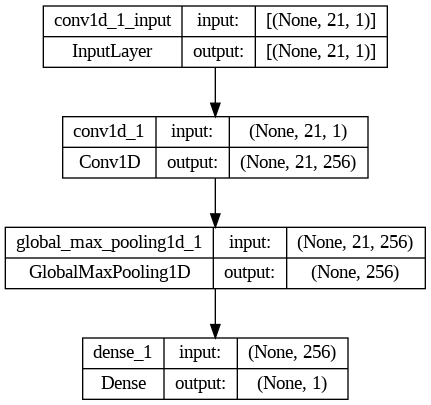

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_6, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_plot/model_Conv1D_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

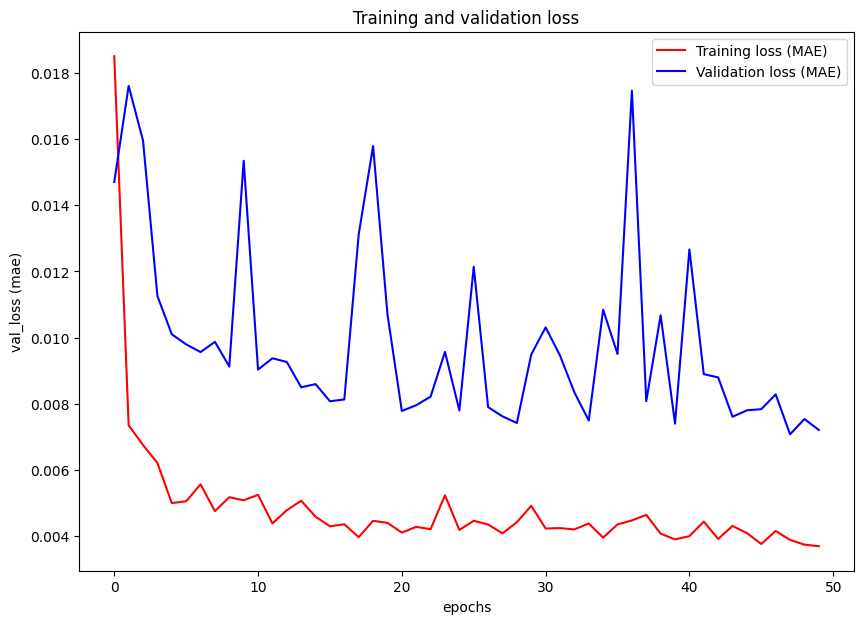

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)



# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_visualization/loss_Conv1D_uni.png')


# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_value_per_epoch/loss_Conv1D_uni.csv', index=False)


In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_6.evaluate(test_nikkeiWindows, test_nikkeiLabels)

126/126 [==============================] - 1s 3ms/step - loss: 0.0088


0.00880690198391676

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_6 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_6_conv1D_univariate")
model_6.evaluate(test_nikkeiWindows, test_nikkeiLabels)


126/126 [==============================] - 0s 2ms/step - loss: 0.0088


0.00880690198391676

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_6_preds = tf.squeeze(model_6.predict(test_nikkeiWindows))
model_6_preds



126/126 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(4012,), dtype=float32, numpy=
array([0.42306852, 0.42475474, 0.43001443, ..., 0.98105305, 0.9903381 ,
       0.9942421 ], dtype=float32)>

In [ ]:
model_6_preds.shape

TensorShape([4012])

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_6_preds = scaler_univariate.inverse_transform([model_6_preds])
denormalized_test_nikkeiLabels = scaler_univariate.inverse_transform([test_nikkeiLabels])

In [ ]:
denormalized_model_6_preds = tf.squeeze(denormalized_model_6_preds)
denormalized_test_nikkeiLabels = tf.squeeze(denormalized_test_nikkeiLabels)

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_6_results = evaluate_preds(y_true = denormalized_test_nikkeiLabels,
                                 y_pred = denormalized_model_6_preds)

model_6_results

{'mae': 344.8278,
 'mse': 238366.92,
 'rmse': 488.22836,
 'R-square': 0.9954647228732988}

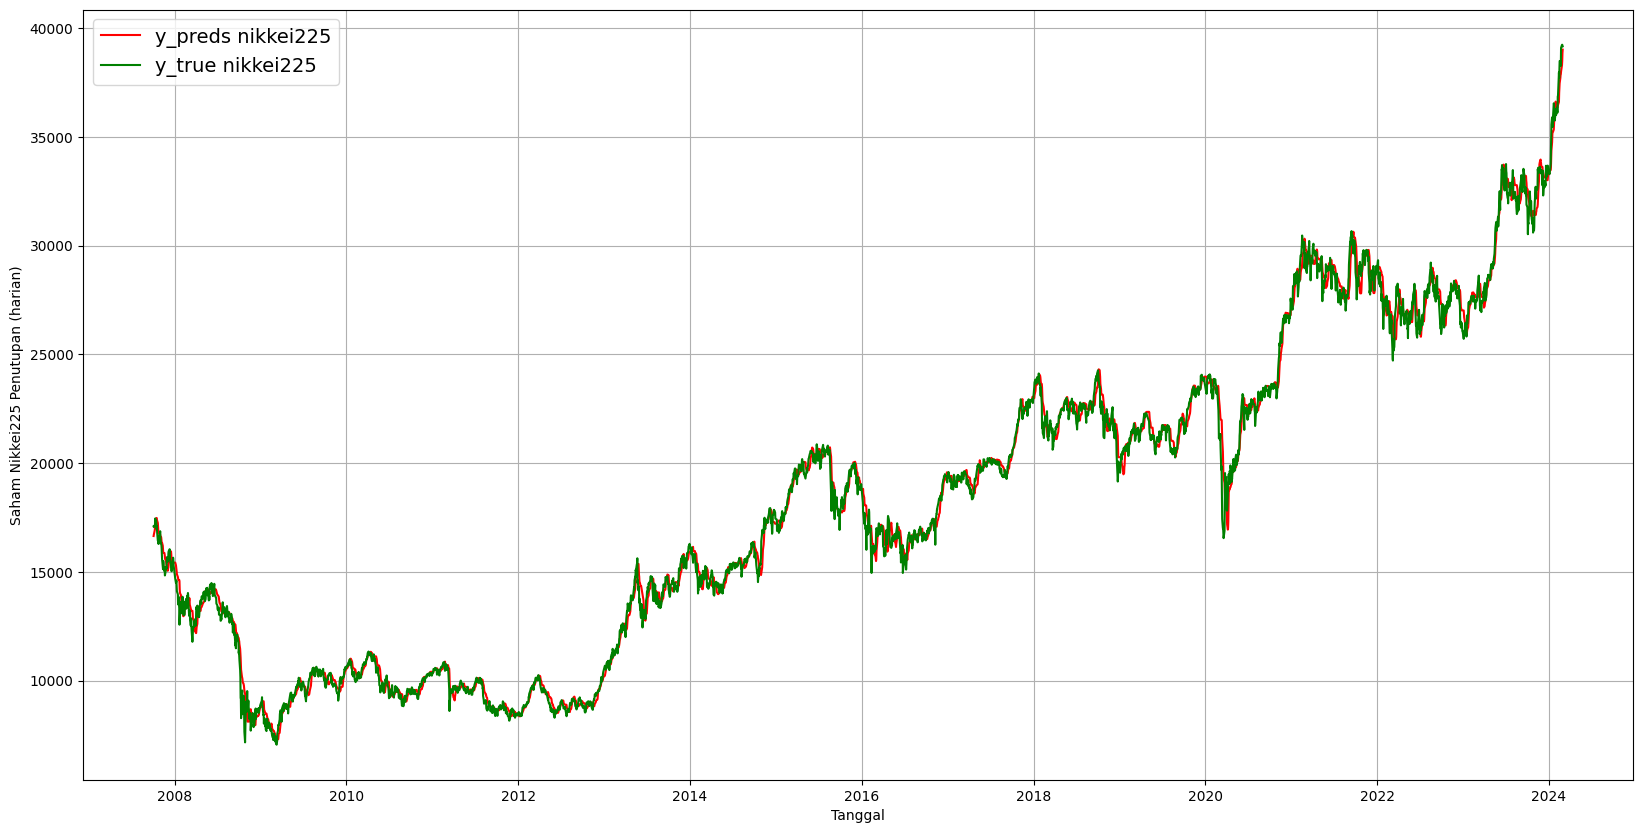

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_6_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_6_plot_prediksi_Conv1D_uni.png')


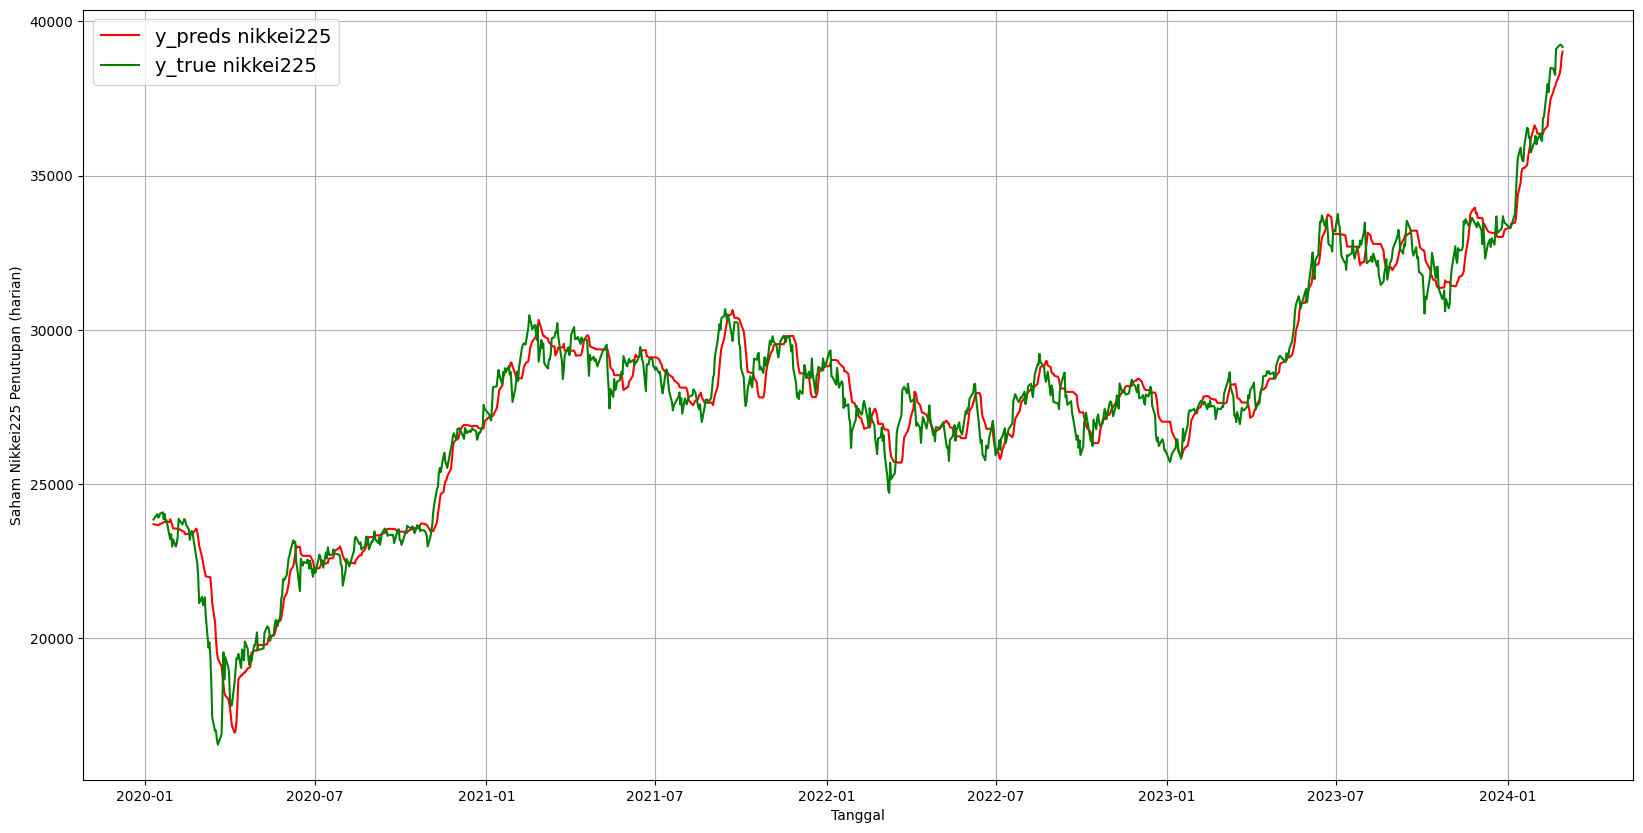

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_6_preds, format = "-", start = 3000,label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", start = 3000,label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_6_plot_prediksi_Conv1D_uni_zoomin.png')


In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_6, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_6_Conv1D_univariate.h5")


<ipython-input-179-b0e2834433a6>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_6, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window14/8020_saved_models/model_6_Conv1D_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_6 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_6_Conv1D_univariate.h5")


# Model 7: LSTM Univariate

## Tuner Builder

In [ ]:
# membuat model LSTM dengan hyperparameter tuning

def model_LSTM_uni_builder(hp):
  tf.random.set_seed(42)

  model_7 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units', min_value=32, max_value=256, step=32),
                               input_shape=(WINDOW_SIZE, 1),
                               return_sequences = False,
                               activation = "relu"),
          #tf.keras.layers.Dropout(0.2),
          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(1, activation = "relu")
          ], name = "model_7_LSTM_univariate")



  #compile model 2
  model_7.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_7

In [ ]:
import keras_tuner as kt

tuner_LSTM_uni = kt.Hyperband(model_LSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs',
                     project_name='LSTM_univariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs/LSTM_univariate/tuner0.json


## Proses tuning


In [ ]:
tuner_LSTM_uni.search(train_nikkeiWindows,
                      train_nikkeiLabels,
                      epochs=10,
                      validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                      batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_LSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units', 'learning_rate']
print('Best tune model LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model LSTM univariate:
lstm_n_units: 256
learning_rate: 0.01


## Hasil parameter semua tuning

In [ ]:
tuning =['lstm_n_units', 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all =tuner_LSTM_uni.get_best_hyperparameters(num_trials=30)
for hps in hps_all :
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam= pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_best_hyperparameter_models/hp_LSTM_uni.csv')
df_hyparam


lstm_n_units  learning_rate
0            256         0.0100
1            256         0.0100
2             64         0.0100
3            160         0.0010
4             96         0.0010
5            128         0.0010
6            128         0.0010
7             96         0.0010
8            192         0.0100
9            224         0.0001
10            96         0.0010
11            32         0.0001
12            96         0.0100
13           256         0.0010
14           224         0.0001
15           224         0.0001
16           224         0.0010
17           192         0.0001
18           256         0.0010
19           160         0.0001
20            96         0.0001
21            64         0.0001
22           192         0.0100
23           192         0.0010
24           224         0.0100
25            32         0.0100
26           256         0.0001
27           128         0.0001
28            64         0.0010
29            32         0.0010

In [ ]:
tuner_LSTM_uni.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs/LSTM_univariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0024 summary
Hyperparameters:
lstm_n_units: 256
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0019
Score: 0.005086142104119062

Trial 0019 summary
Hyperparameters:
lstm_n_units: 256
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.005279069300740957

Trial 0026 summary
Hyperparameters:
lstm_n_units: 64
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005561997182667255

Trial 0029 summary
Hyperparameters:
lstm_n_units: 160
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.006818689405918121

Trial 0016 summary
Hyperparameters:
lstm_n_units: 96
learning_rate: 0.001
tuner/epo

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_7 = tuner_LSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_7 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_7_LSTM_univariate.h5")


In [ ]:

# fit
history = model_7.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_7.name)])

Epoch 1/50
126/126 [==============================] - ETA: 0s - loss: 0.0390
Epoch 1: val_loss improved from inf to 0.00706, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_7_LSTM_univariate
126/126 [==============================] - 22s 167ms/step - loss: 0.0390 - val_loss: 0.0071
Epoch 2/50
126/126 [==============================] - ETA: 0s - loss: 0.0061
Epoch 2: val_loss did not improve from 0.00706
126/126 [==============================] - 21s 164ms/step - loss: 0.0061 - val_loss: 0.0080
Epoch 3/50
126/126 [==============================] - ETA: 0s - loss: 0.0052
Epoch 3: val_loss did not improve from 0.00706
126/126 [==============================] - 20s 159ms/step - loss: 0.0052 - val_loss: 0.0129
Epoch 4/50
126/126 [==============================] - ETA: 0s - loss: 0.0053
Epoch 4: val_loss did not improve from 0.00706
126/126 [==============================] - 20s 160ms/step - loss: 0.0053 - val_loss: 0.0074
Epoc

visualisasi model shape

In [ ]:
model_7.summary()

Model: "model_7_LSTM_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 256)               264192    
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                                 
Total params: 264449 (1.01 MB)
Trainable params: 264449 (1.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


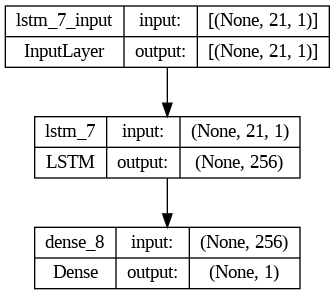

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_7, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_plot/model_LSTM_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

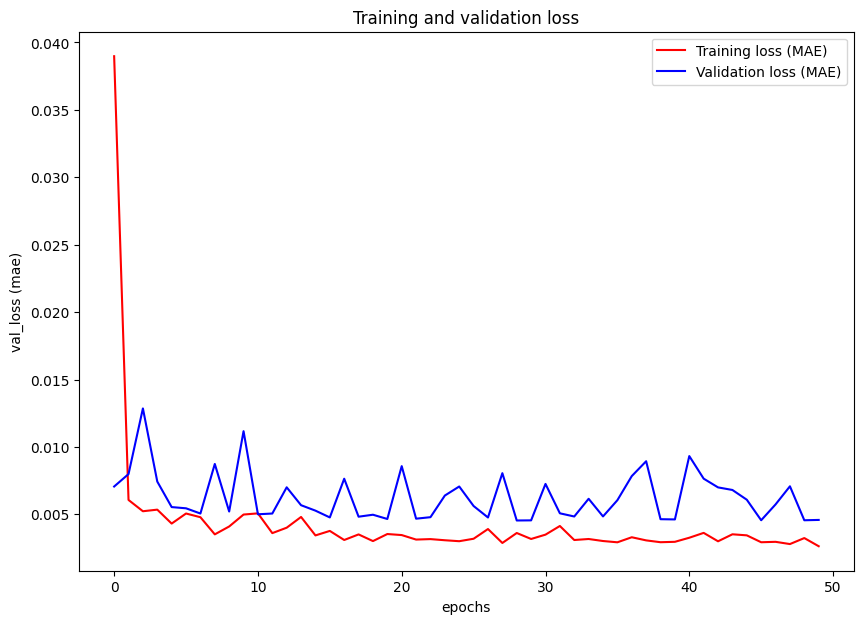

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)



# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_visualization/loss_LSTM_uni.png')



# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_value_per_epoch/loss_LSTM_uni.csv', index=False)


In [ ]:
# mengevaluasi model 7 dari epochs terakhir
model_7.evaluate(test_nikkeiWindows, test_nikkeiLabels)

126/126 [==============================] - 2s 19ms/step - loss: 0.0046


0.004586453083902597

In [ ]:
# mengevaluasi dan load model 7 pada best epoch yang loss mae paling kecil sepanjang training

model_7 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_7_LSTM_univariate")
model_7.evaluate(test_nikkeiWindows, test_nikkeiLabels)


126/126 [==============================] - 4s 28ms/step - loss: 0.0045


0.0045449333265423775

In [ ]:
# membuat predicted value berdasarkan model multivariate model_7 yang sudah di train

model_7_preds = tf.squeeze(model_7.predict(test_nikkeiWindows))
model_7_preds



126/126 [==============================] - 3s 20ms/step


<tf.Tensor: shape=(4012,), dtype=float32, numpy=
array([0.43799448, 0.43473333, 0.43404096, ..., 0.99914217, 1.0019028 ,
       1.0001485 ], dtype=float32)>

In [ ]:
model_7_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.43799448, 0.43473333], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_7_preds = scaler_univariate.inverse_transform([model_7_preds])
denormalized_test_nikkeiLabels = scaler_univariate.inverse_transform([test_nikkeiLabels])

In [ ]:
denormalized_model_7_preds = tf.squeeze(denormalized_model_7_preds)
denormalized_test_nikkeiLabels = tf.squeeze(denormalized_test_nikkeiLabels)

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_7_results = evaluate_preds(y_true = denormalized_test_nikkeiLabels,
                                 y_pred = denormalized_model_7_preds)

model_7_results

{'mae': 177.95352,
 'mse': 62941.117,
 'rmse': 250.88068,
 'R-square': 0.9988024537500664}

In [ ]:
tf.squeeze(test_nikkeiLabels[:])

<tf.Tensor: shape=(4012,), dtype=float64, numpy=
array([0.43436489, 0.43366381, 0.43608654, ..., 1.        , 0.99919575,
       0.99812715])>

In [ ]:
test_nikkeiLabels[:]

array([0.43436489, 0.43366381, 0.43608654, ..., 1.        , 0.99919575,
       0.99812715])

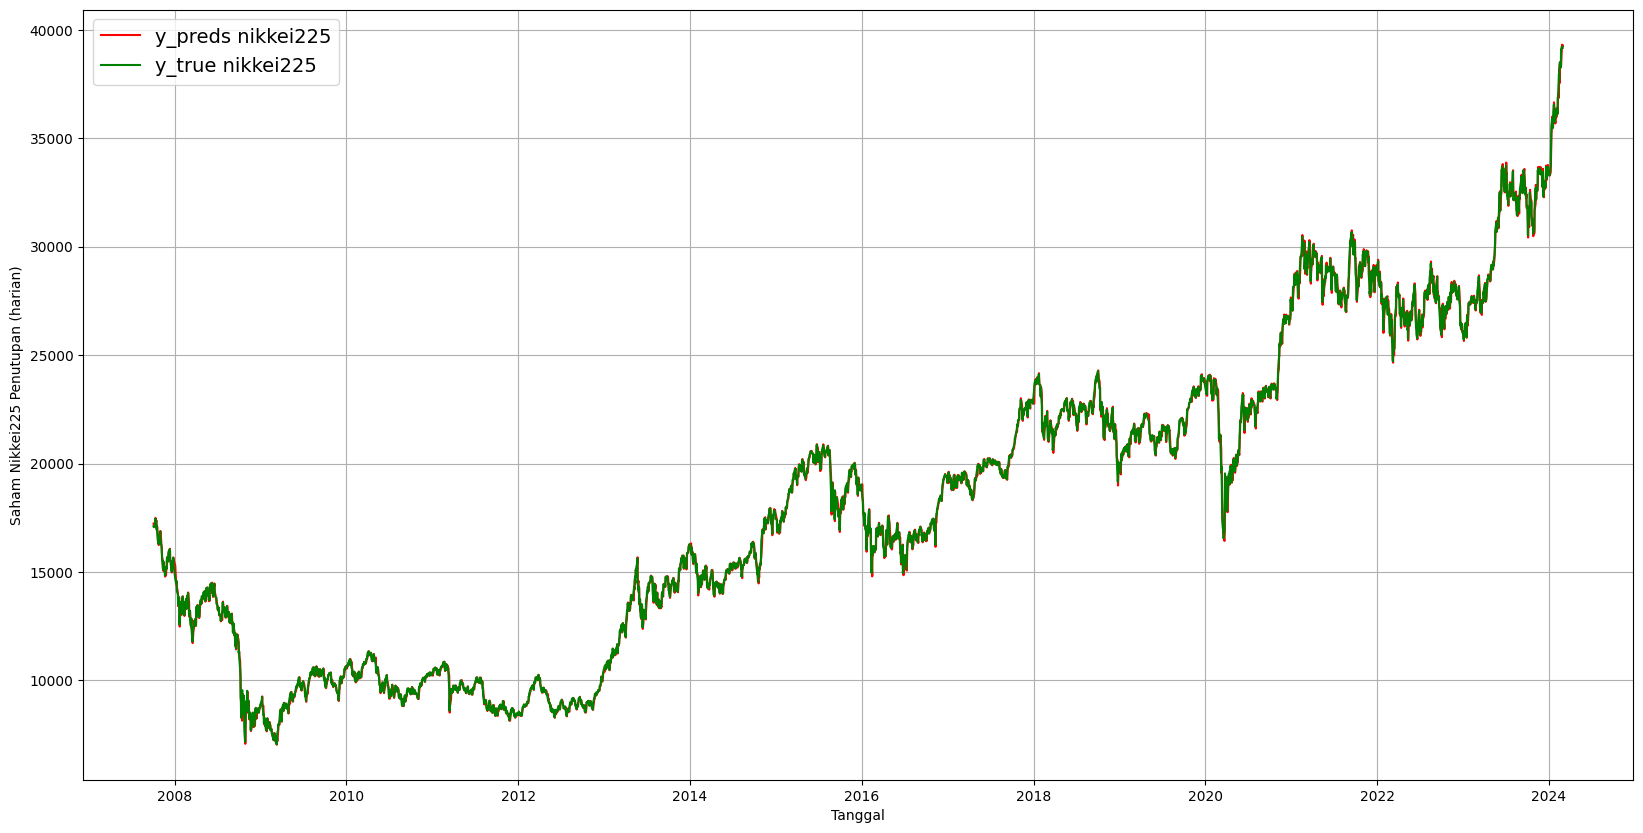

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_7_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_7_plot_prediksi_LSTM_uni.png')


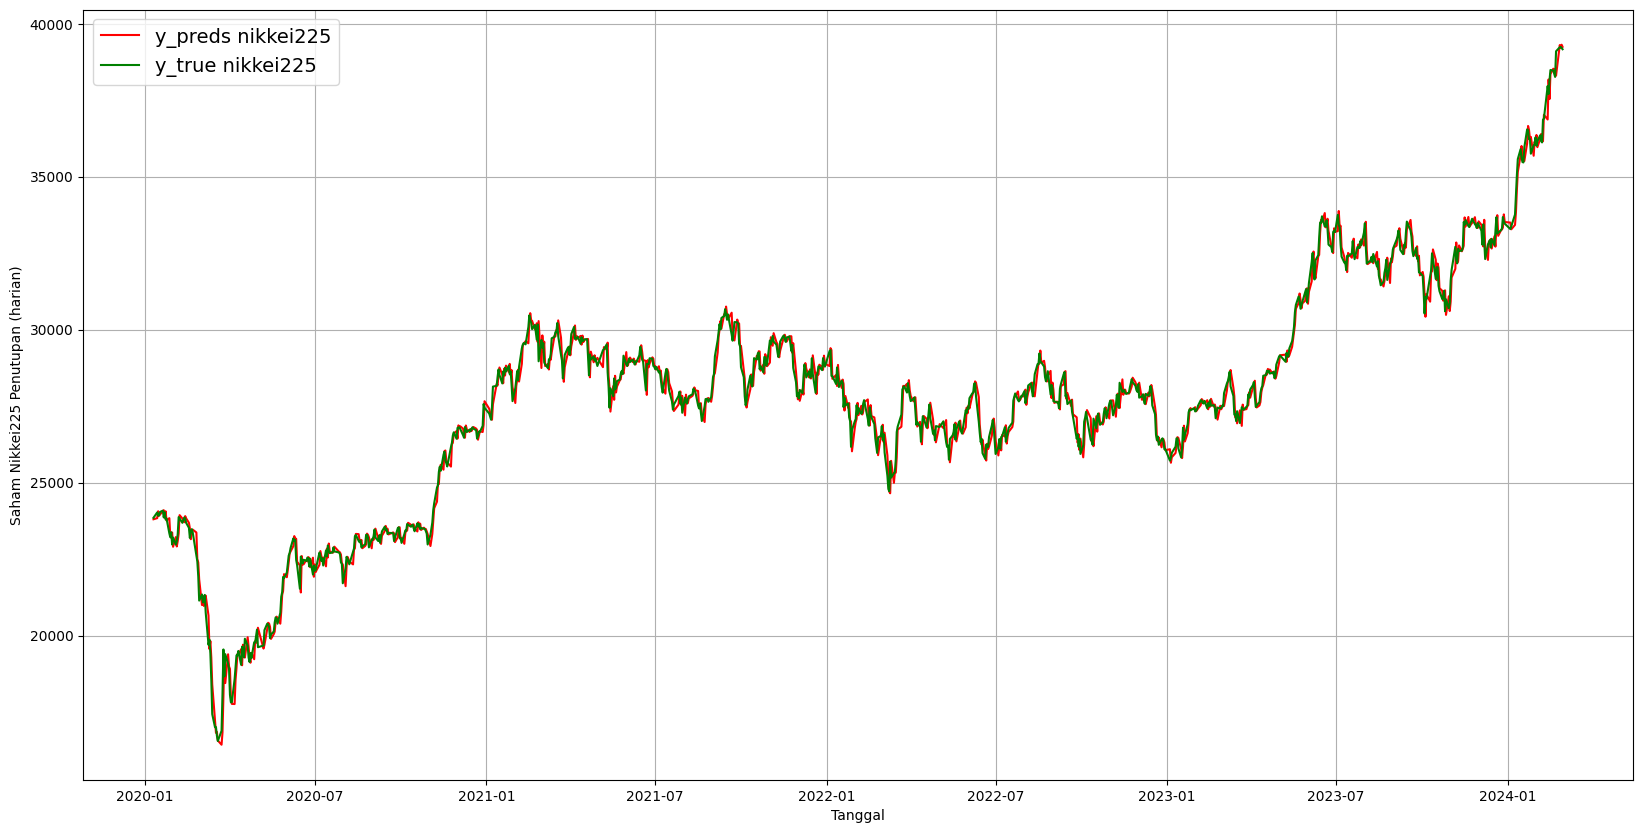

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_7_preds, format = "-", start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", start = 3000, label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_7_plot_prediksi_LSTM_uni_zoomin.png')


simpan model trained ke bentuk h5.

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_7, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_7_LSTM_univariate.h5")


<ipython-input-234-574567f06db5>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_7, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_7_LSTM_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_7 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_7_LSTM_univariate.h5")


 # Model 8 : Stacked LSTM univariate

## Tuner builder

In [ ]:
# membuat model LSTM dengan hyperparameter tuning
def model_stackedLSTM_uni_builder(hp):

  tf.random.set_seed(42)
  model_8 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units =  hp.Int('lstm_n_units', min_value=32, max_value=256, step=32),
                              input_shape=(WINDOW_SIZE, 1),
                              return_sequences = True,
                              activation = "relu"),

          #tf.keras.layers.Dropout(0.2, seed=42),
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units_2', min_value=32, max_value=256, step=32),
                              return_sequences = False,
                              activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(1)
          ], name = "model_8_stackedLSTM_univariate")


  #compile model 8
  model_8.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_8

In [ ]:
import keras_tuner as kt

tuner_stackedLSTM_uni = kt.Hyperband(model_stackedLSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs',
                     project_name='stackedLSTM_univariate')

## Proses tuning


In [ ]:
tuner_stackedLSTM_uni.search(train_nikkeiWindows,
                             train_nikkeiLabels,
                             epochs=10,
                             validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                             batch_size = 128)

Trial 30 Complete [00h 02m 39s]
val_loss: 0.006070492789149284

Best val_loss So Far: 0.006070492789149284
Total elapsed time: 00h 45m 23s


## Hasil parameter tuning terbaik

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps = tuner_stackedLSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units', "lstm_n_units_2", 'learning_rate']
print('Best tune model stacked LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model stacked LSTM univariate:
lstm_n_units: 64
lstm_n_units_2: 160
learning_rate: 0.01


## Hasil semua parameter tuning

In [ ]:
tuning = ['lstm_n_units', "lstm_n_units_2", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all = tuner_stackedLSTM_uni.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam = pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_best_hyperparameter_models/hp_Stacked_LSTM_uni.csv')
df_hyparam


lstm_n_units  lstm_n_units_2  learning_rate
0             64             160         0.0100
1            128              96         0.0100
2            128             224         0.0100
3            128             224         0.0100
4             32             192         0.0100
5            128              32         0.0010
6            192              96         0.0010
7            128              96         0.0100
8            256              96         0.0001
9            192              96         0.0010
10           128              32         0.0010
11           128              96         0.0100
12           128             160         0.0010
13           128             256         0.0010
14            64              32         0.0100
15           128              32         0.0010
16           128             160         0.0010
17            32             160         0.0001
18            64             128         0.0001
19           128             256         0.0010
20           192             192         0.0001
21            32             256         0.0001
22            32             256         0.0010
23           160             256         0.0100
24           224              96         0.0001
25           128             192         0.0010
26           256              96         0.0010
27            32              32         0.0001
28            32             224         0.0100
29           128             192         0.0100

In [ ]:
tuner_stackedLSTM_uni.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs/stackedLSTM_univariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0029 summary
Hyperparameters:
lstm_n_units: 64
lstm_n_units_2: 160
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.006070492789149284

Trial 0017 summary
Hyperparameters:
lstm_n_units: 128
lstm_n_units_2: 96
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.006509734783321619

Trial 0019 summary
Hyperparameters:
lstm_n_units: 128
lstm_n_units_2: 224
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.007048557512462139

Trial 0024 summary
Hyperparameters:
lstm_n_units: 128
lstm_n_units_2: 224
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0019
Score:

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_8 = tuner_stackedLSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_8 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_8_stackedLSTM_univariate.h5")


In [ ]:

# fit
history = model_8.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_8.name)])

Epoch 1/50
126/126 [==============================] - ETA: 0s - loss: 0.0384
Epoch 1: val_loss improved from inf to 0.00990, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_8_stackedLSTM_univariate
126/126 [==============================] - 23s 154ms/step - loss: 0.0384 - val_loss: 0.0099
Epoch 2/50
126/126 [==============================] - ETA: 0s - loss: 0.0077
Epoch 2: val_loss did not improve from 0.00990
126/126 [==============================] - 17s 133ms/step - loss: 0.0077 - val_loss: 0.0255
Epoch 3/50
126/126 [==============================] - ETA: 0s - loss: 0.0083
Epoch 3: val_loss did not improve from 0.00990
126/126 [==============================] - 16s 124ms/step - loss: 0.0083 - val_loss: 0.0156
Epoch 4/50
126/126 [==============================] - ETA: 0s - loss: 0.0076
Epoch 4: val_loss improved from 0.00990 to 0.00806, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21

visualisasi model shape

In [ ]:
model_8.summary()

Model: "model_8_stackedLSTM_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 21, 64)            16896     
                                                                 
 lstm_3 (LSTM)               (None, 160)               144000    
                                                                 
 dense_1 (Dense)             (None, 1)                 161       
                                                                 
Total params: 161057 (629.13 KB)
Trainable params: 161057 (629.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


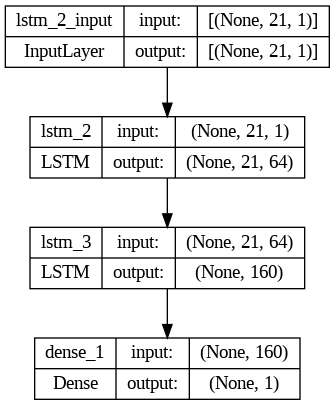

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_8, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_plot/model_stackedLSTM_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

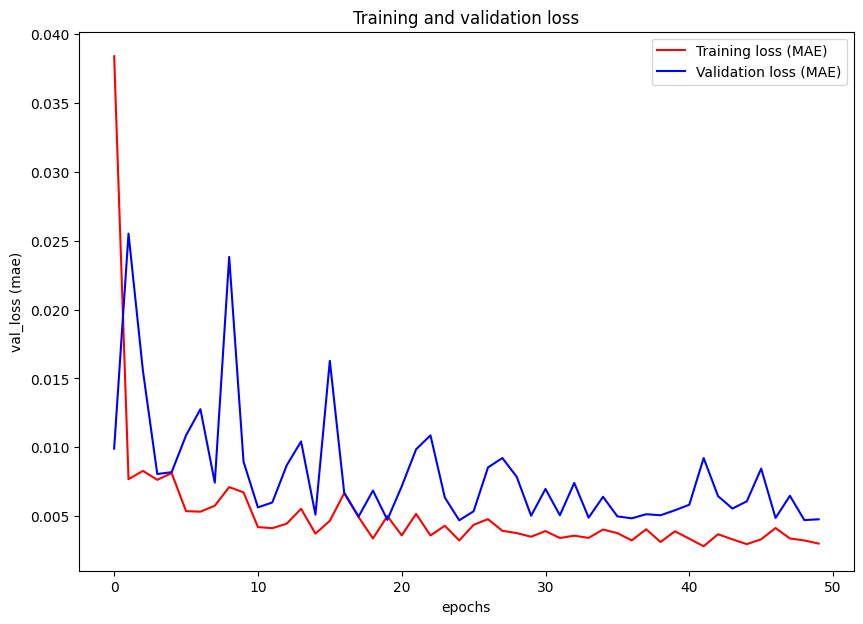

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_visualization/loss_stackedLSTM_uni.png')

# Create a DataFrame from loss and val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan visualisasi loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_value_per_epoch/loss_stackedLSTM_uni.csv', index=False)


In [ ]:
# mengevaluasi model 8 dari epochs terakhir
model_8.evaluate(test_nikkeiWindows, test_nikkeiLabels)

126/126 [==============================] - 2s 18ms/step - loss: 0.0048


0.004769925028085709

In [ ]:
# mengevaluasi dan load model 8 pada best epoch yang loss mae paling kecil sepanjang training

model_8 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_8_stackedLSTM_univariate")
model_8.evaluate(test_nikkeiWindows, test_nikkeiLabels)



126/126 [==============================] - 4s 28ms/step - loss: 0.0047


0.00469845300540328

In [ ]:
# membuat predicted value berdasarkan model multivariate model_8 yang sudah di train

model_8_preds = tf.squeeze(model_8.predict(test_nikkeiWindows))
model_8_preds



126/126 [==============================] - 3s 17ms/step


<tf.Tensor: shape=(4012,), dtype=float32, numpy=
array([0.43794036, 0.4354951 , 0.43477675, ..., 0.99639505, 1.0029129 ,
       0.99507076], dtype=float32)>

In [ ]:
model_8_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.43794036, 0.4354951 ], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_8_preds = scaler_univariate.inverse_transform([model_8_preds])
denormalized_test_nikkeiLabels = scaler_univariate.inverse_transform([test_nikkeiLabels])

In [ ]:
denormalized_model_8_preds = tf.squeeze(denormalized_model_8_preds)
denormalized_test_nikkeiLabels = tf.squeeze(denormalized_test_nikkeiLabels)

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_8_results = evaluate_preds(y_true = denormalized_test_nikkeiLabels,
                                 y_pred = denormalized_model_8_preds)

model_8_results

{'mae': 183.96454,
 'mse': 67214.27,
 'rmse': 259.25717,
 'R-square': 0.9987211505246348}

In [ ]:
tf.squeeze(test_nikkeiLabels)

<tf.Tensor: shape=(4012,), dtype=float64, numpy=
array([0.43436489, 0.43366381, 0.43608654, ..., 1.        , 0.99919575,
       0.99812715])>

In [ ]:
test_nikkeiLabels[:]

array([0.43436489, 0.43366381, 0.43608654, ..., 1.        , 0.99919575,
       0.99812715])

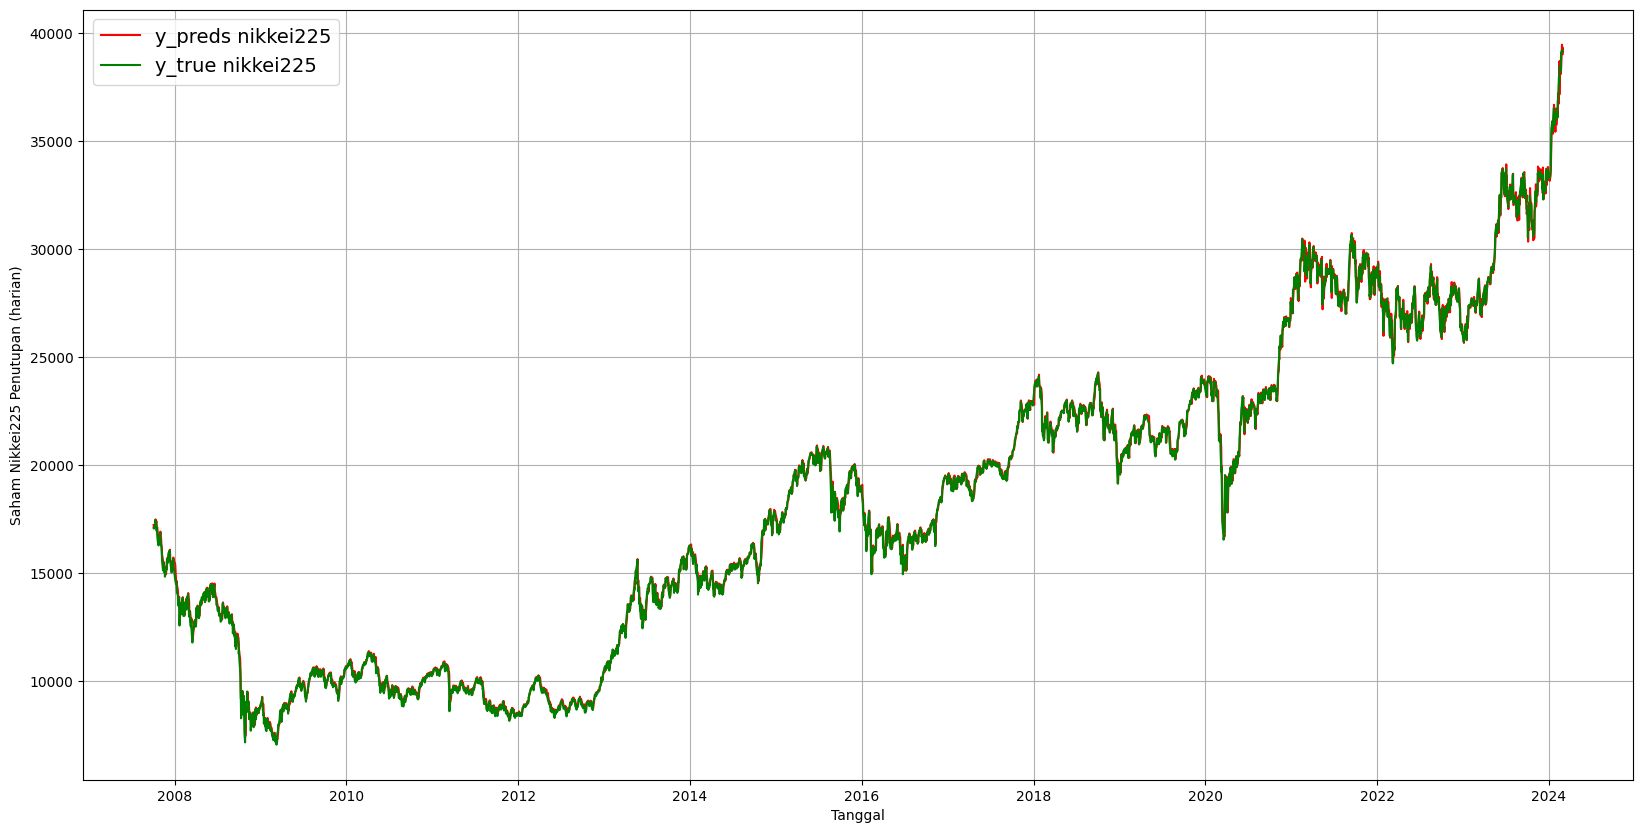

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_8_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_8_plot_prediksi_stackedLSTM_uni.png')


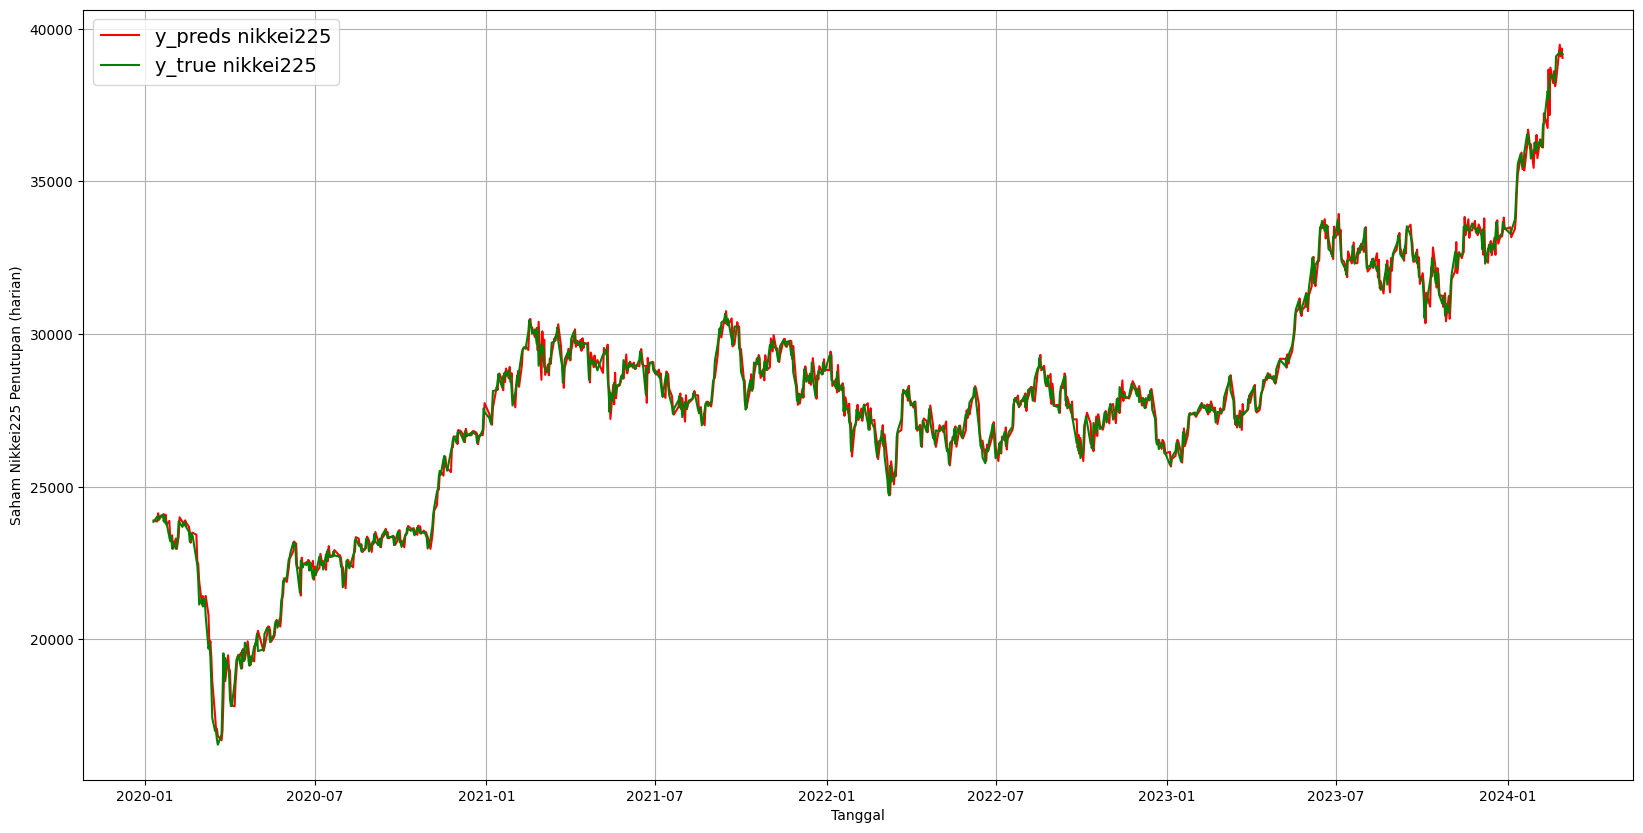

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_8_preds, format = "-",start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-",start = 3000, label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_8_plot_prediksi_stackedLSTM_uni_zoomin.png')


simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_8, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_8_stackedLSTM_univariate.h5")


<ipython-input-257-027e8e1b82bb>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_8, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_8_stackedLSTM_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_8 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_8_stackedLSTM_univariate.h5")


# Model 9: Bidirectional LSTM Univariate

In [ ]:
train_nikkeiWindows.shape

(16045, 21)

In [ ]:
test_nikkeiLabels.shape

(4012,)

## Tuner Builder

In [ ]:
def model_bidirectional_LSTM_uni_builder(hp):

  tf.random.set_seed(42)
  model_9 = tf.keras.models.Sequential([
          #tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
          tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), # ini lambda layer sumberny dari bangkit C4W3 lab1
                        input_shape=[WINDOW_SIZE]),

          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = hp.Int('bi_lstm_n_units', min_value=32, max_value=256, step=32),
                                                             input_shape=(WINDOW_SIZE, 1),
                                                             return_sequences = False,
                                                             activation = "relu")),
          #tf.keras.layers.Dropout(0.2, seed=42),
          #tf.keras.layers.LSTM(128, return_sequences = False, activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(1)
          ], name = "model_9_bidirectionalLSTM_univariate")


  #compile model 2
  model_9.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_9

In [ ]:
import keras_tuner as kt

tuner_bi_LSTM_uni = kt.Hyperband(model_bidirectional_LSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs',
                     project_name='bi_LSTM_univariate')

## Proses tuning


In [ ]:
tuner_bi_LSTM_uni.search(train_nikkeiWindows,
                         train_nikkeiLabels,
                         epochs=10,
                         validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                         batch_size = 128)

Trial 30 Complete [00h 03m 18s]
val_loss: 0.005111300852149725

Best val_loss So Far: 0.004988286644220352
Total elapsed time: 00h 44m 39s


## Hasil parameter tuning terbaik

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_bi_LSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ["bi_lstm_n_units", 'learning_rate']
print('Best tune model bidirectional LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model bidirectional LSTM univariate:
bi_lstm_n_units: 128
learning_rate: 0.01


## Hasil semua parameter tuning

In [ ]:
tuning = ["bi_lstm_n_units", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hp_all=tuner_bi_LSTM_uni.get_best_hyperparameters(num_trials=30)
for hps in hp_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam= pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_best_hyperparameter_models/hp_bi_LSTM_uni.csv')
df_hyparam


bi_lstm_n_units  learning_rate
0               128         0.0100
1               160         0.0100
2               192         0.0100
3               256         0.0100
4                96         0.0100
5               192         0.0100
6                96         0.0100
7               224         0.0100
8               224         0.0010
9               256         0.0010
10              192         0.0100
11               32         0.0010
12              256         0.0010
13              224         0.0010
14               96         0.0100
15               96         0.0010
16              160         0.0010
17              128         0.0010
18               32         0.0001
19              128         0.0010
20              192         0.0010
21              224         0.0100
22              192         0.0001
23              224         0.0001
24               96         0.0001
25               64         0.0010
26              160         0.0001
27               64         0.0001
28              128         0.0001
29               64         0.0100

In [ ]:
tuner_bi_LSTM_uni.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs/bi_LSTM_univariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0027 summary
Hyperparameters:
bi_lstm_n_units: 128
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.004988286644220352

Trial 0029 summary
Hyperparameters:
bi_lstm_n_units: 160
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005111300852149725

Trial 0016 summary
Hyperparameters:
bi_lstm_n_units: 192
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.00526713952422142

Trial 0028 summary
Hyperparameters:
bi_lstm_n_units: 256
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005481935106217861

Trial 0017 summary
Hyperparameters:
bi_lstm_n_units: 96
learning_rat

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_9 = tuner_bi_LSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_9 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_9_bidirectionalLSTM_univariate.h5")


In [ ]:

# fit
history = model_9.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_9.name)])

Epoch 1/50
126/126 [==============================] - ETA: 0s - loss: 0.0203
Epoch 1: val_loss improved from inf to 0.00948, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_9_bidirectionalLSTM_univariate
126/126 [==============================] - 23s 159ms/step - loss: 0.0203 - val_loss: 0.0095
Epoch 2/50
  1/126 [..............................] - ETA: 11s - loss: 0.0056

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

126/126 [==============================] - ETA: 0s - loss: 0.0063
Epoch 2: val_loss improved from 0.00948 to 0.00883, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_9_bidirectionalLSTM_univariate
126/126 [==============================] - 21s 167ms/step - loss: 0.0063 - val_loss: 0.0088
Epoch 3/50
  1/126 [..............................] - ETA: 11s - loss: 0.0062

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

126/126 [==============================] - ETA: 0s - loss: 0.0077
Epoch 3: val_loss did not improve from 0.00883
126/126 [==============================] - 15s 118ms/step - loss: 0.0077 - val_loss: 0.0138
Epoch 4/50
126/126 [==============================] - ETA: 0s - loss: 0.0057
Epoch 4: val_loss improved from 0.00883 to 0.00667, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_9_bidirectionalLSTM_univariate
126/126 [==============================] - 20s 157ms/step - loss: 0.0057 - val_loss: 0.0067
Epoch 5/50
  1/126 [..............................] - ETA: 12s - loss: 0.0028

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

126/126 [==============================] - ETA: 0s - loss: 0.0054
Epoch 5: val_loss did not improve from 0.00667
126/126 [==============================] - 15s 119ms/step - loss: 0.0054 - val_loss: 0.0101
Epoch 6/50
126/126 [==============================] - ETA: 0s - loss: 0.0047
Epoch 6: val_loss improved from 0.00667 to 0.00584, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_9_bidirectionalLSTM_univariate
126/126 [==============================] - 20s 162ms/step - loss: 0.0047 - val_loss: 0.0058
Epoch 7/50
  1/126 [..............................] - ETA: 19s - loss: 0.0031

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

126/126 [==============================] - ETA: 0s - loss: 0.0046
Epoch 7: val_loss improved from 0.00584 to 0.00542, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_9_bidirectionalLSTM_univariate
126/126 [==============================] - 21s 165ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 8/50
  1/126 [..............................] - ETA: 12s - loss: 0.0030

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

126/126 [==============================] - ETA: 0s - loss: 0.0042
Epoch 8: val_loss did not improve from 0.00542
126/126 [==============================] - 15s 120ms/step - loss: 0.0042 - val_loss: 0.0073
Epoch 9/50
126/126 [==============================] - ETA: 0s - loss: 0.0045
Epoch 9: val_loss did not improve from 0.00542
126/126 [==============================] - 15s 120ms/step - loss: 0.0045 - val_loss: 0.0122
Epoch 10/50
126/126 [==============================] - ETA: 0s - loss: 0.0041
Epoch 10: val_loss did not improve from 0.00542
126/126 [==============================] - 15s 120ms/step - loss: 0.0041 - val_loss: 0.0079
Epoch 11/50
126/126 [==============================] - ETA: 0s - loss: 0.0037
Epoch 11: val_loss improved from 0.00542 to 0.00479, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_9_bidirectionalLSTM_univariate
126/126 [==============================] - 21s 165ms/step - loss: 0.0037 - val_loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

126/126 [==============================] - ETA: 0s - loss: 0.0048
Epoch 12: val_loss did not improve from 0.00479
126/126 [==============================] - 15s 122ms/step - loss: 0.0048 - val_loss: 0.0050
Epoch 13/50
126/126 [==============================] - ETA: 0s - loss: 0.0037
Epoch 13: val_loss improved from 0.00479 to 0.00478, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_9_bidirectionalLSTM_univariate
126/126 [==============================] - 21s 165ms/step - loss: 0.0037 - val_loss: 0.0048
Epoch 14/50
  1/126 [..............................] - ETA: 11s - loss: 0.0029

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

126/126 [==============================] - ETA: 0s - loss: 0.0044
Epoch 14: val_loss did not improve from 0.00478
126/126 [==============================] - 15s 118ms/step - loss: 0.0044 - val_loss: 0.0050
Epoch 15/50
126/126 [==============================] - ETA: 0s - loss: 0.0036
Epoch 15: val_loss did not improve from 0.00478
126/126 [==============================] - 15s 119ms/step - loss: 0.0036 - val_loss: 0.0048
Epoch 16/50
125/126 [============================>.] - ETA: 0s - loss: 0.0040
Epoch 16: val_loss did not improve from 0.00478
126/126 [==============================] - 15s 119ms/step - loss: 0.0040 - val_loss: 0.0064
Epoch 17/50
126/126 [==============================] - ETA: 0s - loss: 0.0033
Epoch 17: val_loss improved from 0.00478 to 0.00462, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_9_bidirectionalLSTM_univariate
126/126 [==============================] - 23s 182ms/step - loss: 0.0033 - val_loss

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

126/126 [==============================] - ETA: 0s - loss: 0.0040
Epoch 18: val_loss did not improve from 0.00462
126/126 [==============================] - 15s 121ms/step - loss: 0.0040 - val_loss: 0.0047
Epoch 19/50
126/126 [==============================] - ETA: 0s - loss: 0.0034
Epoch 19: val_loss did not improve from 0.00462
126/126 [==============================] - 15s 120ms/step - loss: 0.0034 - val_loss: 0.0058
Epoch 20/50
126/126 [==============================] - ETA: 0s - loss: 0.0027
Epoch 20: val_loss did not improve from 0.00462
126/126 [==============================] - 15s 120ms/step - loss: 0.0027 - val_loss: 0.0047
Epoch 21/50
126/126 [==============================] - ETA: 0s - loss: 0.0033
Epoch 21: val_loss improved from 0.00462 to 0.00457, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_9_bidirectionalLSTM_univariate
126/126 [==============================] - 20s 160ms/step - loss: 0.0033 - val_loss

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

126/126 [==============================] - ETA: 0s - loss: 0.0029
Epoch 22: val_loss did not improve from 0.00457
126/126 [==============================] - 16s 130ms/step - loss: 0.0029 - val_loss: 0.0050
Epoch 23/50
126/126 [==============================] - ETA: 0s - loss: 0.0038
Epoch 23: val_loss improved from 0.00457 to 0.00457, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_9_bidirectionalLSTM_univariate
126/126 [==============================] - 21s 165ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 24/50
  1/126 [..............................] - ETA: 12s - loss: 0.0017

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

126/126 [==============================] - ETA: 0s - loss: 0.0030
Epoch 24: val_loss did not improve from 0.00457
126/126 [==============================] - 15s 120ms/step - loss: 0.0030 - val_loss: 0.0059
Epoch 25/50
126/126 [==============================] - ETA: 0s - loss: 0.0031
Epoch 25: val_loss did not improve from 0.00457
126/126 [==============================] - 15s 120ms/step - loss: 0.0031 - val_loss: 0.0048
Epoch 26/50
126/126 [==============================] - ETA: 0s - loss: 0.0037
Epoch 26: val_loss did not improve from 0.00457
126/126 [==============================] - 15s 119ms/step - loss: 0.0037 - val_loss: 0.0088
Epoch 27/50
126/126 [==============================] - ETA: 0s - loss: 0.0026
Epoch 27: val_loss did not improve from 0.00457
126/126 [==============================] - 15s 119ms/step - loss: 0.0026 - val_loss: 0.0048
Epoch 28/50
126/126 [==============================] - ETA: 0s - loss: 0.0027
Epoch 28: val_loss did not improve from 0.00457
126/126 [=====

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

126/126 [==============================] - ETA: 0s - loss: 0.0032
Epoch 30: val_loss did not improve from 0.00456
126/126 [==============================] - 15s 119ms/step - loss: 0.0032 - val_loss: 0.0059
Epoch 31/50
126/126 [==============================] - ETA: 0s - loss: 0.0031
Epoch 31: val_loss did not improve from 0.00456
126/126 [==============================] - 15s 122ms/step - loss: 0.0031 - val_loss: 0.0072
Epoch 32/50
126/126 [==============================] - ETA: 0s - loss: 0.0034
Epoch 32: val_loss did not improve from 0.00456
126/126 [==============================] - 15s 121ms/step - loss: 0.0034 - val_loss: 0.0058
Epoch 33/50
126/126 [==============================] - ETA: 0s - loss: 0.0030
Epoch 33: val_loss did not improve from 0.00456
126/126 [==============================] - 15s 121ms/step - loss: 0.0030 - val_loss: 0.0049
Epoch 34/50
126/126 [==============================] - ETA: 0s - loss: 0.0029
Epoch 34: val_loss did not improve from 0.00456
126/126 [=====

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

126/126 [==============================] - ETA: 0s - loss: 0.0031
Epoch 37: val_loss did not improve from 0.00456
126/126 [==============================] - 15s 119ms/step - loss: 0.0031 - val_loss: 0.0074
Epoch 38/50
126/126 [==============================] - ETA: 0s - loss: 0.0030
Epoch 38: val_loss did not improve from 0.00456
126/126 [==============================] - 16s 130ms/step - loss: 0.0030 - val_loss: 0.0046
Epoch 39/50
126/126 [==============================] - ETA: 0s - loss: 0.0028
Epoch 39: val_loss did not improve from 0.00456
126/126 [==============================] - 15s 122ms/step - loss: 0.0028 - val_loss: 0.0050
Epoch 40/50
126/126 [==============================] - ETA: 0s - loss: 0.0029
Epoch 40: val_loss did not improve from 0.00456
126/126 [==============================] - 16s 125ms/step - loss: 0.0029 - val_loss: 0.0069
Epoch 41/50
126/126 [==============================] - ETA: 0s - loss: 0.0029
Epoch 41: val_loss did not improve from 0.00456
126/126 [=====

visualisasi model shape

In [ ]:
model_9.summary()

Model: "model_9_bidirectionalLSTM_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 21, 1)             0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               133120    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 133377 (521.00 KB)
Trainable params: 133377 (521.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


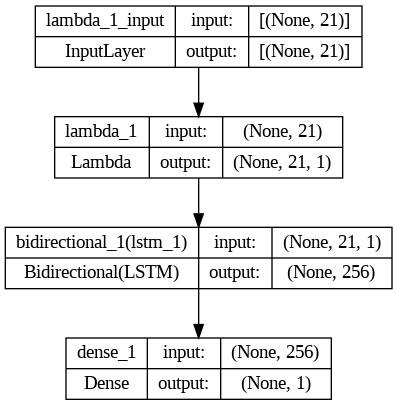

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_9, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_plot/model_biLSTM_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

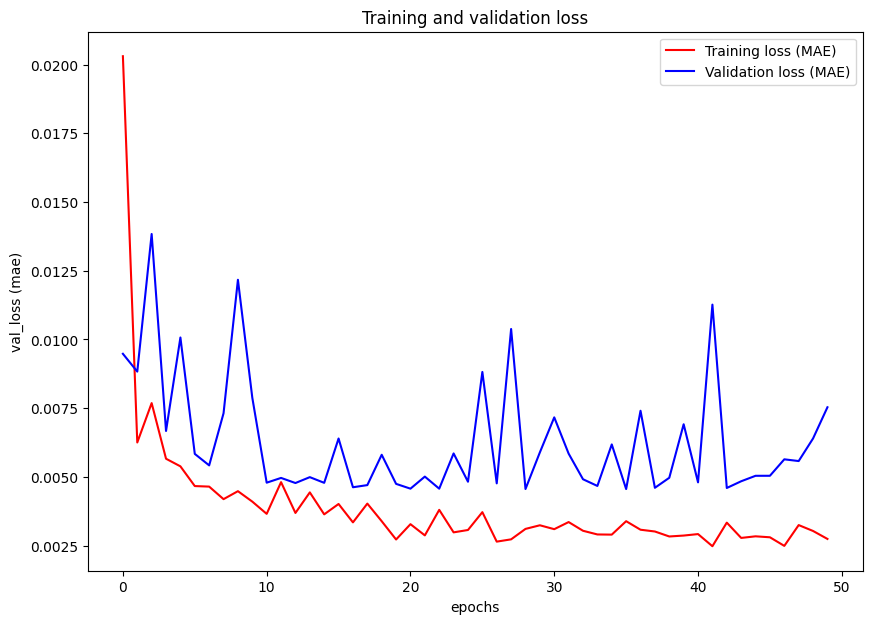

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_visualization/loss_bidirectional_LSTM_uni.png')



# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_value_per_epoch/loss_bidirectional_LSTM_uni.csv', index=False)


In [ ]:
# mengevaluasi model 9 dari epochs terakhir
model_9.evaluate(test_nikkeiWindows, test_nikkeiLabels)

126/126 [==============================] - 2s 16ms/step - loss: 0.0075


0.007534217555075884

In [ ]:
# mengevaluasi dan load model 9 pada best epoch yang loss mae paling kecil sepanjang training

model_9 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_9_bidirectionalLSTM_univariate")
model_9.evaluate(test_nikkeiWindows, test_nikkeiLabels)


126/126 [==============================] - 2s 16ms/step - loss: 0.0046


0.004558376502245665

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_9_preds = tf.squeeze(model_9.predict(test_nikkeiWindows))
model_9_preds



126/126 [==============================] - 2s 16ms/step


<tf.Tensor: shape=(4012,), dtype=float32, numpy=
array([0.43762037, 0.43473   , 0.43405417, ..., 1.0008115 , 1.0045295 ,
       1.0026758 ], dtype=float32)>

In [ ]:
model_9_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.43762037, 0.43473   ], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_9_preds = scaler_univariate.inverse_transform([model_9_preds])
denormalized_test_nikkeiLabels = scaler_univariate.inverse_transform([test_nikkeiLabels])

In [ ]:
denormalized_model_9_preds = tf.squeeze(denormalized_model_9_preds)
denormalized_test_nikkeiLabels = tf.squeeze(denormalized_test_nikkeiLabels)

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_9_results = evaluate_preds(y_true = denormalized_test_nikkeiLabels,
                                 y_pred = denormalized_model_9_preds)

model_9_results

{'mae': 178.47992,
 'mse': 63375.883,
 'rmse': 251.74567,
 'R-square': 0.9987941815985327}

In [ ]:
tf.squeeze(test_nikkeiLabels[:])

<tf.Tensor: shape=(4012,), dtype=float64, numpy=
array([0.43436489, 0.43366381, 0.43608654, ..., 1.        , 0.99919575,
       0.99812715])>

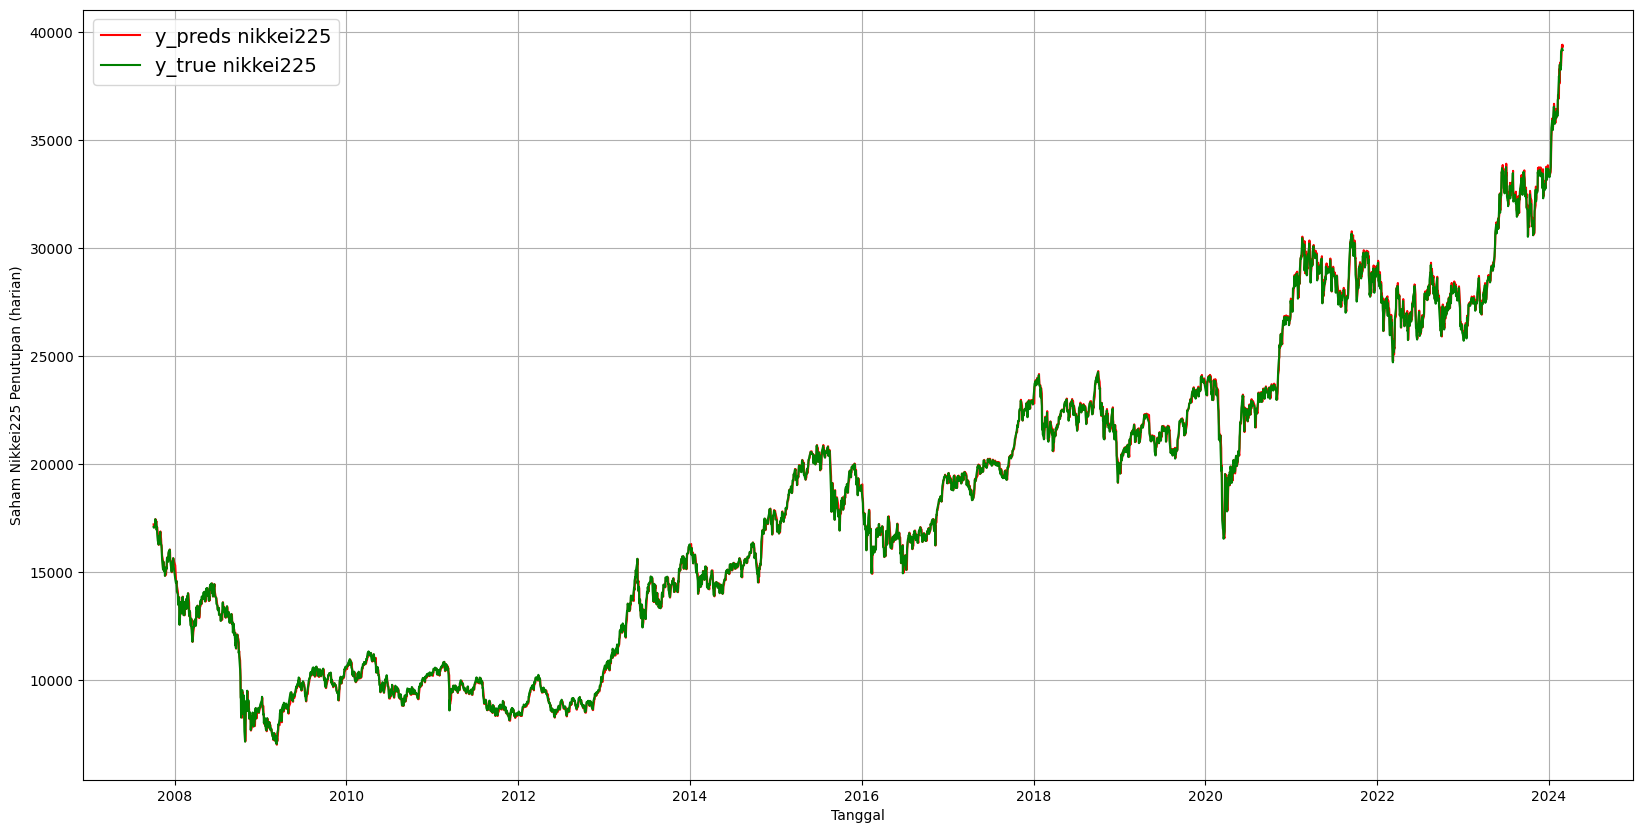

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_9_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_9_plot_prediksi_biLSTM_uni.png')


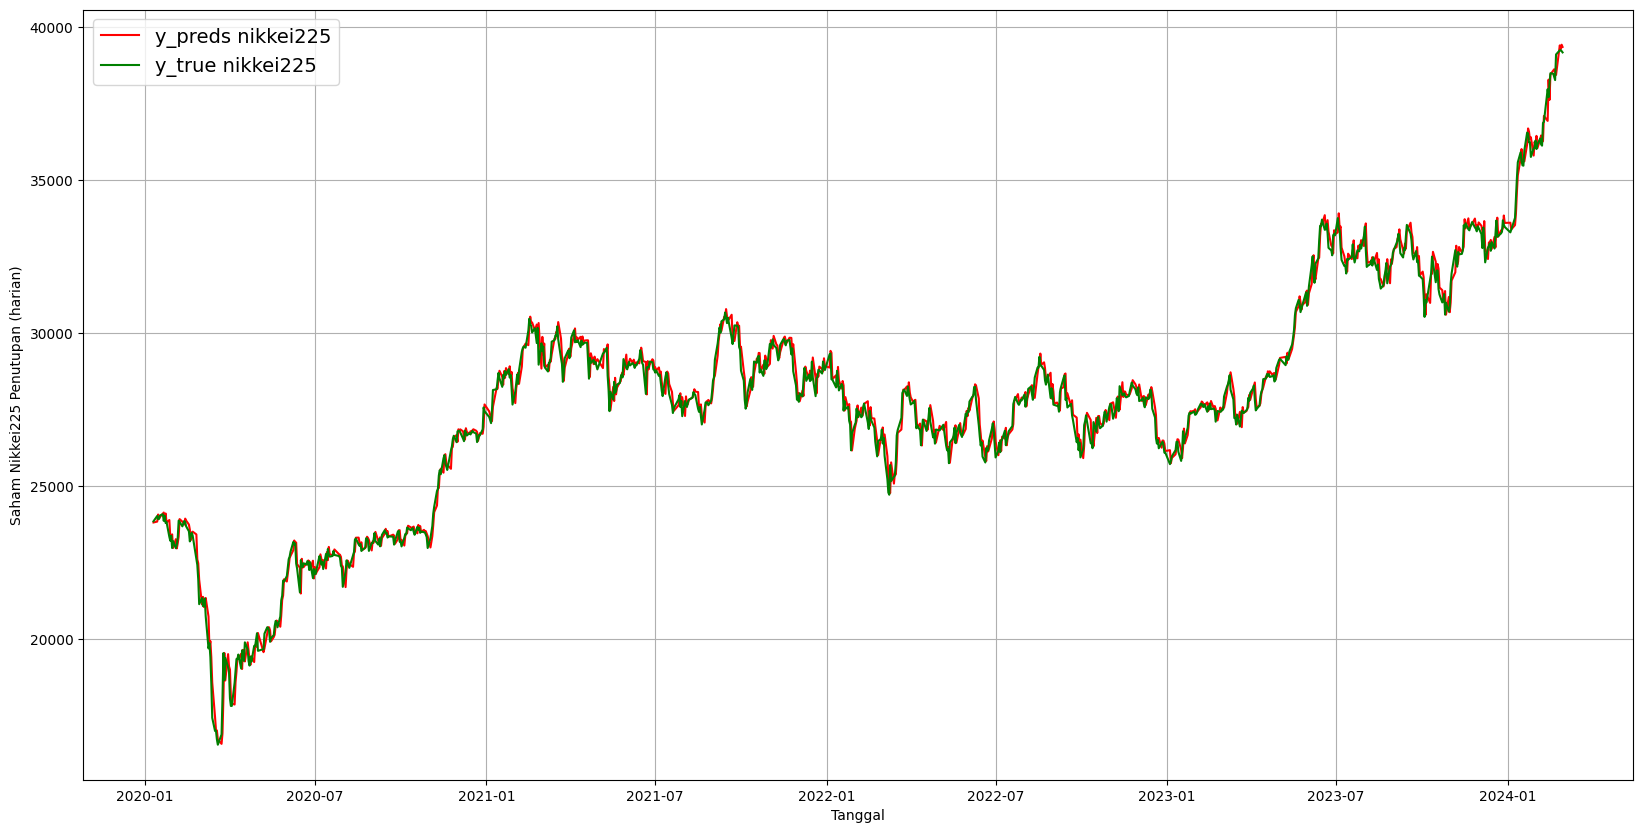

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_9_preds, format = "-", start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-",start = 3000,  label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_9_plot_prediksi_biLSTM_uni_zoomin.png')


simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_9, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_9_bidirectionalLSTM_univariate.h5")



<ipython-input-281-8b72346e75f3>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_9, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_9_bidirectionalLSTM_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_9 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_9_bidirectionalLSTM_univariate.h5")


# Model 10: CNN-LSTM Univariate

## Tuner Builder

In [ ]:
#create Conv1D model
def model_CNN_LSTM_uni_builder(hp):
  tf.random.set_seed(42)
  model_10 = tf.keras.models.Sequential([
      #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
      tf.keras.layers.Conv1D(filters=hp.Int('Conv1D_n_filters', min_value=32, max_value=256, step=32),
                             kernel_size=hp.Int('Conv1_kernel_size', min_value=5, max_value=10, step=1),
                             strides=1,
                             padding="causal",
                             activation="relu",
                             input_shape=[WINDOW_SIZE, 1]),

      tf.keras.layers.LSTM(units = hp.Int('LSTM_n_units', min_value=32, max_value=256, step=32),
                           return_sequences=False),

      tf.keras.layers.Dense(1),
      #filters adalah jumlah hidden unit dalam layers tersebut
      # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
      # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
  ], name = "model_10_CNN-LSTM_univariate")

  #compile model 10
  model_10.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_10

In [ ]:
import keras_tuner as kt

tuner_CNN_LSTM_uni = kt.Hyperband(model_CNN_LSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs',
                     project_name='CNN_LSTM_univariate')


## Proses tuning


In [ ]:
tuner_CNN_LSTM_uni.search(train_nikkeiWindows,
                          train_nikkeiLabels,
                          epochs=10,
                          validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                          batch_size = 128)

Trial 30 Complete [00h 02m 26s]
val_loss: 0.006083534099161625

Best val_loss So Far: 0.005354952998459339
Total elapsed time: 00h 39m 04s


## Hasil parameter tuning terbaik

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_CNN_LSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['Conv1D_n_filters', 'Conv1_kernel_size', "LSTM_n_units", 'learning_rate']
print('Best tune model bidirectional LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model bidirectional LSTM univariate:
Conv1D_n_filters: 224
Conv1_kernel_size: 8
LSTM_n_units: 192
learning_rate: 0.001


## Hasil semua parameter tuning

In [ ]:
tuning = ['Conv1D_n_filters', 'Conv1_kernel_size', "LSTM_n_units", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all=tuner_CNN_LSTM_uni.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam= pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_best_hyperparameter_models/hp_CNN_LSTM_uni.csv')
df_hyparam



Conv1D_n_filters  Conv1_kernel_size  LSTM_n_units  learning_rate
0                224                  8           192         0.0010
1                224                  6            96         0.0010
2                256                  5           256         0.0010
3                192                  8            32         0.0100
4                224                  6           192         0.0100
5                 32                  8           160         0.0100
6                 64                 10           192         0.0100
7                224                  6           192         0.0100
8                224                  8           192         0.0010
9                224                  6            96         0.0010
10               160                  8           128         0.0100
11               256                  5           256         0.0010
12               256                  8           192         0.0010
13               256                  7           128         0.0001
14                32                  6            64         0.0010
15               256                  5           256         0.0010
16               256                 10           224         0.0010
17               256                  8           192         0.0010
18                32                  6            64         0.0010
19               224                  6            96         0.0010
20               128                  5           160         0.0010
21                96                  6            32         0.0100
22               160                  8            96         0.0010
23               192                  7            64         0.0100
24               160                  7            64         0.0100
25               128                  8            96         0.0001
26                96                  9           256         0.0100
27               224                  9           160         0.0001
28               192                  8           128         0.0100
29                32                  7           256         0.0100

In [ ]:
tuner_CNN_LSTM_uni.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_tuning_logs/CNN_LSTM_univariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0025 summary
Hyperparameters:
Conv1D_n_filters: 224
Conv1_kernel_size: 8
LSTM_n_units: 192
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0023
Score: 0.005354952998459339

Trial 0016 summary
Hyperparameters:
Conv1D_n_filters: 224
Conv1_kernel_size: 6
LSTM_n_units: 96
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0015
Score: 0.005557321943342686

Trial 0017 summary
Hyperparameters:
Conv1D_n_filters: 256
Conv1_kernel_size: 5
LSTM_n_units: 256
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.005703207571059465

Trial 0027 summary
Hyperparameters:
Conv1D_n_filters: 192
Conv1_kernel_size: 8
L

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_10 = tuner_CNN_LSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_10 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_10_CNN-LSTM_univariate.h5")



In [ ]:

# fit
history = model_10.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_10.name)])

Epoch 1/50
126/126 [==============================] - ETA: 0s - loss: 0.0161
Epoch 1: val_loss improved from inf to 0.00988, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_10_CNN-LSTM_univariate
126/126 [==============================] - 25s 183ms/step - loss: 0.0161 - val_loss: 0.0099
Epoch 2/50
126/126 [==============================] - ETA: 0s - loss: 0.0050
Epoch 2: val_loss did not improve from 0.00988
126/126 [==============================] - 23s 178ms/step - loss: 0.0050 - val_loss: 0.0122
Epoch 3/50
126/126 [==============================] - ETA: 0s - loss: 0.0049
Epoch 3: val_loss did not improve from 0.00988
126/126 [==============================] - 21s 165ms/step - loss: 0.0049 - val_loss: 0.0129
Epoch 4/50
126/126 [==============================] - ETA: 0s - loss: 0.0045
Epoch 4: val_loss did not improve from 0.00988
126/126 [==============================] - 23s 179ms/step - loss: 0.0045 - val_loss: 0.0132

visualisasi model shape

In [ ]:
model_10.summary()

Model: "model_10_CNN-LSTM_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 21, 224)           2016      
                                                                 
 lstm_1 (LSTM)               (None, 192)               320256    
                                                                 
 dense_1 (Dense)             (None, 1)                 193       
                                                                 
Total params: 322465 (1.23 MB)
Trainable params: 322465 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


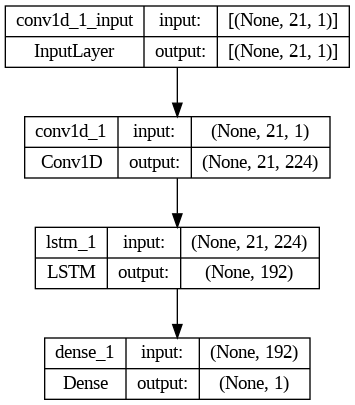

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_10, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_plot/model_CNN-LSTM_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

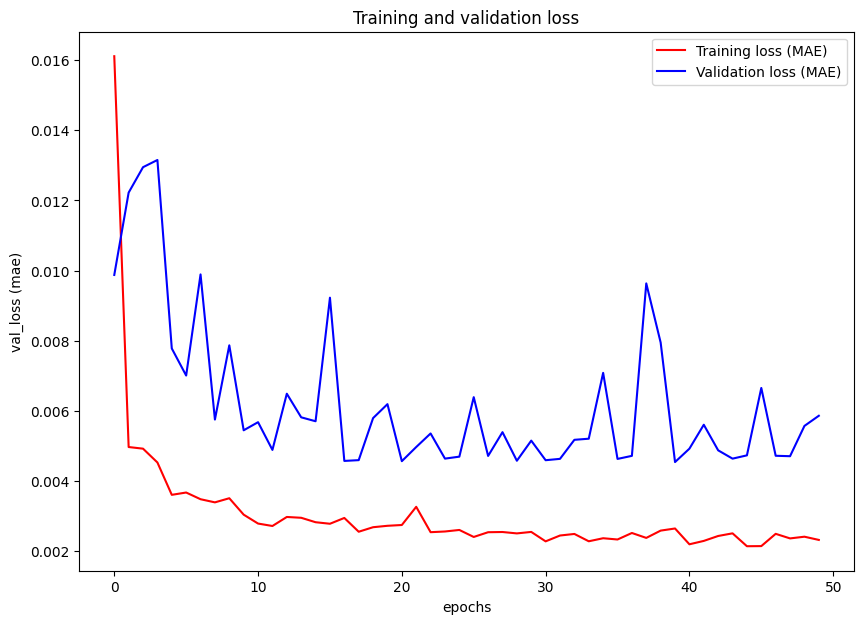

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)



# simpan visualisasi loss per epoch menjadi image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_visualization/loss_CNN-LSTM_uni.png')


# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_loss_value_per_epoch/loss_CNN-LSTM_uni.csv', index=False)


In [ ]:
# mengevaluasi model 9 dari epochs terakhir
model_10.evaluate(test_nikkeiWindows, test_nikkeiLabels)

126/126 [==============================] - 3s 20ms/step - loss: 0.0059


0.005862764548510313

In [ ]:
# mengevaluasi dan load model 9 pada best epoch yang loss mae paling kecil sepanjang training

model_10= tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_model_best_epoch/model_10_CNN-LSTM_univariate")
model_10.evaluate(test_nikkeiWindows, test_nikkeiLabels)


126/126 [==============================] - 4s 30ms/step - loss: 0.0045


0.004543354269117117

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_10_preds = tf.squeeze(model_10.predict(test_nikkeiWindows))
model_10_preds



126/126 [==============================] - 3s 20ms/step


<tf.Tensor: shape=(4012,), dtype=float32, numpy=
array([0.43695256, 0.4340691 , 0.43365082, ..., 0.99851704, 1.0013566 ,
       1.0009671 ], dtype=float32)>

In [ ]:
model_10_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.43695256, 0.4340691 ], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_10_preds = scaler_univariate.inverse_transform([model_10_preds])
denormalized_test_nikkeiLabels = scaler_univariate.inverse_transform([test_nikkeiLabels])

In [ ]:
denormalized_model_10_preds = tf.squeeze(denormalized_model_10_preds)
denormalized_test_nikkeiLabels = tf.squeeze(denormalized_test_nikkeiLabels)

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_10_results = evaluate_preds(y_true = denormalized_test_nikkeiLabels,
                                 y_pred = denormalized_model_10_preds)

model_10_results

{'mae': 177.8917,
 'mse': 63766.945,
 'rmse': 252.52118,
 'R-square': 0.9987867410962132}

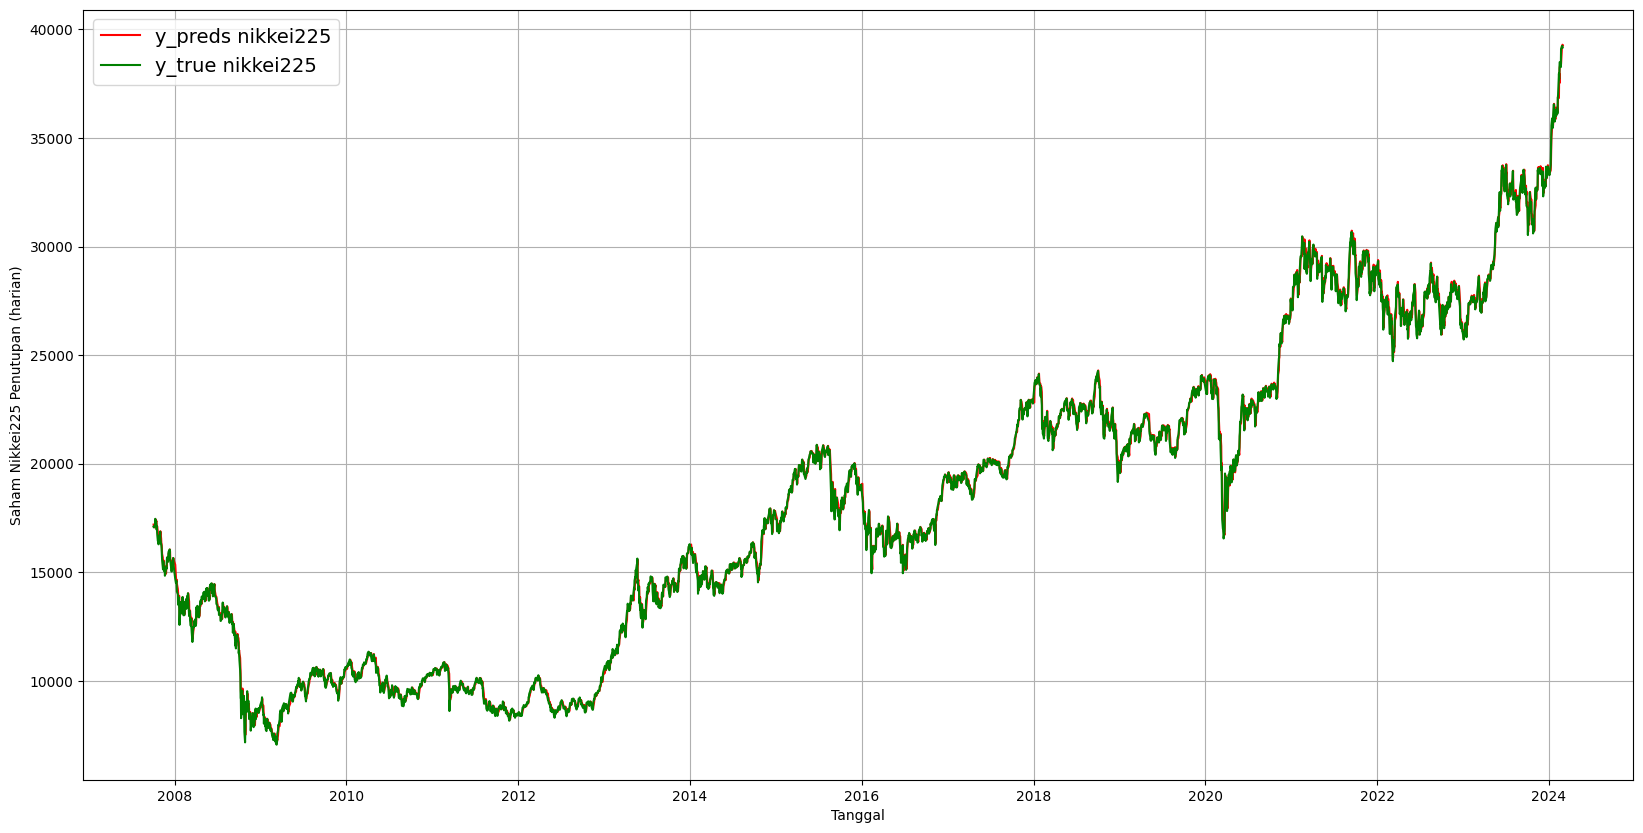

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_10_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_10_plot_prediksi_CNN-LSTM_uni.png')


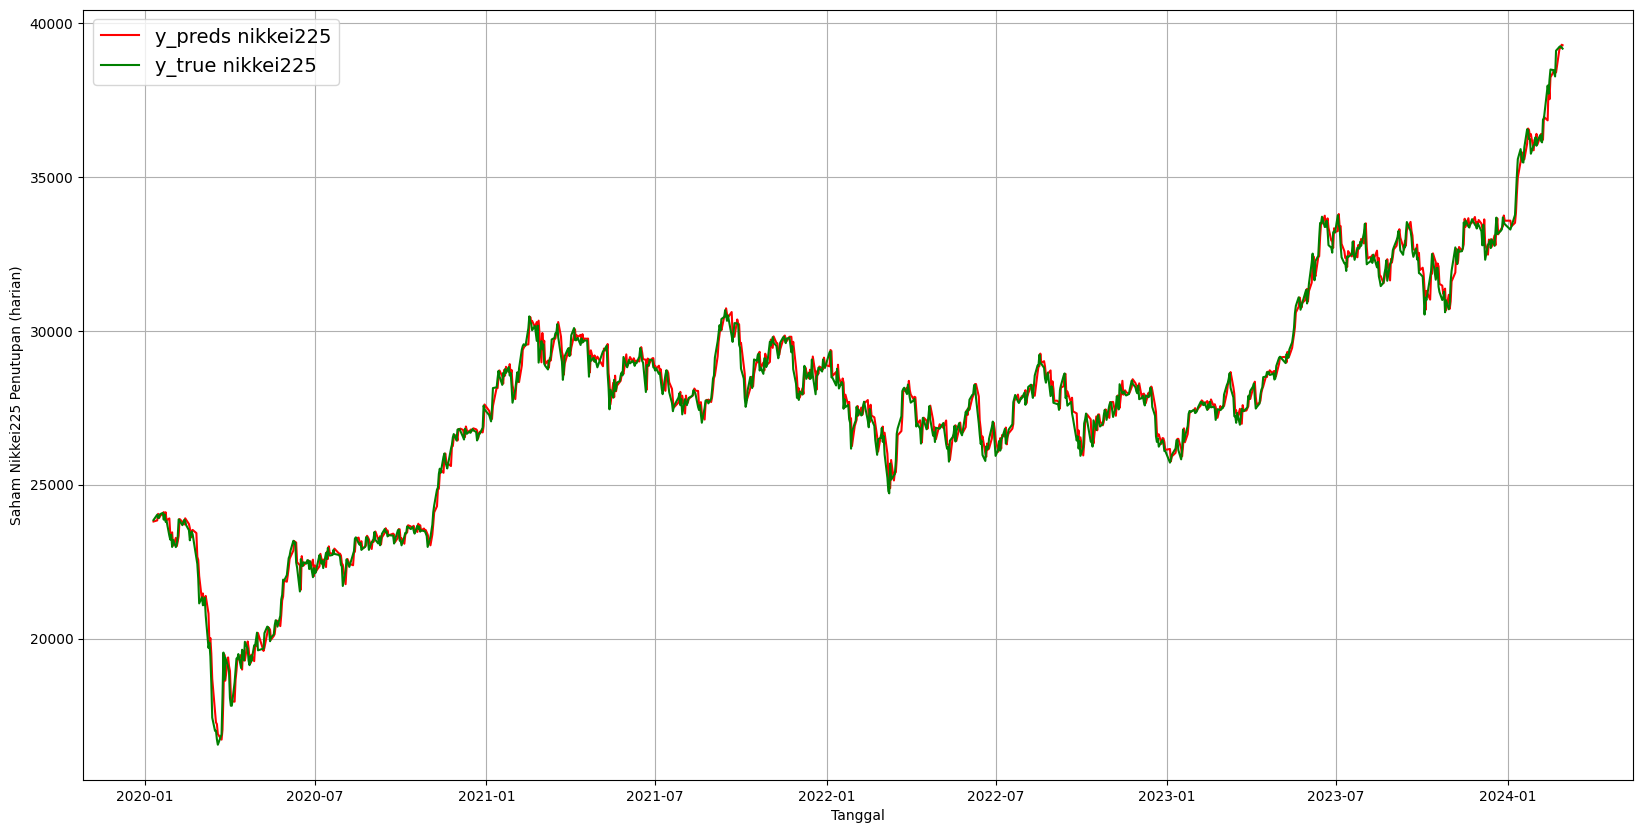

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_10_preds, format = "-", start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", start = 3000, label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_visualisasi_prediksi_time_series/model_10_plot_prediksi_CNN-LSTM_uni_zoomin.png')


simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_10, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_10_CNN-LSTM_univariate.h5")



<ipython-input-302-b84053a5365c>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_10, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_10_CNN-LSTM_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_10 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_saved_models/model_10_CNN-LSTM_univariate.h5")



# visualisasi hasil evaluasi metrik nilai ternormalisasi

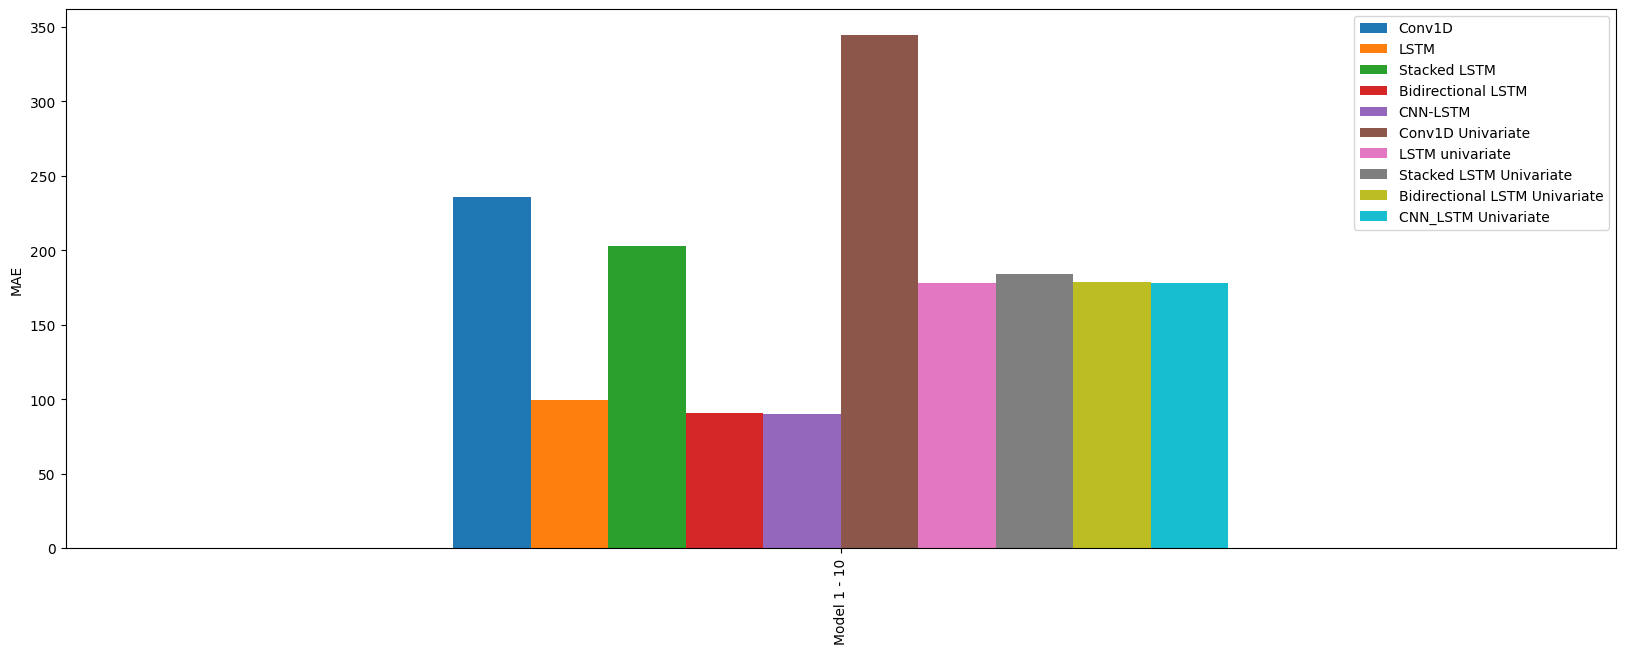

In [ ]:

# membuat dataframe

df = pd.DataFrame({
              "Conv1D": model_1_results["mae"],
              "LSTM": model_2_results["mae"],
              "Stacked LSTM" : model_3_results["mae"],
              "Bidirectional LSTM" : model_4_results["mae"],
              "CNN-LSTM": model_5_results["mae"],
              "Conv1D Univariate" : model_6_results["mae"],
              "LSTM univariate" : model_7_results["mae"],
              "Stacked LSTM Univariate" : model_8_results["mae"],
              "Bidirectional LSTM Univariate" : model_9_results["mae"],
              "CNN_LSTM Univariate" : model_10_results["mae"]},
             index = ["Model 1 - 10"])

# representasi dengan bar chart
ax = df.plot(figsize=(20, 7), kind="bar")
ax.set_ylabel("MAE")

plt.savefig("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_evaluation_metrics/hasil_denormalisasi/MAE_visualization.png")

plt.show()

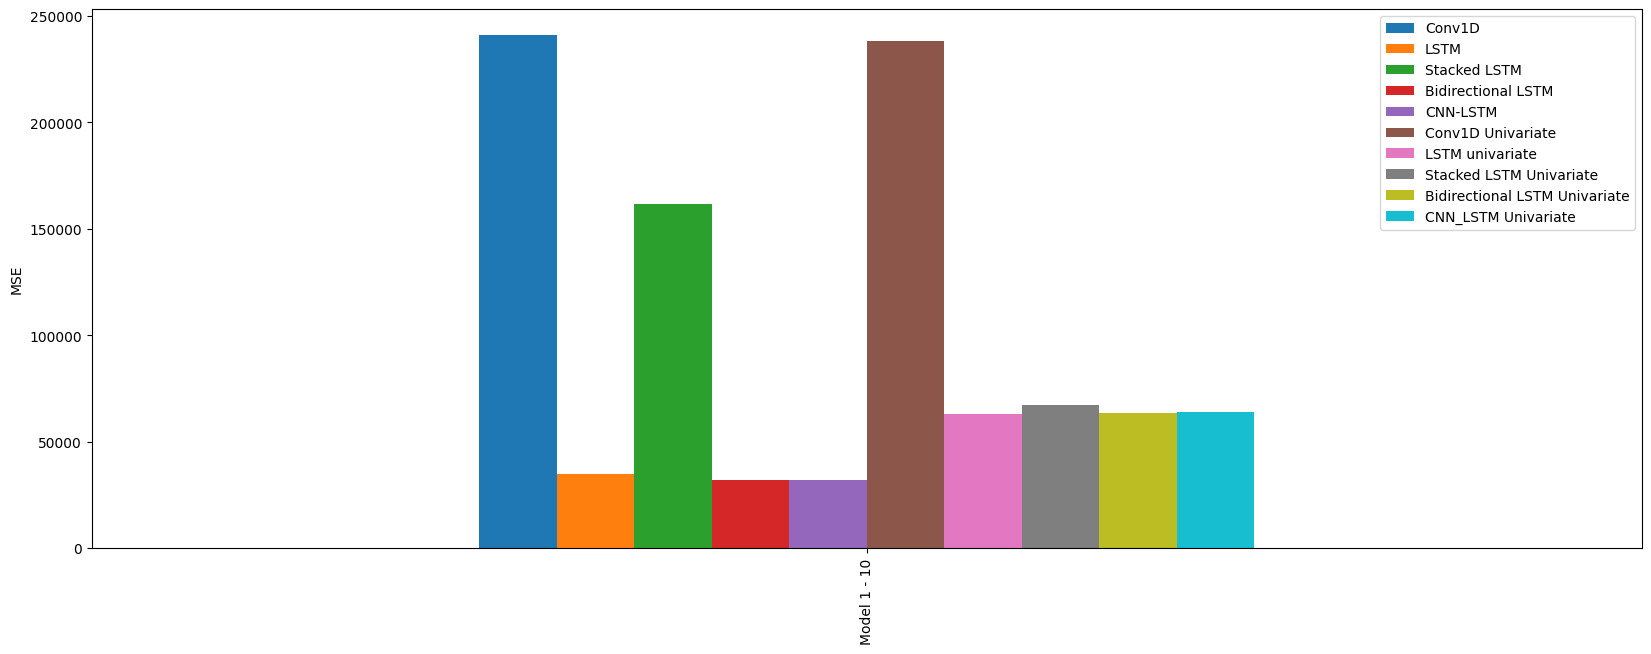

In [ ]:

# membuat dataframe

df = pd.DataFrame({
              "Conv1D": model_1_results["mse"],
              "LSTM": model_2_results["mse"],
              "Stacked LSTM" : model_3_results["mse"],
              "Bidirectional LSTM" : model_4_results["mse"],
              "CNN-LSTM": model_5_results["mse"],
              "Conv1D Univariate" : model_6_results["mse"],
              "LSTM univariate" : model_7_results["mse"],
              "Stacked LSTM Univariate" : model_8_results["mse"],
              "Bidirectional LSTM Univariate" : model_9_results["mse"],
              "CNN_LSTM Univariate" : model_10_results["mse"]},
             index = ["Model 1 - 10"])

# representasi dengan bar chart
ax = df.plot(figsize=(20, 7), kind="bar")
ax.set_ylabel("MSE")

plt.savefig("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_evaluation_metrics/hasil_denormalisasi/MSE_visualization.png")

plt.show()

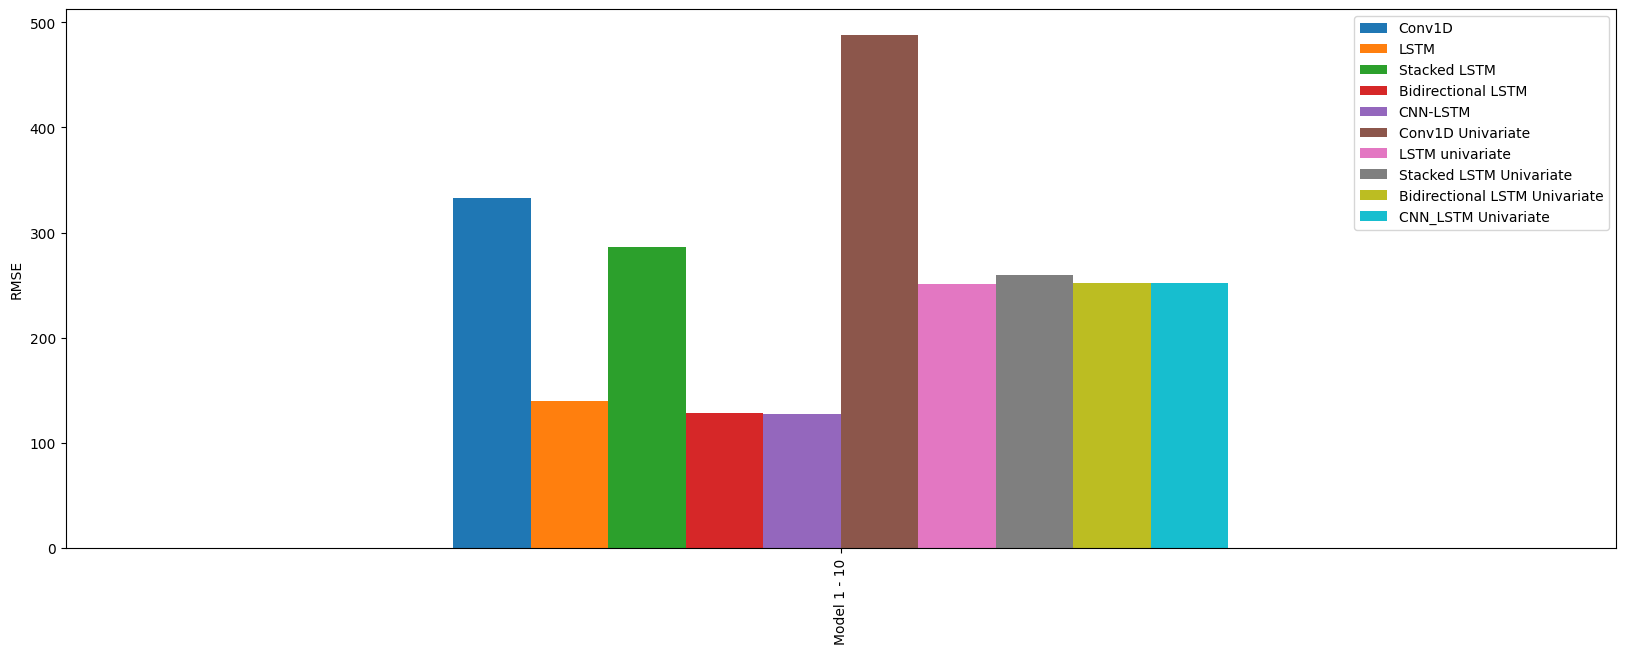

In [ ]:

# membuat dataframe

df = pd.DataFrame({
              "Conv1D": model_1_results["rmse"],
              "LSTM": model_2_results["rmse"],
              "Stacked LSTM" : model_3_results["rmse"],
              "Bidirectional LSTM" : model_4_results["rmse"],
              "CNN-LSTM": model_5_results["rmse"],
              "Conv1D Univariate" : model_6_results["rmse"],
              "LSTM univariate" : model_7_results["rmse"],
              "Stacked LSTM Univariate" : model_8_results["rmse"],
              "Bidirectional LSTM Univariate" : model_9_results["rmse"],
              "CNN_LSTM Univariate" : model_10_results["rmse"]},
             index = ["Model 1 - 10"])

# representasi dengan bar chart
ax = df.plot(figsize=(20, 7), kind="bar")
ax.set_ylabel("RMSE")

plt.savefig("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_evaluation_metrics/hasil_denormalisasi/RMSE_visualization.png")

plt.show()

In [ ]:

# # membuat dataframe

# df = pd.DataFrame({
#               "Conv1D": model_1_results["mape"],
#               "LSTM": model_2_results["mape"],
#               "Stacked LSTM" : model_3_results["mape"],
#               "Bidirectional LSTM" : model_4_results["mape"],
#               "CNN-LSTM": model_5_results["mape"],
#               "Conv1D Univariate" : model_6_results["mape"],
#               "LSTM univariate" : model_7_results["mape"],
#               "Stacked LSTM Univariate" : model_8_results["mape"],
#               "Bidirectional LSTM Univariate" : model_9_results["mape"],
#               "CNN_LSTM Univariate" : model_10_results["mape"]},
#              index = ["Model 1 - 10"])

# # representasi dengan bar chart
# ax = df.plot(figsize=(20, 7), kind="bar")
# ax.set_ylabel("MAPE")

# plt.savefig("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_evaluation_metrics/hasil_denormalisasi/MAPE_visualization.png")

# plt.show()

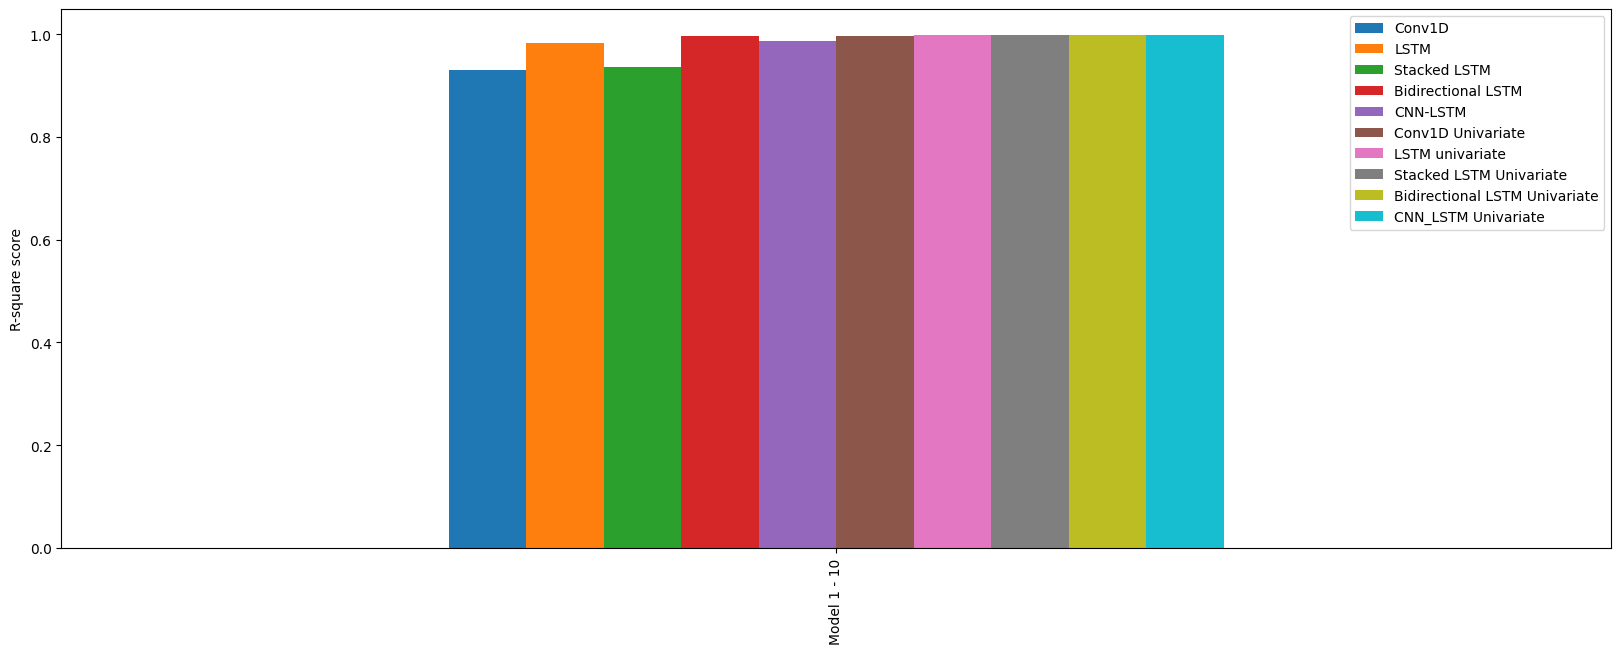

In [ ]:

# membuat dataframe

df = pd.DataFrame({
              "Conv1D": model_1_results["R-square"],
              "LSTM": model_2_results["R-square"],
              "Stacked LSTM" : model_3_results["R-square"],
              "Bidirectional LSTM" : model_4_results["R-square"],
              "CNN-LSTM": model_5_results["R-square"],
              "Conv1D Univariate" : model_6_results["R-square"],
              "LSTM univariate" : model_7_results["R-square"],
              "Stacked LSTM Univariate" : model_8_results["R-square"],
              "Bidirectional LSTM Univariate" : model_9_results["R-square"],
              "CNN_LSTM Univariate" : model_10_results["R-square"]},
             index = ["Model 1 - 10"])

# representasi dengan bar chart
ax = df.plot(figsize=(20, 7), kind="bar")
ax.set_ylabel("R-square score")

plt.savefig("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_evaluation_metrics/hasil_denormalisasi/R-square_visualization.png")

plt.show()

# rangkum evaluasi metrics dari semua model menjadi satu csv

In [ ]:

results_list = [model_1_results,
                model_2_results,
                model_3_results,
                model_4_results,
                model_5_results,
                model_6_results,
                model_7_results,
                model_8_results,
                model_9_results,
                model_10_results]


# menggabungkan hasil evaluasi menjadi dictionary
results_dict = {
    'Model_1 : Conv1D Multivariate': model_1_results,
    'Model_2 : LSTM Multivariate': model_2_results,
    'Model_3 : Stacked LSTM Multivariate': model_3_results,
    'Model_4 : Bidirectional LSTM Multivariate': model_4_results,
    'Model_5 : CNN-LSTM Multivariate': model_5_results,
    'Model_6 : Conv1D Univariate': model_6_results,
    'Model_7 : LSTM Univariate': model_7_results,
    'Model_8 : Stacked LSTM Univariate': model_8_results,
    'Model_9 : Bidirectional LSTM Univariate': model_9_results,
    'Model_10 : CNN-LSTM Univariate': model_10_results

}

# Nama dataframe
df_kumpulan_evaluation_metrics = pd.DataFrame(results_dict).T

# memberi nama untuk index
df_kumpulan_evaluation_metrics.index.name = 'Daftar Model'

# konversi dataframe ke CSV
df_kumpulan_evaluation_metrics.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_8020_window21/8020_evaluation_metrics/hasil_denormalisasi/kumpulan_evaluasi_metrics.csv')

# print output
(df_kumpulan_evaluation_metrics)

mae            mse  \
Daftar Model                                                           
Model_1 : Conv1D Multivariate              235.715073  241174.046875   
Model_2 : LSTM Multivariate                 99.202347   34963.078125   
Model_3 : Stacked LSTM Multivariate        202.589111  161828.671875   
Model_4 : Bidirectional LSTM Multivariate   90.820038   32041.136719   
Model_5 : CNN-LSTM Multivariate             90.225334   32028.380859   
Model_6 : Conv1D Univariate                344.827789  238366.921875   
Model_7 : LSTM Univariate                  177.953522   62941.117188   
Model_8 : Stacked LSTM Univariate          183.964539   67214.273438   
Model_9 : Bidirectional LSTM Univariate    178.479919   63375.882812   
Model_10 : CNN-LSTM Univariate             177.891693   63766.945312   

                                                 rmse  R-square  
Daftar Model                                                     
Model_1 : Conv1D Multivariate              333.331848  0.930522  
Model_2 : LSTM Multivariate                140.282028  0.981890  
Model_3 : Stacked LSTM Multivariate        286.487671  0.936221  
Model_4 : Bidirectional LSTM Multivariate  128.435150  0.995874  
Model_5 : CNN-LSTM Multivariate            127.587959  0.986667  
Model_6 : Conv1D Univariate                488.228363  0.995465  
Model_7 : LSTM Univariate                  250.880676  0.998802  
Model_8 : Stacked LSTM Univariate          259.257172  0.998721  
Model_9 : Bidirectional LSTM Univariate    251.745667  0.998794  
Model_10 : CNN-LSTM Univariate             252.521179  0.998787